<a id="top"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Машинное обучение (ML) в HR - процессах. Прогнозирование текучести кадров через анализ уровня удовлетворенности сотрудника</b></div>

<p style="text-align: center;"><b><span style="color: #28838a; font-family: 'verdana'; font-size: 25px;">📖 </span></b></p>


###### Заказчик исследования:

<div style="background-color:#f0f4f5; padding: 5px;">

<div class="alert alert-block alert-secondary" style="font-size:18px; font-family:verdana;"> Департамент HR-аналитики 

###### Исходные данные:

<div style="background-color:#f0f4f5; padding: 5px;">

<div class="alert alert-block alert-secondary" style="font-size:18px; font-family:verdana;"> HR-аналитики компании «Работа с заботой» Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён.

###### Цель исследования:

<div style="background-color:#f0f4f5; padding: 5px;">

<div class="alert alert-block alert-secondary" style="font-size:18px; font-family:verdana;">  Удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

###### Задачи исследования:

<div style="background-color:#f0f4f5; padding: 5px;">

<div class="alert alert-block alert-secondary" style="font-size:18px; font-family:verdana;"> 
    
* построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
* построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

<br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong>Шаги, необходимые для решения поставленных задач:</strong></a><br>

<a id="toc"></a>
   
* [1. Загрузка и первичное ознакомление с предоставленными данными](#0) 
* [1. Задача 1](#1)
* [1.1. Загрузка данных](#2)
* [1.2. Предобработка данных](#2)
* [1.3. Исследовательский анализ данных](#2)
* [1.4. Подготовка данных](#2)
* [1.5. Обучение моделей](#2)
* [1.6. Обучение моделей](#2)
* [2. Задача 2](#1)
* [2.1. Загрузка данных](#2)
* [2.2. Предобработка данных](#2)
* [2.3. Исследовательский анализ данных](#2)
* [2.4. Добавление нового входного признака](#2)
* [2.5. Подготовка данных](#2)
* [2.6. Обучение модели](#2)
* [2.7. Выводы](#3)
* [3. Общий вывод](#3)

In [1]:
!pip install -U scikit-learn -q  

In [2]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install shap 

In [4]:
# Импорт из стандартной библиотеки
import os
import warnings
import copy
warnings.filterwarnings("ignore")

# Стандартные библиотеки для научных вычислений
import numpy as np
import pandas as pd
from pandas import Index
from scipy.stats import ttest_ind
from scipy import stats as st

#import pandas_profiling
import ydata_profiling
from ydata_profiling import ProfileReport

# Визуализация данных
from wordcloud import WordCloud
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as graph
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import sys
import shap

#импорт для работы с API
from google.cloud import translate_v2 as translate
import pycountry_convert
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Расчет статистик
np.set_printoptions(threshold=np.inf)
from sklearn.metrics import make_scorer, roc_auc_score,mean_absolute_error, r2_score,accuracy_score,recall_score,precision_score,f1_score 

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import (
    StratifiedKFold,
    RandomizedSearchCV, 
    GridSearchCV,
    KFold
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder,
    LabelEncoder,
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler,
    RobustScaler,
)

# Модели машинного обучения
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import (cross_validate, StratifiedKFold, train_test_split,GridSearchCV,
                                    HalvingGridSearchCV)


# Дополнительные библиотеки для анализа данных
from phik import phik_matrix
from phik import report
from phik.report import plot_correlation_matrix
from sklearn import preprocessing
from sklearn import utils
from sklearn import ensemble
import math

# Настройка отображения графиков
%matplotlib inline
sns.set(
    font_scale=1.3,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)
shap.initjs()

# Установка опции отображения широких датафреймов
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Константы
line_1 = '-'*125
line_2 = '_'*125
RANDOM_STATE = 42
TEST_SIZE = 0.25
NSAMPLES = 3


### <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Задача №1</b></div>

### <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 1. Загрузка данных</strong></a><br>

In [5]:
try:
    df_train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv', delimiter = ",",decimal=".") 
    df_test = pd.read_csv('/datasets/test_features.csv', delimiter = ",", decimal=".") 
    df_test_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv', delimiter = ",", decimal=".") 
except:
    df_train = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv', delimiter = ",", decimal=".") 
    df_test = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv', delimiter = ",", decimal=".") 
    df_test_target = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv', delimiter = ",", decimal=".")
    
    target_col = 'job_satisfaction_rate'

Необходимые функции:

In [6]:
def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
        '''
        Function optimizes memory usage in dataframe
        df: pd.DataFrame - data table
        print_size: bool - display of optimization results
        return pd.DataFrame - amount of optimized memory
        '''
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # Типы, которые будем проверять на оптимизацию
        # Размер занимаемой памяти до оптимизации (в Мб)
        before_size = df.memory_usage().sum() / 1024**2    
        for column in df.columns:
            column_type = df[column].dtypes
            if column_type in numerics:
                column_min = df[column].min()
                column_max = df[column].max()
                if str(column_type).startswith('int'):
                    if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                        df[column] = df[column].astype(np.int8)
                    elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                        df[column] = df[column].astype(np.int16)
                    elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                        df[column] = df[column].astype(np.int32)
                    elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                        df[column] = df[column].astype(np.int64)  
                else:
                    if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                        df[column] = df[column].astype(np.float32)
                    else:
                        df[column] = df[column].astype(np.float64)    
        # Размер занимаемой памяти после оптимизации (в Мб)
        after_size = df.memory_usage().sum() / 1024**2
        if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                            .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
        return df
    
def rename(df):
    df.columns = df.columns.str.replace('\[.*?\]', '', regex=True)
    df.columns = df.columns.str.strip()
    # df.columns = df.columns.str.replace(' ', '')
    
    return df


def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Blue'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

def check_data(data, title):
    cols = data.columns.to_list()
    display(set_frame_style(data[cols].head(),f'{title}: Первые 5 строк датафрейма'))
    display(set_frame_style(data[cols].describe(),f'{title}: Статистики'))
    display(set_frame_style(data[cols].nunique().to_frame().rename({0:'Уникальные значения'}, axis=1).transpose(), f'{title}: Unique Value Counts In Each Column'))
    display(set_frame_style(data[cols].isna().sum().to_frame().transpose(), f'{title}:Столбцы с пропусками'))
    

def plot_feature(df, feature, figsize=(16,5), palette='colorblind', name='Train'):
    df = df.fillna('Nan')

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    ax = ax.flatten()

    # Pie chart
    pie_colors = sns.color_palette(palette, len(df[ feature].unique()))
    ax[0].pie(
        df[feature].value_counts(),
        shadow=True,
        #explode==[0.05] * len(df[feature].unique()),
        autopct='%1.f%%',
        textprops={'size': 15, 'color': 'white'},
        colors=pie_colors
    )
    
    ax[0].set_aspect('equal')  # Fix the aspect ratio to make the pie chart circular

    # Bar plot
    bar_colors = sns.color_palette(palette)
    sns.countplot(
        data=df,
        y= feature,
        ax=ax[1],
        palette=bar_colors
    )
    ax[1].set_xlabel('Count', fontsize=14)
    ax[1].set_ylabel('')
    ax[1].tick_params(labelsize=12)
    ax[1].yaxis.set_tick_params(width=0)  # Remove tick lines for y-axis

    fig.suptitle(f'{ feature} in {name} Dataset', fontsize=16, fontweight='bold')
    plt.tight_layout()

    # Show the plot
    plt.show()

In [7]:
def plot_histogram_with_stats(df):
    """
    Функция для построения гистограммы с основной статистикой для числовых столбцов датафрейма.
    
    Параметры:
    df (pandas.DataFrame) - датафрейм, для которого необходимо построить гистограмму.
    """
    # Выбираем только числовые столбцы
    numeric_cols = df.select_dtypes(include=['int32', 'int8', 'float32']).columns
    
    if not numeric_cols.empty:
        # Создаем фигуру и оси
        n_cols = 2  # Количество колонок подграфиков
        n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Количество строк подграфиков
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,5* n_rows))
        
        # Проходим по каждому числовому столбцу
        for i, col in enumerate(numeric_cols):
            # Гистограмма
            sns.histplot(data=df, x=df[col], bins=20, kde=True, ax=axes[i])
            axes[i].set_title(f'Histogram of {col}')
            
            # Средняя и медианная линии
            mean = df[col].mean()
            median = df[col].median()
            axes[i].axvline(mean, color='r', linestyle='--', label='Mean')
            axes[i].axvline(median, color='g', linestyle='--', label='Median')
            axes[i].legend()
            
            # Основная статистика
            stats = df[col].describe()
            axes[i].text(0.1, 0.5,f'Mean: {stats["mean"]:.2f}\nMedian: {stats["50%"]:.2f}\nStd: {stats["std"]:.2f}\nMin: {stats["min"]:.2f}\nMax: {stats["max"]:.2f}', transform=axes[i].transAxes)
        
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        plt.tight_layout()
        plt.show()
    else:
        print("Датафрейм не содержит числовых столбцов.")

Функция для подсчета метрики:

In [8]:
def calculate_smape(actual, predicted):
    """
    Calculate the Symmetric Mean Absolute Percentage Error (SMAPE)
    
    :param actual: list of actual values
    :param predicted: list of predicted values
    :return: SMAPE as a percentage
    """
    # Ensure actual and predicted lists have the same length
    if len(actual) != len(predicted):
        raise ValueError("Input lists must have the same length")
    
    # Calculate SMAPE
    n = len(actual)
    total_error = 0
    for a, p in zip(actual, predicted):
        total_error += 2 * abs(a - p) / (abs(a) + abs(p))
    
    smape = (total_error / n) * 100
    return smape
scorer_s = make_scorer(calculate_smape, greater_is_better=False)

In [9]:
display(df_train.head())
df_train.tail()
print()
df_train.sample()
df_train.info(memory_usage='deep')

id        dept   level workload  employment_years last_year_promo  \
0  155278       sales  junior   medium                 2              no   
1  653870          hr  junior     high                 2              no   
2  184592       sales  junior      low                 1              no   
3  171431  technology  junior      low                 4              no   
4  693419          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                   0.58  
1                   no                      5   38400                   0.76  
2                   no                      2   12000                   0.11  
3                   no                      2   18000                   0.37  
4                   no                      3   22800                   0.20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 1.3 MB


Тренировочная выборка:
•	id — уникальный идентификатор сотрудника;
•	dept — отдел, в котором работает сотрудник;
•	level — уровень занимаемой должности;
•	workload — уровень загруженности сотрудника;
•	employment_years — длительность работы в компании (в годах);
•	last_year_promo — показывает, было ли повышение за последний год;
•	last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
•	supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
•	salary — ежемесячная зарплата сотрудника;
•	job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.


Датафрейм ‘data_train_job_satisfaction_rate’ имеет 9 столбцов и 4000 строк, имеются пропуски в 2 столбцах. Вес датафрейма 1,3мб.Тип данных соответствует

In [10]:
display(df_test.head())
df_test.tail()
print()
df_test.sample()
df_test.info(memory_usage='deep')

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 662.0 KB


Входные признаки тестовой выборки

Датафрейм ‘data_test_features’ имеет 8 столбцов и 2000 строк, имеются пропуски в 2 столбцах. Вес датафрейма 662,0 кб. Тип данных соответствует

In [11]:
display(df_test_target.head())
df_test_target.tail()
print()
df_test_target.sample()
df_test_target.info(memory_usage='deep')

id  job_satisfaction_rate
0  130604                   0.74
1  825977                   0.75
2  418490                   0.60
3  555320                   0.72
4  826430                   0.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


Целевой признак тестовой выборки

Датафрейм ‘data_test_target_job_satisfaction_rate’ имеет 2 столбца и 2000 строк, без пропусков. Вес датафрейма 662,0 кб. Тип данных соответствует

In [12]:
optimize_memory_usage(df_train)

Размер использования памяти: до  0.31 Mb - после  0.21 Mb (32.5%)


id        dept   level workload  employment_years last_year_promo  \
0     155278       sales  junior   medium                 2              no   
1     653870          hr  junior     high                 2              no   
2     184592       sales  junior      low                 1              no   
3     171431  technology  junior      low                 4              no   
4     693419          hr  junior   medium                 1              no   
...      ...         ...     ...      ...               ...             ...   
3995  457950  technology  junior     high                 2              no   
3996  957499       sales  junior   medium                 2              no   
3997  533318       sales  middle      low                 7              no   
3998  706868       sales  junior   medium                 2              no   
3999  338347  technology  middle   medium                 5              no   

     last_year_violations  supervisor_evaluation  salary  \
0                      no                      1   24000   
1                      no                      5   38400   
2                      no                      2   12000   
3                      no                      2   18000   
4                      no                      3   22800   
...                   ...                    ...     ...   
3995                   no                      3   46800   
3996                   no                      4   21600   
3997                   no                      5   24000   
3998                   no                      3   24000   
3999                  yes                      1   44400   

      job_satisfaction_rate  
0                      0.58  
1                      0.76  
2                      0.11  
3                      0.37  
4                      0.20  
...                     ...  
3995                   0.45  
3996                   0.68  
3997                   0.76  
3998                   0.48  
3999                   0.18  

[4000 rows x 10 columns]

In [13]:
optimize_memory_usage(df_test)

Размер использования памяти: до  0.14 Mb - после  0.10 Mb (30.5%)


id        dept   level workload  employment_years last_year_promo  \
0     485046   marketing  junior   medium                 2              no   
1     686555          hr  junior   medium                 1              no   
2     467458       sales  middle      low                 5              no   
3     418655       sales  middle      low                 6              no   
4     789145          hr  middle   medium                 5              no   
...      ...         ...     ...      ...               ...             ...   
1995  393147   marketing  junior      low                 3              no   
1996  109582  technology  middle      low                 3              no   
1997  305653  technology  junior      low                 1              no   
1998  160233  technology  middle      low                 8              no   
1999  771859  purchasing  middle   medium                 1              no   

     last_year_violations  supervisor_evaluation  salary  
0                      no                      5   28800  
1                      no                      4   30000  
2                      no                      4   19200  
3                      no                      4   19200  
4                      no                      5   40800  
...                   ...                    ...     ...  
1995                   no                      3   20400  
1996                   no                      2   21600  
1997                   no                      3   14400  
1998                   no                      1   32400  
1999                   no                      4   38400  

[2000 rows x 9 columns]

In [14]:
optimize_memory_usage(df_test_target)

Размер использования памяти: до  0.03 Mb - после  0.02 Mb (49.8%)


id  job_satisfaction_rate
0     130604                   0.74
1     825977                   0.75
2     418490                   0.60
3     555320                   0.72
4     826430                   0.08
...      ...                    ...
1995  405257                   0.28
1996  370925                   0.21
1997  857722                   0.39
1998  303402                   0.26
1999  648995                   0.62

[2000 rows x 2 columns]

С помощью функции оптимизировали размеры датафреймов на 32,5, 30, 30,5%

### <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 2. Предобработка данных</strong></a><br>

Разделим столбцы по типам данных

In [15]:

num_cols = [col for col in df_train.columns if df_train[col].dtype != 'object']

In [16]:
num_cols

['id',
 'employment_years',
 'supervisor_evaluation',
 'salary',
 'job_satisfaction_rate']

In [17]:
cat_cols = ['dept', 'level', 'workload']

In [18]:
bin_cols = ['last_year_promo', 'last_year_violations']

In [19]:
for col in cat_cols:
    print(f"{col} has {df_train[col].unique()} values\n")

dept has ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan] values

level has ['junior' 'middle' 'sinior' nan] values

workload has ['medium' 'high' 'low'] values



In [20]:
for col in cat_cols:
    print(f"{col} has {df_test[col].unique()} values\n")

dept has ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' '] values

level has ['junior' 'middle' 'sinior' nan] values

workload has ['medium' 'low' 'high' ' '] values



In [21]:
for col in bin_cols:
    print(f"{col} has {df_train[col].unique()} values\n")

last_year_promo has ['no' 'yes'] values

last_year_violations has ['no' 'yes'] values



In [22]:
for col in bin_cols:
    print(f"{col} has {df_test[col].unique()} values\n")

last_year_promo has ['no' 'yes'] values

last_year_violations has ['no' 'yes'] values



Обработаем аномалии 

In [23]:
df_test['dept'] = df_test['dept'].replace(' ', np.nan)
df_test['workload'] = df_test['workload'].replace(' ', np.nan)

Выведем статистику данных

In [24]:
target_col = 'job_satisfaction_rate'

num_cols = [
    'salary'
]
cat_1_cols = [
    'employment_years',
    'supervisor_evaluation',
]
cat_cols = [
    'dept',
    'level',
    'workload',
    'last_year_promo',
    'last_year_violations'
]

In [25]:
check_data(df_train, 'Train data')
print('-'*100)
check_data(df_test, 'Test data')
print('-'*100)
check_data(df_test_target, 'df_test_target');

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


Согласно полученным данным, в df_train и df_test присутствует 10 и 3 пропущенных значений. В столбце dept DataFrame df_train содержится 6 пропущенных значений. Для обработки этих пропусков в пайплайне предлагается использовать метод SimpleImputer с параметром strategy='most_frequent', либо IterativeImputer  для более точного заполнения. В столбце level DataFrame df_train содержится 4 пропущенных значения. В столбце dept DataFrame df_test содержится 2 пропущенных значения. Явных дубликатов не найдено.

В тренировочной выборке средний стаж работы составляет 2,5, максимальный 10 лет, наблюдается средняя оценка супервайзера чуть больше 1, максимальная зарплата 98400, средняя 14900, средняя удовлетворенность от работы 20%

В тестовой выборке средний стаж работы составляет 2,5, максимальный 10 лет, наблюдается средняя оценка супервайзера 1, максимальная зарплата 96000, средняя 15398, средняя удовлетворенность от работы 22%

In [26]:
rename(df_train)

id        dept   level workload  employment_years last_year_promo  \
0     155278       sales  junior   medium                 2              no   
1     653870          hr  junior     high                 2              no   
2     184592       sales  junior      low                 1              no   
3     171431  technology  junior      low                 4              no   
4     693419          hr  junior   medium                 1              no   
...      ...         ...     ...      ...               ...             ...   
3995  457950  technology  junior     high                 2              no   
3996  957499       sales  junior   medium                 2              no   
3997  533318       sales  middle      low                 7              no   
3998  706868       sales  junior   medium                 2              no   
3999  338347  technology  middle   medium                 5              no   

     last_year_violations  supervisor_evaluation  salary  \
0                      no                      1   24000   
1                      no                      5   38400   
2                      no                      2   12000   
3                      no                      2   18000   
4                      no                      3   22800   
...                   ...                    ...     ...   
3995                   no                      3   46800   
3996                   no                      4   21600   
3997                   no                      5   24000   
3998                   no                      3   24000   
3999                  yes                      1   44400   

      job_satisfaction_rate  
0                      0.58  
1                      0.76  
2                      0.11  
3                      0.37  
4                      0.20  
...                     ...  
3995                   0.45  
3996                   0.68  
3997                   0.76  
3998                   0.48  
3999                   0.18  

[4000 rows x 10 columns]

In [27]:
rename(df_test)

id        dept   level workload  employment_years last_year_promo  \
0     485046   marketing  junior   medium                 2              no   
1     686555          hr  junior   medium                 1              no   
2     467458       sales  middle      low                 5              no   
3     418655       sales  middle      low                 6              no   
4     789145          hr  middle   medium                 5              no   
...      ...         ...     ...      ...               ...             ...   
1995  393147   marketing  junior      low                 3              no   
1996  109582  technology  middle      low                 3              no   
1997  305653  technology  junior      low                 1              no   
1998  160233  technology  middle      low                 8              no   
1999  771859  purchasing  middle   medium                 1              no   

     last_year_violations  supervisor_evaluation  salary  
0                      no                      5   28800  
1                      no                      4   30000  
2                      no                      4   19200  
3                      no                      4   19200  
4                      no                      5   40800  
...                   ...                    ...     ...  
1995                   no                      3   20400  
1996                   no                      2   21600  
1997                   no                      3   14400  
1998                   no                      1   32400  
1999                   no                      4   38400  

[2000 rows x 9 columns]

In [28]:
rename(df_test_target)

id  job_satisfaction_rate
0     130604                   0.74
1     825977                   0.75
2     418490                   0.60
3     555320                   0.72
4     826430                   0.08
...      ...                    ...
1995  405257                   0.28
1996  370925                   0.21
1997  857722                   0.39
1998  303402                   0.26
1999  648995                   0.62

[2000 rows x 2 columns]

Вывод: После проведения анализа наличия дубликатов и ошибок в категориальных данных мы получили следующие результаты:

Дубликаты: В данных отсутствуют явные дубликаты. Это подтверждается отсутствием повторяющихся строк во всех рассматриваемых датафреймах.

Уникальные значения: Проведен анализ уникальных значений для каждого категориального столбца в каждом датафрейме. Обнаружены некоторые особенности:

В столбцах dept и workload датафрейма df_test обнаружены значения, заполненные пробелами. Эти пропуски могли возникнуть из-за нежелания сотрудников предоставлять информацию или ошибок при заполнении данных. Рекомендуется использовать метод SimpleImputer с параметром strategy='constant' для заполнения NaN значений.
Исходя из результатов анализа, данные готовы к дальнейшей обработке и построению модели. В следующих разделах будут предприняты дальнейшие шаги по предобработке и анализу данных, а также построению моделей.

После анализа количественных данных было обнаружено следующее:

Во всех рассматриваемых датафреймах (df_train, df_test, df_test_target) не было найдено аномальных значений или ошибок в количественных столбцах (employment_years, supervisor_evaluation, salary, job_satisfaction_rate).
Таким образом, данные готовы к дальнейшему анализу и использованию в моделировании.

### <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 3. Исследовательский анализ данных</strong></a><br>

Посмотрим как распределены признаки в тренировочной и тестовой выборках

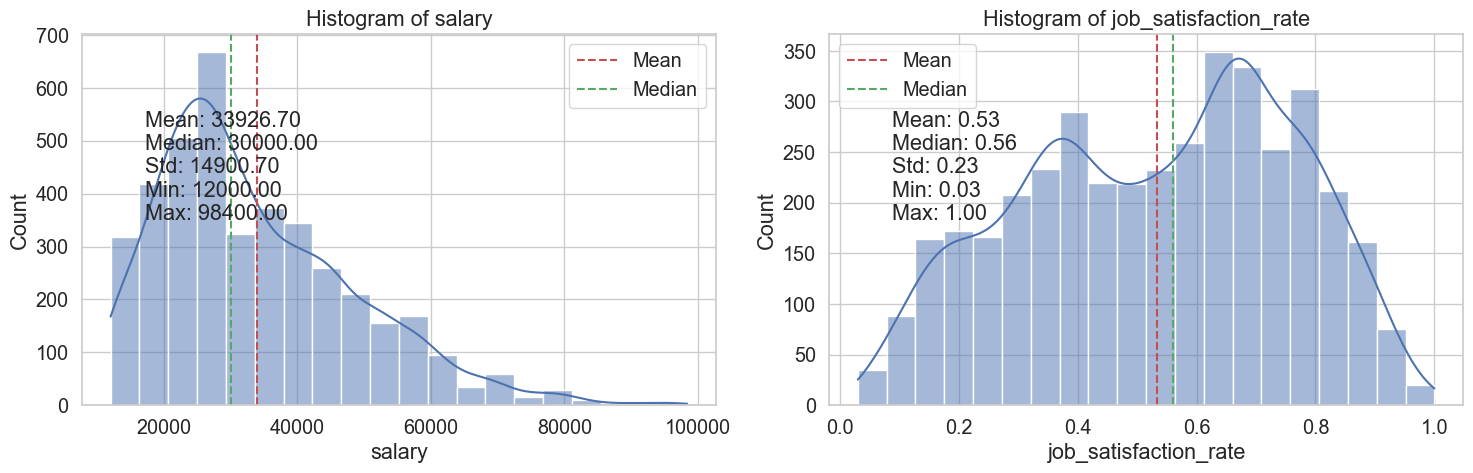

In [29]:
plot_histogram_with_stats(df_train.drop(['id','employment_years', 'supervisor_evaluation'], axis=1))

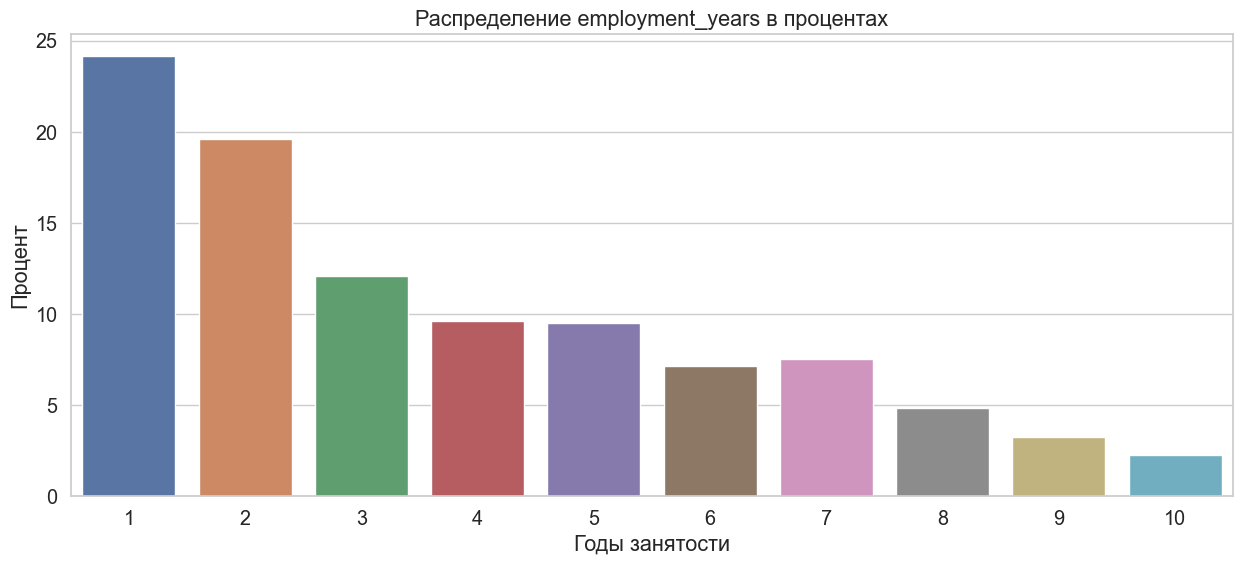

In [30]:
# Рассчитываем частоты в процентах
value_counts_normalized = df_train['employment_years'].value_counts(normalize=True).reset_index()
value_counts_normalized.columns = ['employment_years', 'frequency']

# Умножаем на 100, чтобы преобразовать доли в проценты
value_counts_normalized['frequency'] *= 100

plt.figure(figsize=(15, 6))
# Построение графика абсолютных величин в процентах
sns.barplot(x='employment_years', y='frequency', data=value_counts_normalized)
plt.title('Распределение employment_years в процентах')
plt.xlabel('Годы занятости')
plt.ylabel('Процент')
plt.show()

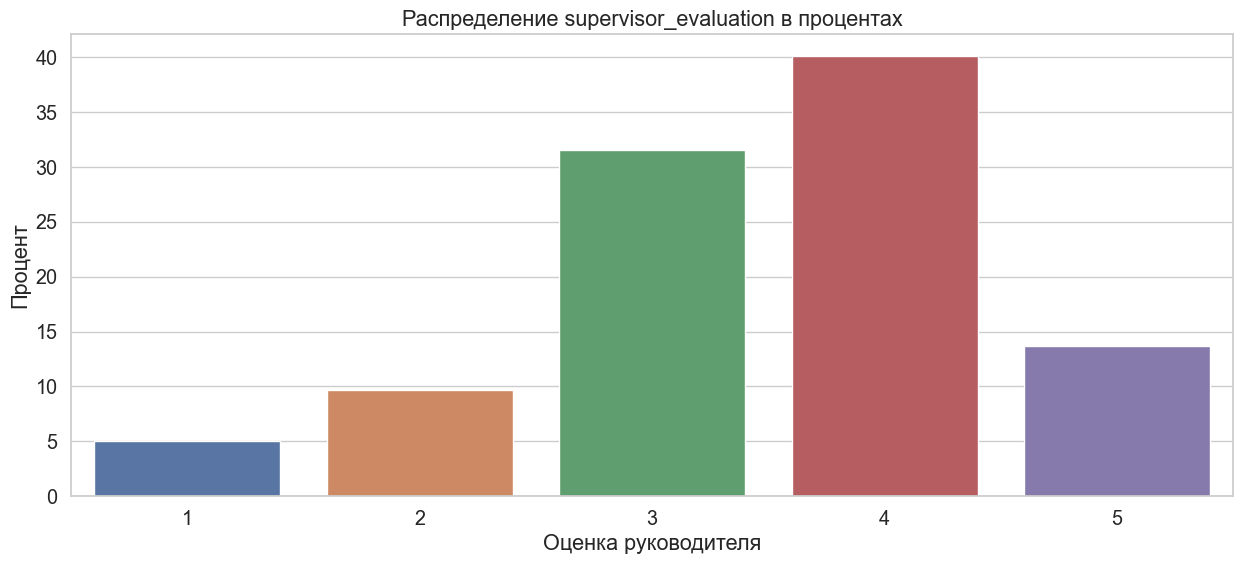

In [31]:
# Рассчитываем частоты в процентах
value_counts_normalized = df_train['supervisor_evaluation'].value_counts(normalize=True).reset_index()
value_counts_normalized.columns = ['supervisor_evaluation', 'frequency']

# Умножаем на 100, чтобы преобразовать доли в проценты
value_counts_normalized['frequency'] *= 100

plt.figure(figsize=(15, 6))
# Построение графика абсолютных величин в процентах
sns.barplot(x='supervisor_evaluation', y='frequency', data=value_counts_normalized)
plt.title('Распределение supervisor_evaluation в процентах')
plt.xlabel('Оценка руководителя')
plt.ylabel('Процент')
plt.show()

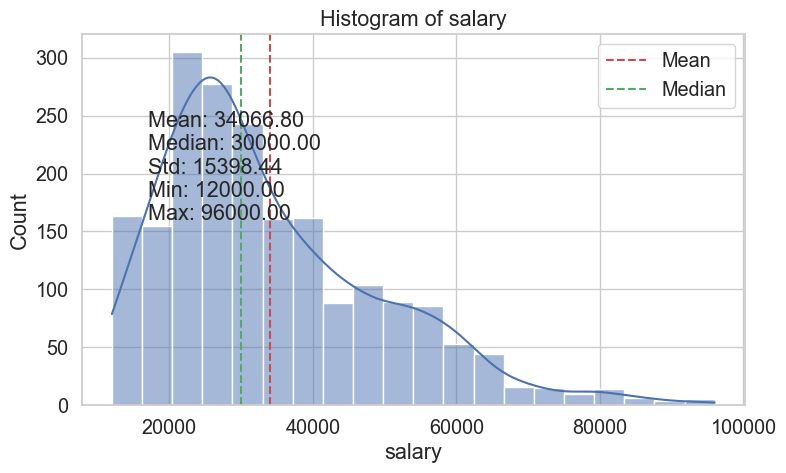

In [32]:
plot_histogram_with_stats(df_test.drop(['id','employment_years', 'supervisor_evaluation'], axis=1))

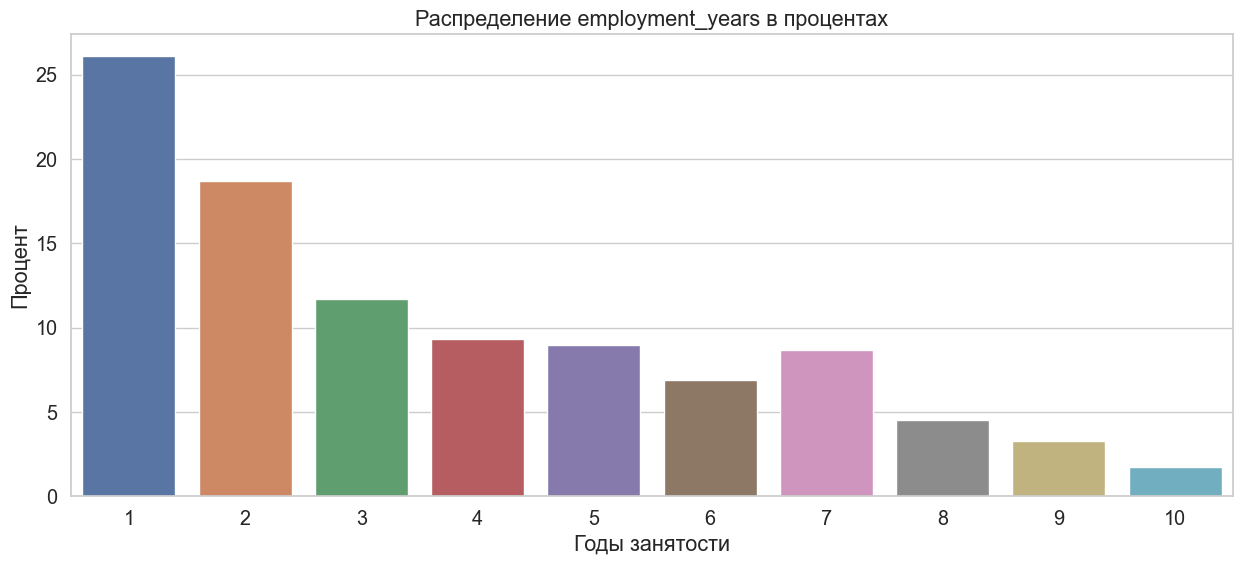

In [33]:
# Рассчитываем частоты в процентах
value_counts_normalized = df_test['employment_years'].value_counts(normalize=True).reset_index()
value_counts_normalized.columns = ['employment_years', 'frequency']

# Умножаем на 100, чтобы преобразовать доли в проценты
value_counts_normalized['frequency'] *= 100

plt.figure(figsize=(15, 6))
# Построение графика абсолютных величин в процентах
sns.barplot(x='employment_years', y='frequency', data=value_counts_normalized)
plt.title('Распределение employment_years в процентах')
plt.xlabel('Годы занятости')
plt.ylabel('Процент')
plt.show()

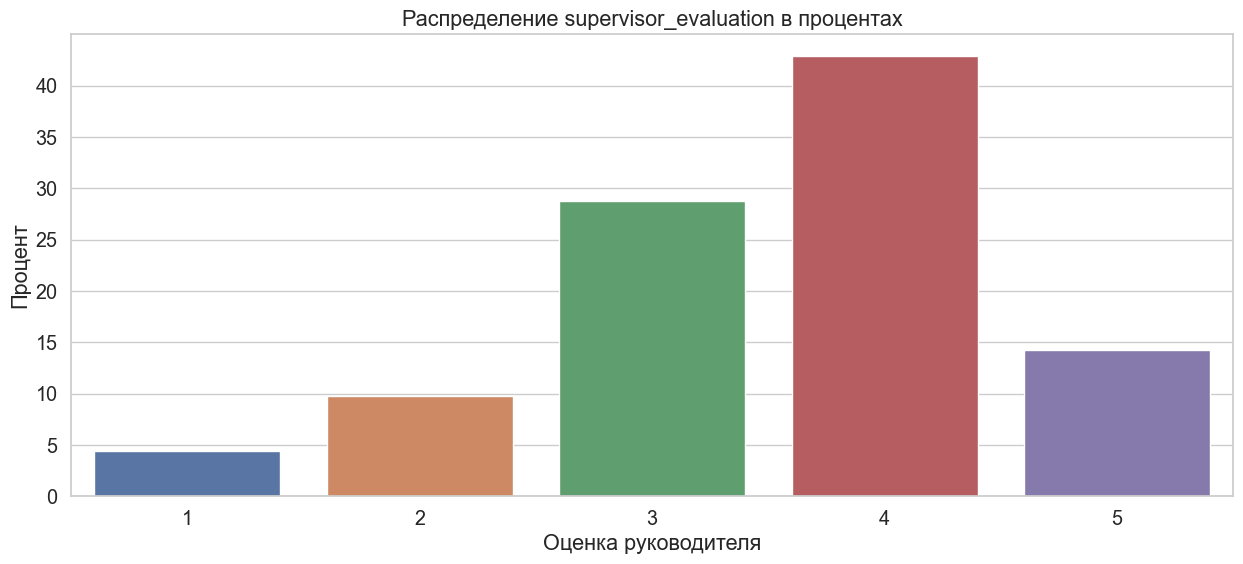

In [34]:
# Рассчитываем частоты в процентах
value_counts_normalized = df_test['supervisor_evaluation'].value_counts(normalize=True).reset_index()
value_counts_normalized.columns = ['supervisor_evaluation', 'frequency']

# Умножаем на 100, чтобы преобразовать доли в проценты
value_counts_normalized['frequency'] *= 100

plt.figure(figsize=(15, 6))
# Построение графика абсолютных величин в процентах
sns.barplot(x='supervisor_evaluation', y='frequency', data=value_counts_normalized)
plt.title('Распределение supervisor_evaluation в процентах')
plt.xlabel('Оценка руководителя')
plt.ylabel('Процент')
plt.show()

В тренировочной выборке больше всего работников со стаже от 1,5 до 2,5 лет, чаще всего имеют оценку руководителя 4 зарплату 1800-4000. Распределение нормальное, наблюдается правый хвост.

В тестовой выборке размер заработной платы аналогичен тренировочным данным. Также имеем правый хвост в распределении, с повышением заработной платы, количество сторудников уменьшается

В тестовой выборке большое количество сотрудников с минимальным стажем, и оценкой руководителя 3-4.

##### Корреляционный анализ признаков

In [35]:
corr_matrix_df = df_train.drop(['id'], axis=1).phik_matrix(interval_cols=['employment_years', 'supervisor_evaluation', 'salary',
       'job_satisfaction_rate'])
corr_matrix_df.round(2)

dept  level  workload  employment_years  \
dept                   1.00   0.00      0.02              0.04   
level                  0.00   1.00      0.42              0.68   
workload               0.02   0.42      1.00              0.18   
employment_years       0.04   0.68      0.18              1.00   
last_year_promo        0.00   0.10      0.06              0.18   
last_year_violations   0.00   0.00      0.00              0.06   
supervisor_evaluation  0.11   0.00      0.04              0.00   
salary                 0.28   0.72      0.79              0.48   
job_satisfaction_rate  0.08   0.08      0.06              0.33   

                       last_year_promo  last_year_violations  \
dept                              0.00                  0.00   
level                             0.10                  0.00   
workload                          0.06                  0.00   
employment_years                  0.18                  0.06   
last_year_promo                   1.00                  0.00   
last_year_violations              0.00                  1.00   
supervisor_evaluation             0.01                  0.18   
salary                            0.22                  0.01   
job_satisfaction_rate             0.19                  0.56   

                       supervisor_evaluation  salary  job_satisfaction_rate  
dept                                    0.11    0.28                   0.08  
level                                   0.00    0.72                   0.08  
workload                                0.04    0.79                   0.06  
employment_years                        0.00    0.48                   0.33  
last_year_promo                         0.01    0.22                   0.19  
last_year_violations                    0.18    0.01                   0.56  
supervisor_evaluation                   1.00    0.00                   0.76  
salary                                  0.00    1.00                   0.17  
job_satisfaction_rate                   0.76    0.17                   1.00

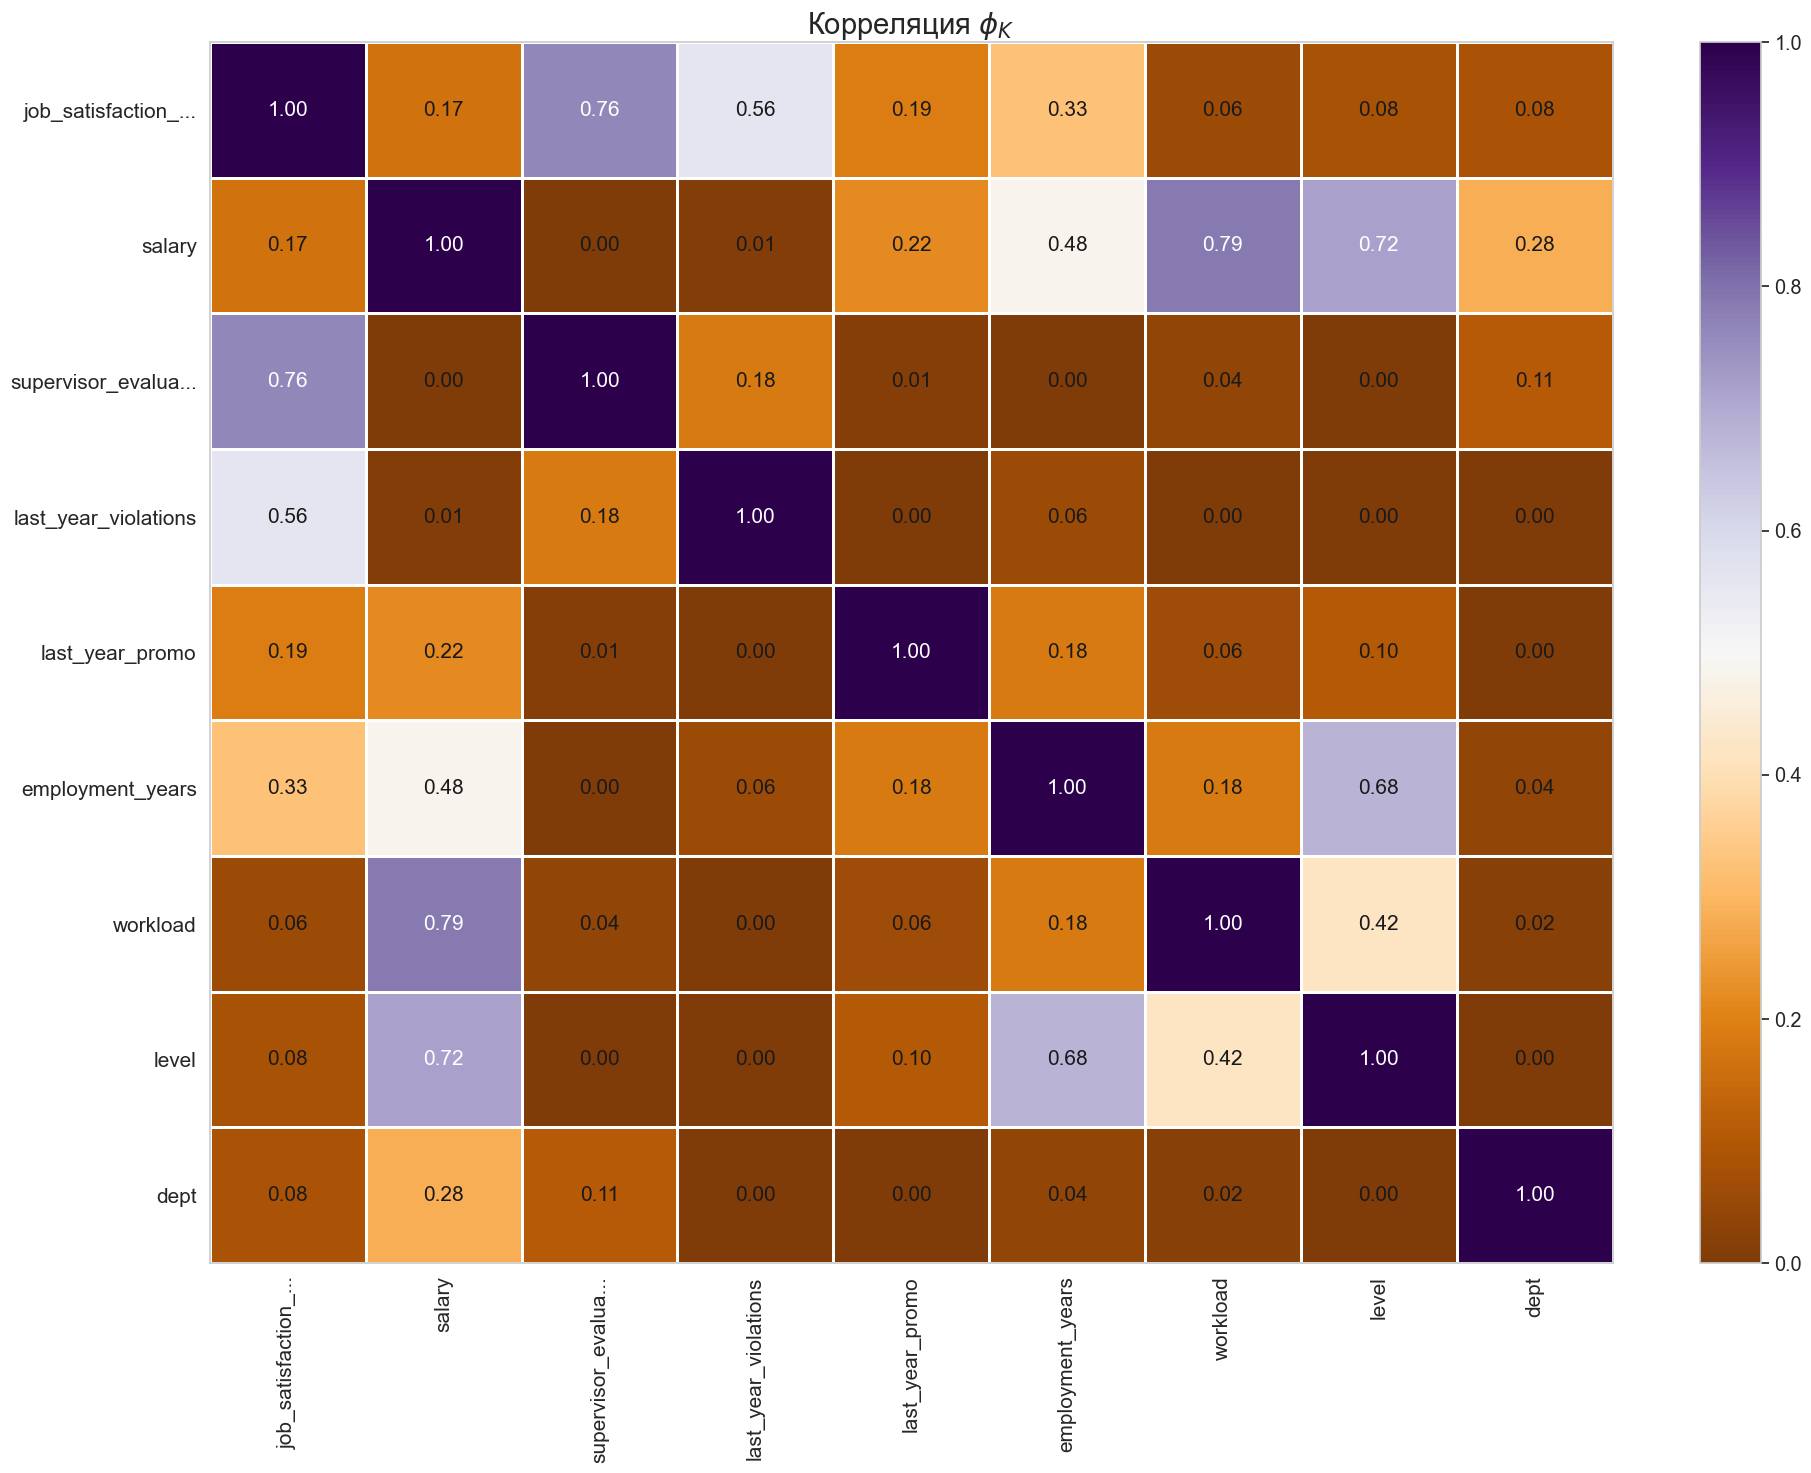

In [36]:
plot_correlation_matrix(
    corr_matrix_df.values,
    x_labels=corr_matrix_df.columns,
    y_labels=corr_matrix_df.index,
    vmin=0, vmax=1, color_map='PuOr', 
    title=r'Корреляция $\phi_K$',  
    fontsize_factor=1.5,  
    figsize=(20, 15)
)

In [37]:
corr_matrix_df_test = df_test.drop(['id'], axis=1).phik_matrix(interval_cols=['employment_years', 'supervisor_evaluation', 'salary',
       'job_satisfaction_rate'])
corr_matrix_df_test.round(2)

dept  level  workload  employment_years  \
dept                   1.00   0.00      0.03              0.00   
level                  0.00   1.00      0.47              0.69   
workload               0.03   0.47      1.00              0.20   
employment_years       0.00   0.69      0.20              1.00   
last_year_promo        0.00   0.12      0.04              0.17   
last_year_violations   0.00   0.02      0.00              0.07   
supervisor_evaluation  0.06   0.00      0.04              0.00   
salary                 0.33   0.75      0.79              0.49   

                       last_year_promo  last_year_violations  \
dept                              0.00                  0.00   
level                             0.12                  0.02   
workload                          0.04                  0.00   
employment_years                  0.17                  0.07   
last_year_promo                   1.00                  0.00   
last_year_violations              0.00                  1.00   
supervisor_evaluation             0.01                  0.19   
salary                            0.19                  0.00   

                       supervisor_evaluation  salary  
dept                                    0.06    0.33  
level                                   0.00    0.75  
workload                                0.04    0.79  
employment_years                        0.00    0.49  
last_year_promo                         0.01    0.19  
last_year_violations                    0.19    0.00  
supervisor_evaluation                   1.00    0.11  
salary                                  0.11    1.00

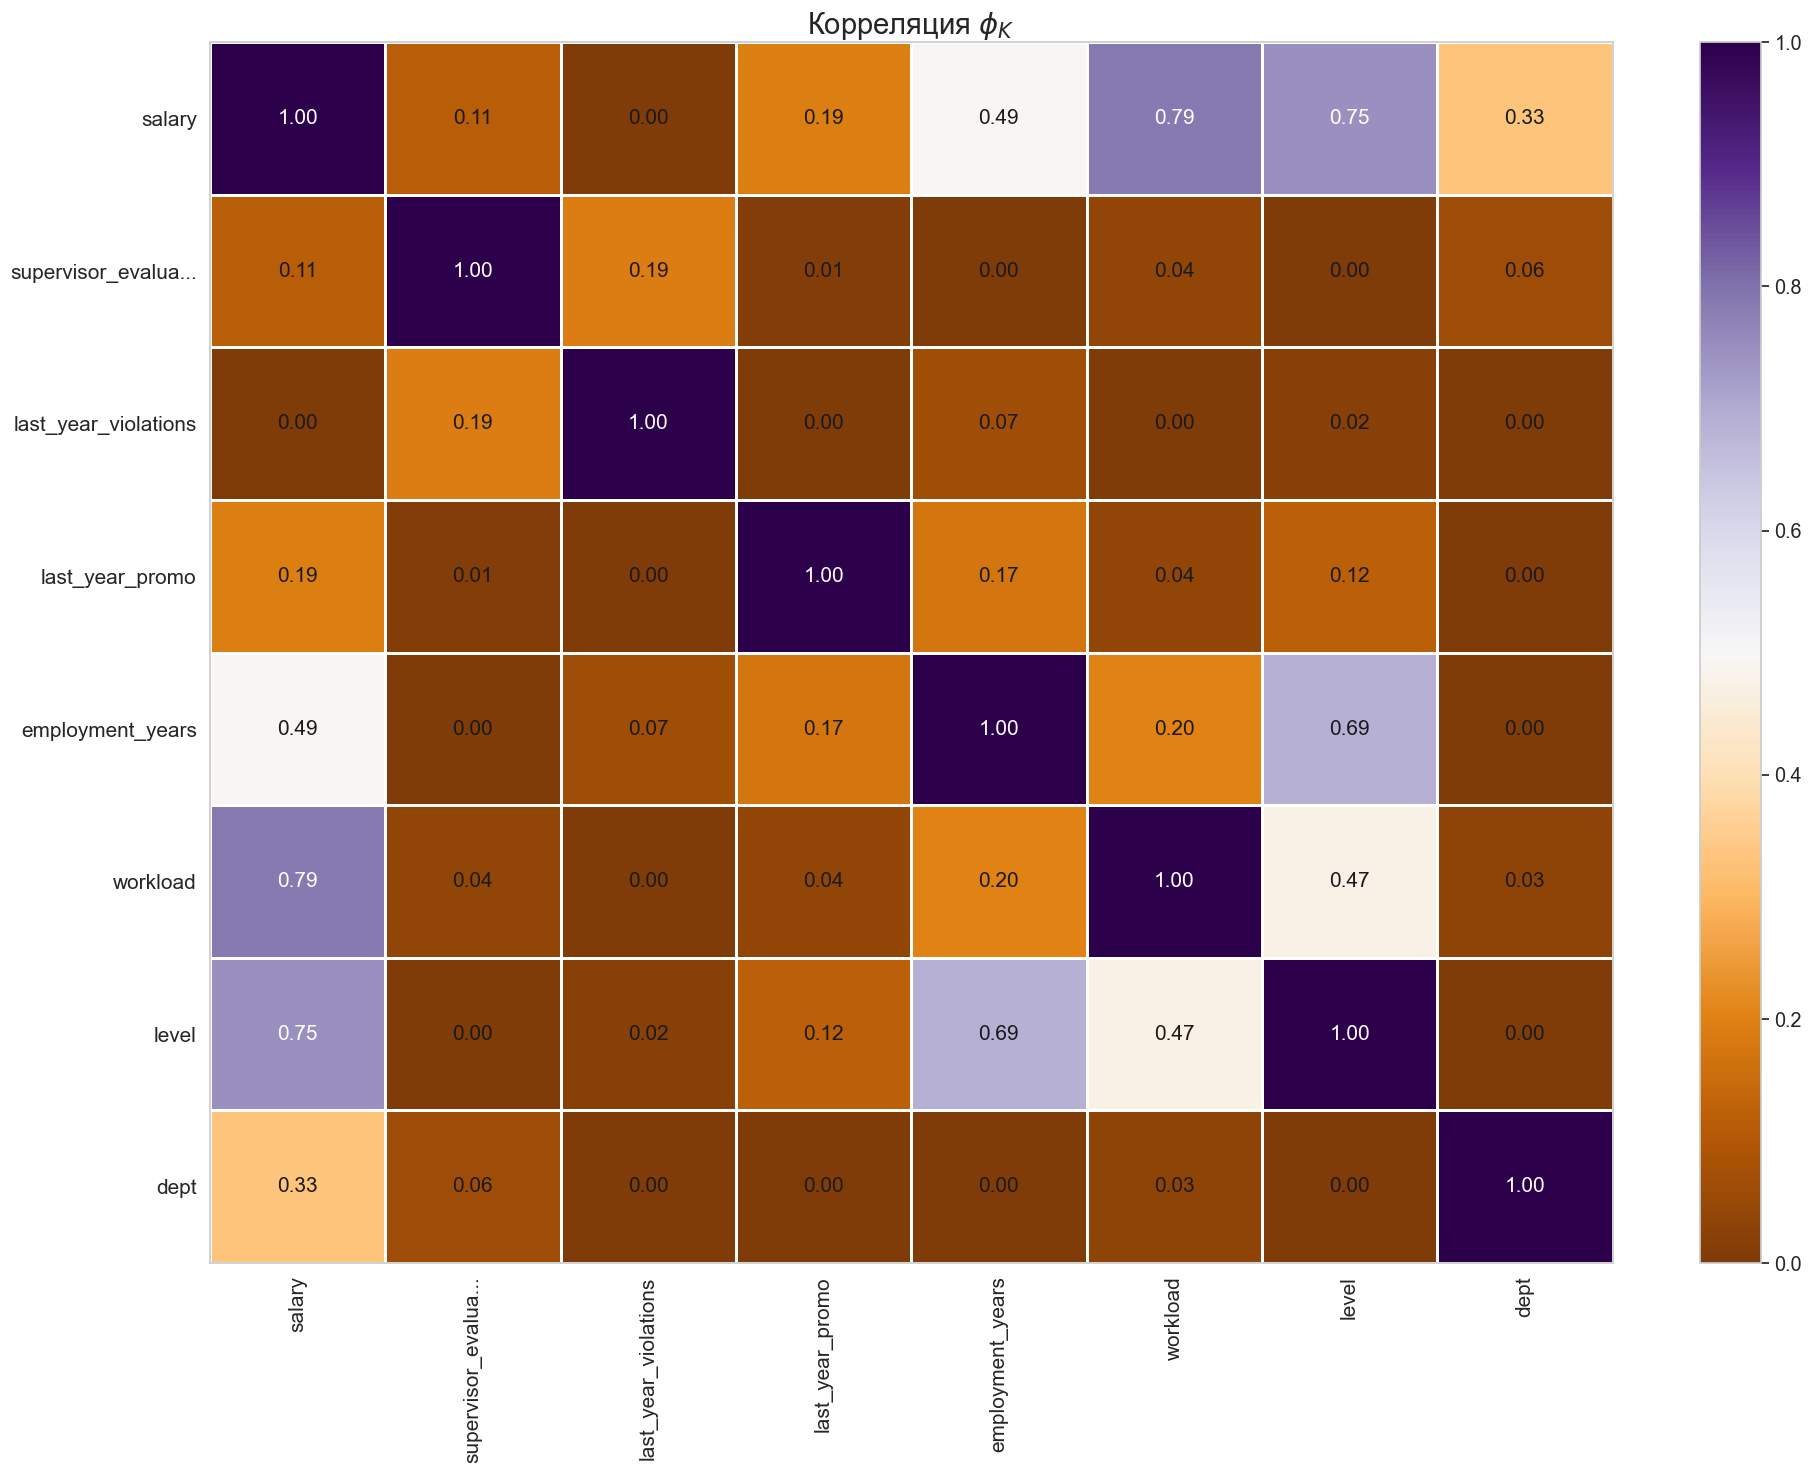

In [38]:
plot_correlation_matrix(
    corr_matrix_df_test.values,
    x_labels=corr_matrix_df_test.columns,
    y_labels=corr_matrix_df_test.index,
    vmin=0, vmax=1, color_map='PuOr', 
    title=r'Корреляция $\phi_K$',  
    fontsize_factor=1.5,  
    figsize=(20, 15)
)

Наибольшая связь наблюдается между признаками уровень заработной платы и employment_years.

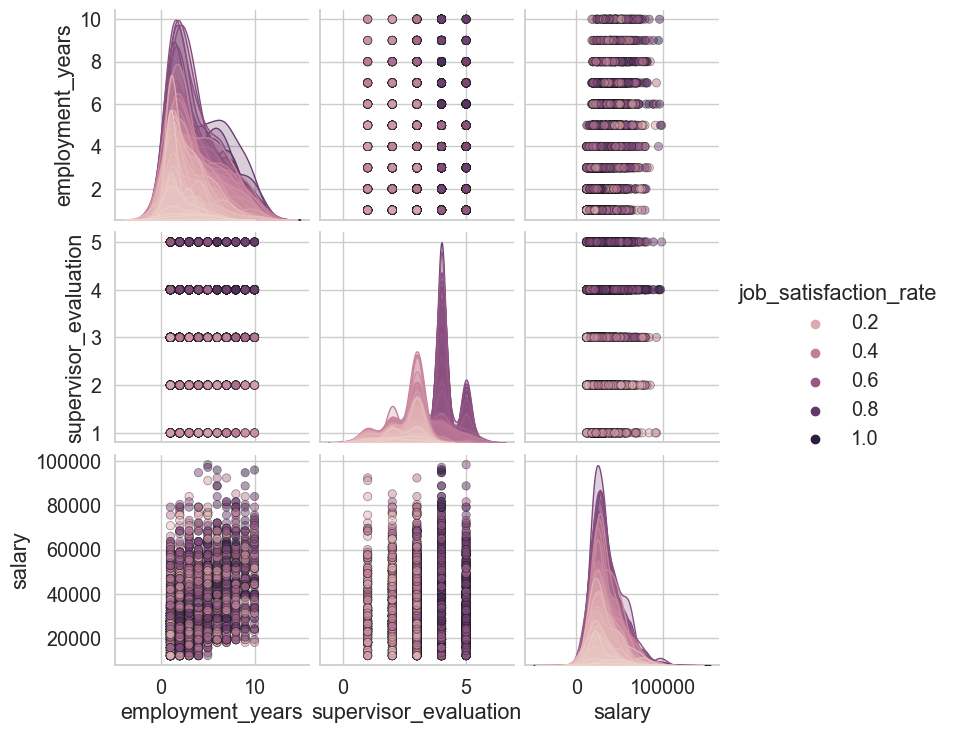

In [39]:
d = df_train[['employment_years','supervisor_evaluation','salary','job_satisfaction_rate']]
sns.pairplot(d, diag_kind = 'kde', hue = 'job_satisfaction_rate', plot_kws={'alpha':0.5, 'edgecolor': 'k'})

Посмотрим как распределяются категориальные признаки в тренировочной и тестовой выборках.

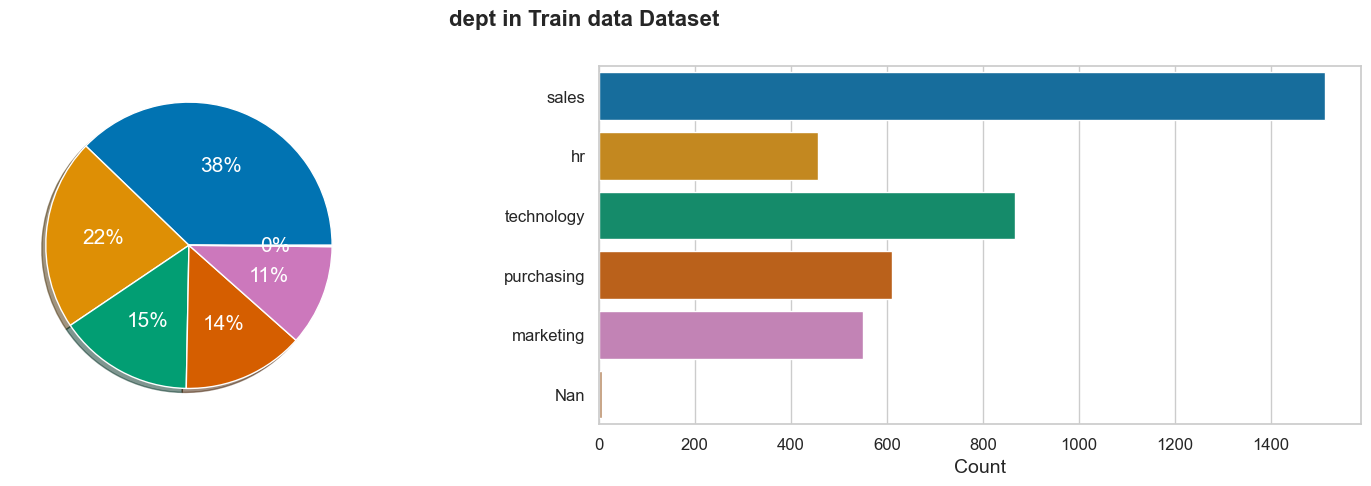

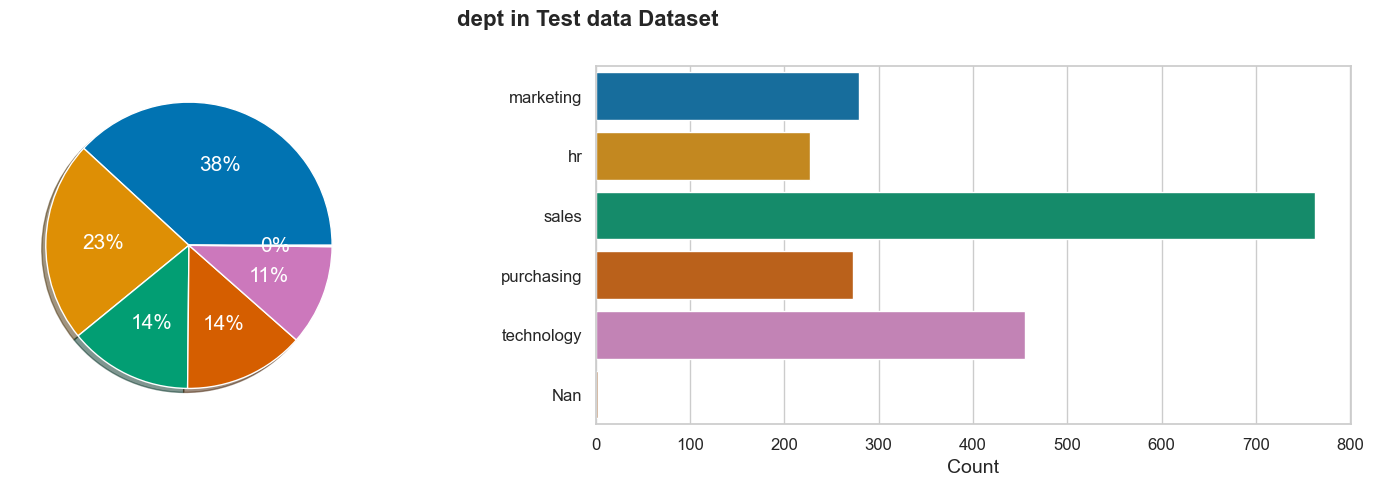

In [40]:
plot_feature(df_train, 'dept', figsize=(16,5), palette='colorblind', name='Train data')
plot_feature(df_test, 'dept', figsize=(16,5), palette='colorblind', name='Test data')

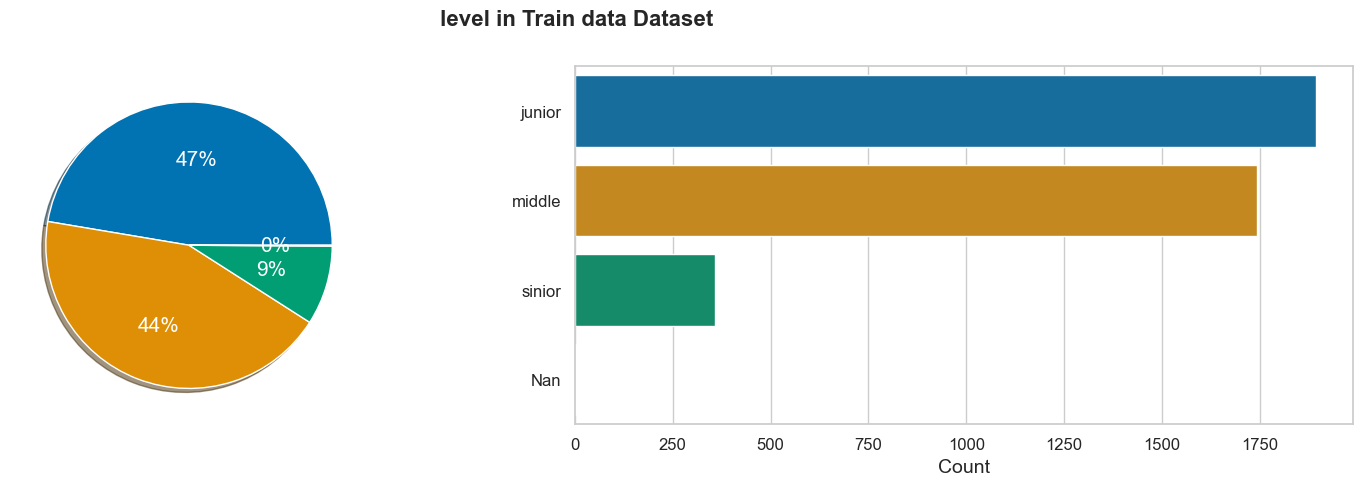

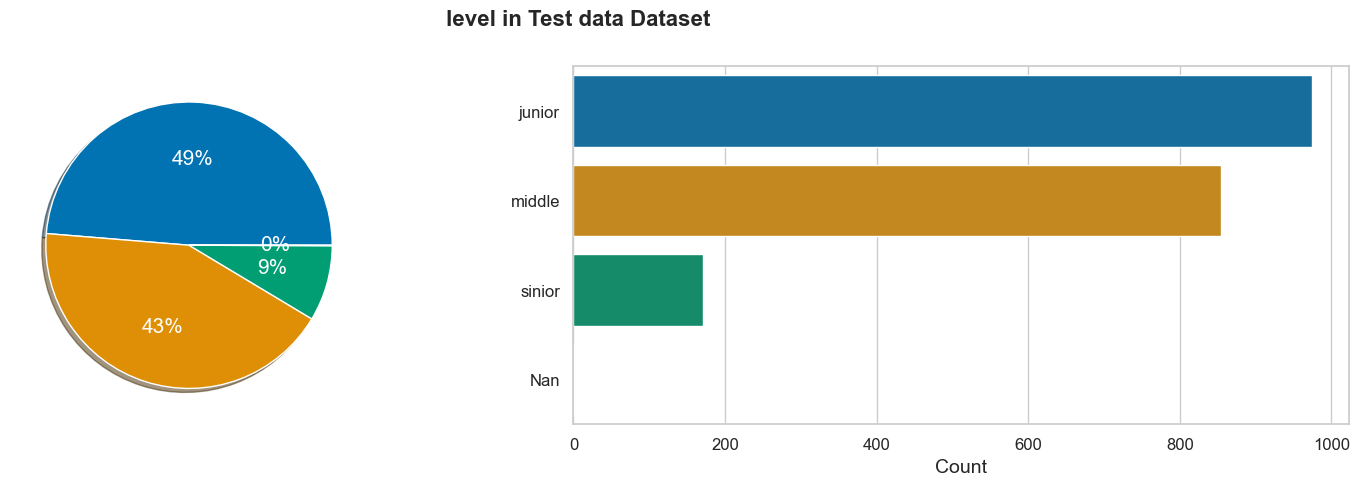

In [41]:
plot_feature(df_train, 'level', figsize=(16,5), palette='colorblind', name='Train data')
plot_feature(df_test, 'level', figsize=(16,5), palette='colorblind', name='Test data')

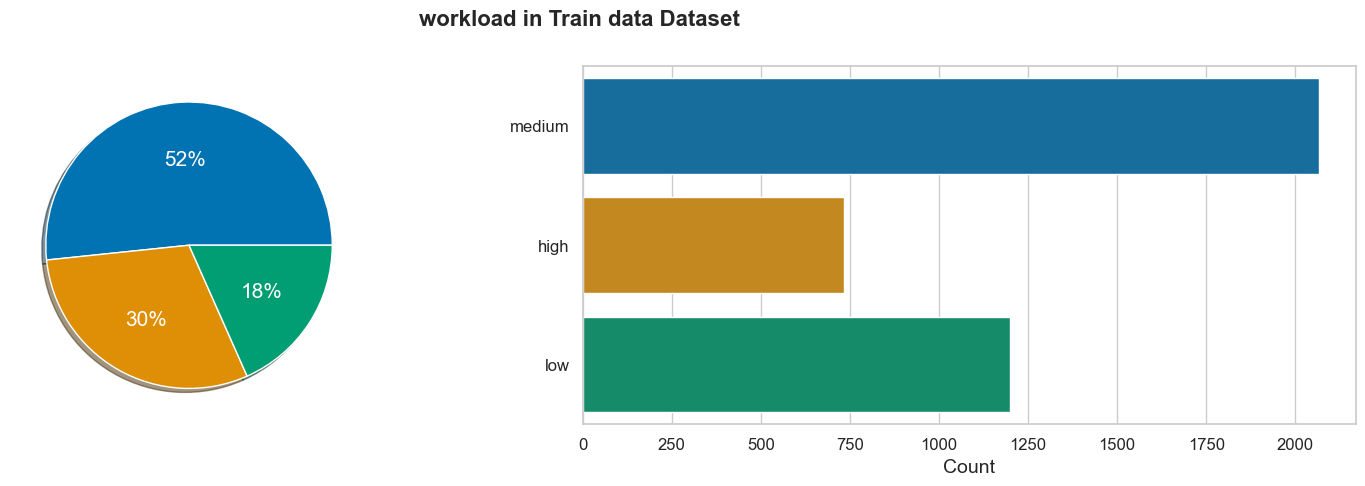

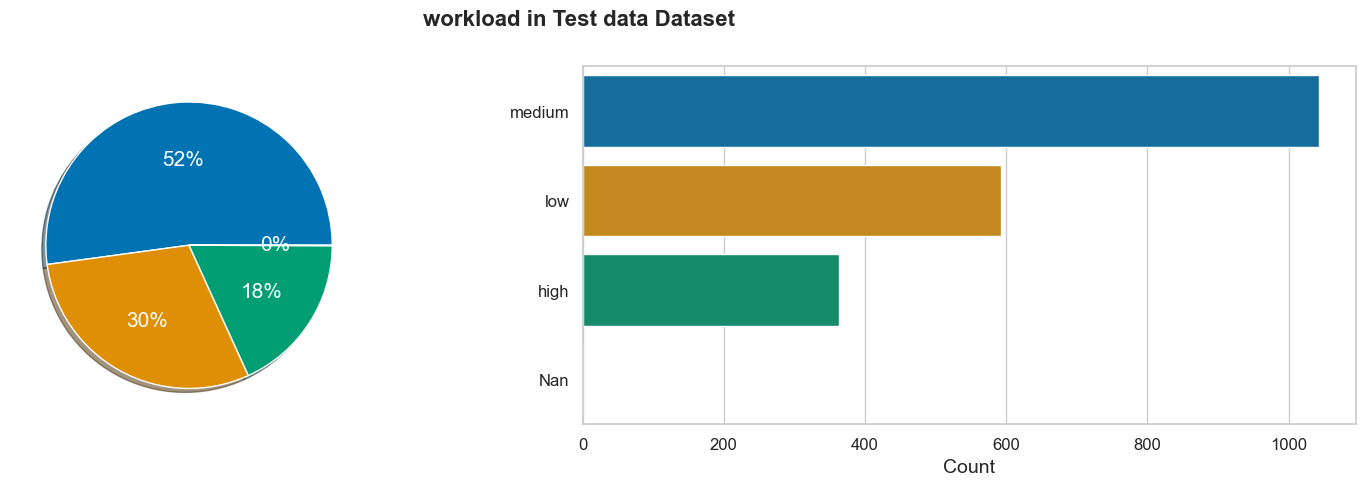

In [42]:
plot_feature(df_train, 'workload', figsize=(16,5), palette='colorblind', name='Train data')
plot_feature(df_test, 'workload', figsize=(16,5), palette='colorblind', name='Test data')

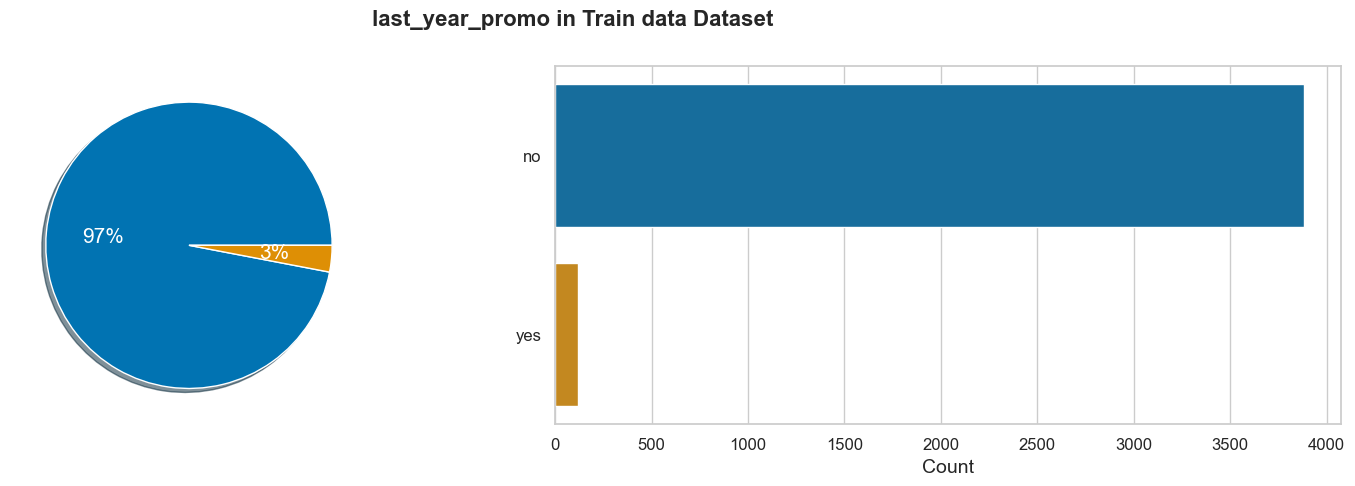

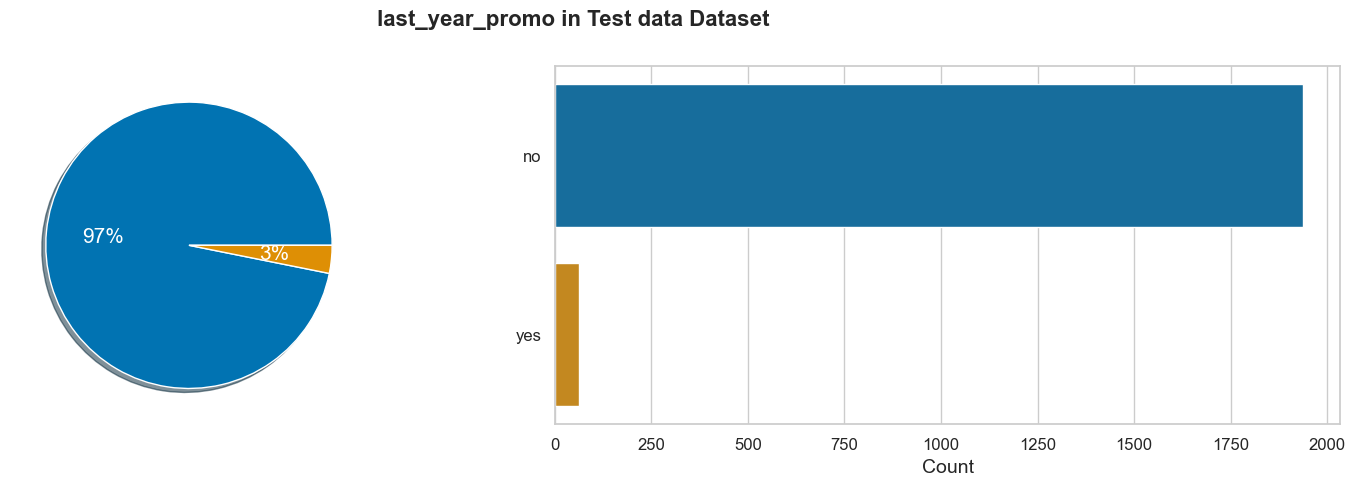

In [43]:
plot_feature(df_train, 'last_year_promo', figsize=(16,5), palette='colorblind', name='Train data')
plot_feature(df_test, 'last_year_promo', figsize=(16,5), palette='colorblind', name='Test data')

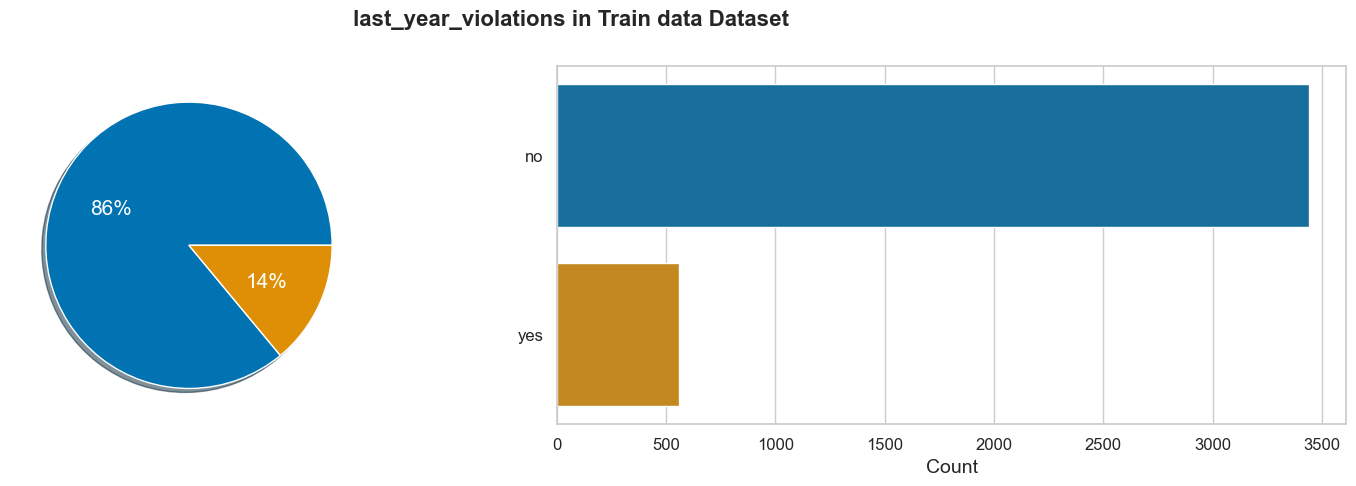

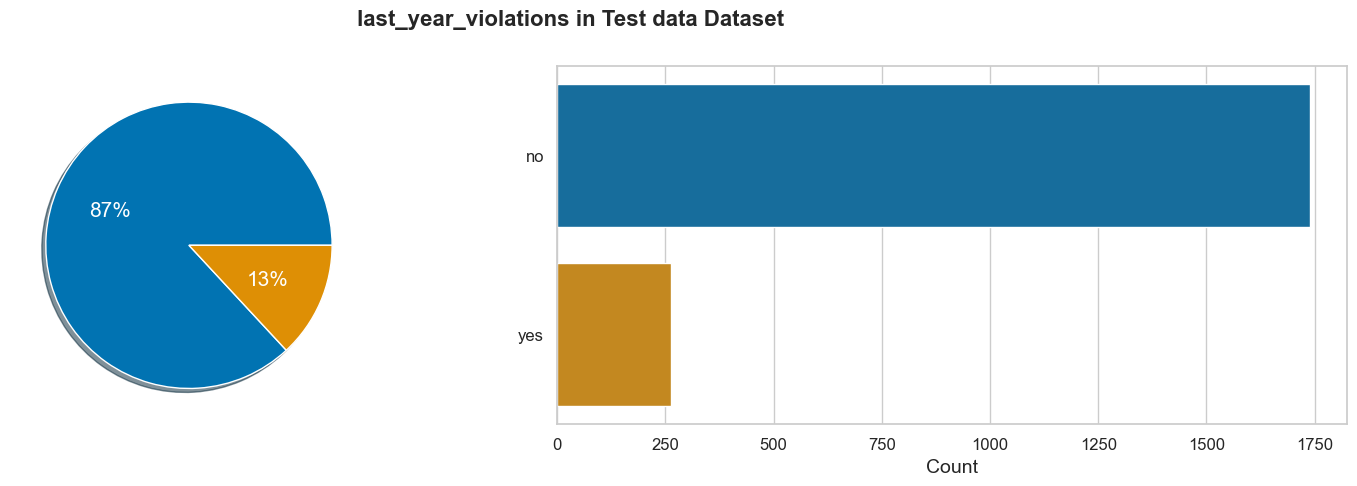

In [44]:
plot_feature(df_train, 'last_year_violations', figsize=(16,5), palette='colorblind', name='Train data')
plot_feature(df_test, 'last_year_violations', figsize=(16,5), palette='colorblind', name='Test data')

На основании визуализаций видно, что большинство сотрудников работает в отделе продаж, уровень джуниор, сильно загружены и не получали взысканий и повышений за последний год.И в тренировочной и в тестовой выборках, признаки распределены равномерно.

###### ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ  "ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ":

###### В процессе анализа данных были выполнены следующие ключевые этапы:

Описание количественных параметров: Гистограммы и статистический анализ выявили распределение ключевых количественных переменных, таких как стаж работы, оценки руководства, уровень зарплаты и уровень удовлетворенности работой. Обнаружены различия в максимальной зарплате и длительности работы в компании между различными наборами данных.


###### Описание категориальных параметров: 

Круговые диаграммы показали распределение сотрудников по отделам, уровням карьеры, рабочей нагрузке, наличию повышений и дисциплинарных нарушений.


###### Зависимость параметров от таргета: 

Визуализация данных показала, что удовлетворенность работой, уровень зарплаты и оценки руководителей зависят от категориальных переменных, таких как отдел, уровень карьеры и рабочая нагрузка.

### <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 4. Подготовка данных</strong></a><br>

Подготовка данных в пайплайн.

In [45]:
df_train.columns = df_train.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df_train.head()

id        dept   level workload  employment_years last_year_promo  \
0  155278       sales  junior   medium                 2              no   
1  653870          hr  junior     high                 2              no   
2  184592       sales  junior      low                 1              no   
3  171431  technology  junior      low                 4              no   
4  693419          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                   0.58  
1                   no                      5   38400                   0.76  
2                   no                      2   12000                   0.11  
3                   no                      2   18000                   0.37  
4                   no                      3   22800                   0.20

In [46]:
df_test.columns = df_test.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df_test.head()

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800

In [47]:
df_train[
    df_train.select_dtypes(["object"]).columns
] = df_train.select_dtypes(["object"]).apply(lambda x: x.astype("category"))

In [48]:
df_test[
    df_test.select_dtypes(["object"]).columns
] = df_test.select_dtypes(["object"]).apply(lambda x: x.astype("category"))

In [49]:
df_train = df_train.set_index('id')

In [50]:
duplicateRows_train = df_train[df_train.duplicated ()]

In [51]:
df_train = df_train.drop_duplicates (keep= False )

In [52]:
df_test = (df_test.merge(df_test_target, on="id").reset_index(drop=True))

In [53]:
df_test = df_test.set_index('id')

In [54]:
RANDOM_STATE = 42

# загружаем данные
X_train = df_train.drop(columns=['job_satisfaction_rate'], axis=1)
y_train = df_train['job_satisfaction_rate']
X_test = df_test.drop(columns=['job_satisfaction_rate'], axis=1)
y_test = df_test['job_satisfaction_rate']

X_train.shape, X_test.shape

((3545, 8), (2000, 8))

In [55]:
y_train.shape,y_test.shape

((3545,), (2000,))

In [56]:
# создаём списки с названиями признаков
ohe_columns = ['last_year_promo', 'last_year_violations', 'dept']
ord_columns = ['level', 'workload']
num_columns = ['employment_years','salary', 'supervisor_evaluation']

In [57]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

In [58]:
print(ohe_pipe)

Pipeline(steps=[('simpleImputer_ohe', SimpleImputer(strategy='most_frequent')),
                ('ohe',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False))])


In [59]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['medium', 'low', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [60]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns),
    ],
    
    remainder='passthrough'
)


In [61]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

In [62]:
param_grid = [
    {
        'models': [KNeighborsRegressor()],  # Определение модели KNeighborsRegressor
        'models__n_neighbors': range(3, 10),  # Количество соседей для рассмотрения
        'models__weights': ['uniform', 'distance'],  # Тип весов для соседей
        'models__algorithm': ['auto', 'brute'],  # Алгоритм для поиска ближайших соседей
        'models__p': [1, 2],  # Параметр мощности для расстояния Минковского (манхэттенское и евклидово расстояние)
        'models__metric': ['euclidean', 'manhattan'],  # Метрика расстояния для вычисления ближайших соседей
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),'passthrough']    
    },
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__min_samples_split': range(2, 5),
        #'models__criterion':['squared_error','friedman_mse','absolute_error','poisson'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),'passthrough']  
    }
]

### <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 5. Обучение моделей</strong></a><br>

In [63]:
kf_cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=kf_cv,
    scoring=scorer_s, 
    n_jobs=-1
)
grid.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['last_year_promo',
                                                   'last_year_violations',
                                                   'dept']),
                                  

In [64]:
print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print(line_1)
print('Параметры лучшей модели:', grid.best_params_)
print(line_1)
print('Метрика лучшей модели по кросс-валидации на обучающих данных:', grid.best_score_*-1)
print(line_1)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['last_year_promo',
                                                   'last_year_violations',
                                                   'dept']),
                                  

In [65]:
print('Метрика SMAPE для лучшей модели:\n', -(grid.best_score_))

Метрика SMAPE для лучшей модели:
 16.379529982436114


In [66]:
y_test_pred = grid.predict(X_test)

In [67]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred}) 
df

Actual  Predicted
id                       
485046    0.79       0.87
686555    0.72       0.68
467458    0.64       0.65
418655    0.60       0.66
789145    0.75       0.76
...        ...        ...
393147    0.56       0.50
109582    0.14       0.13
305653    0.11       0.24
160233    0.43       0.55
771859    0.67       0.66

[2000 rows x 2 columns]

In [68]:
actual = df['Actual'].tolist()
predicted = df['Predicted'].tolist()

smape = calculate_smape(actual, predicted)
print(f'SMAPE на тестовой выборке: {smape}%')

SMAPE на тестовой выборке: 14.232966108018246%


Найдена лучшая модель. По условиям технического задания метрика должна быть < 15. Т.е наша модель показывает хороший результат 

In [69]:
result_job = pd.DataFrame(grid.cv_results_).loc[:, ['params', 'mean_test_score', 'rank_test_score']]
result_job.mean_test_score = result_job.mean_test_score * -1
result_job = result_job.sort_values(by='rank_test_score')
# Конвертация значений в столбце params в строки
result_job['params'] = result_job['params'].astype(str)
result_job.head(10)

params  \
461                                                                                         {'models': DecisionTreeRegressor(random_state=42), 'models__min_samples_split': 4, 'preprocessor__num': MinMaxScaler()}   
463                                                                                          {'models': DecisionTreeRegressor(random_state=42), 'models__min_samples_split': 4, 'preprocessor__num': 'passthrough'}   
462                                                                                         {'models': DecisionTreeRegressor(random_state=42), 'models__min_samples_split': 4, 'preprocessor__num': RobustScaler()}   
460                                                                                       {'models': DecisionTreeRegressor(random_state=42), 'models__min_samples_split': 4, 'preprocessor__num': StandardScaler()}   
404  {'models': KNeighborsRegressor(), 'models__algorithm': 'brute', 'models__metric': 'manhattan', 'models__n_neighbors': 7, 'models__p': 1, 'models__weights': 'distance', 'preprocessor__num': StandardScaler()}   
412  {'models': KNeighborsRegressor(), 'models__algorithm': 'brute', 'models__metric': 'manhattan', 'models__n_neighbors': 7, 'models__p': 2, 'models__weights': 'distance', 'preprocessor__num': StandardScaler()}   
180   {'models': KNeighborsRegressor(), 'models__algorithm': 'auto', 'models__metric': 'manhattan', 'models__n_neighbors': 7, 'models__p': 1, 'models__weights': 'distance', 'preprocessor__num': StandardScaler()}   
188   {'models': KNeighborsRegressor(), 'models__algorithm': 'auto', 'models__metric': 'manhattan', 'models__n_neighbors': 7, 'models__p': 2, 'models__weights': 'distance', 'preprocessor__num': StandardScaler()}   
388  {'models': KNeighborsRegressor(), 'models__algorithm': 'brute', 'models__metric': 'manhattan', 'models__n_neighbors': 6, 'models__p': 1, 'models__weights': 'distance', 'preprocessor__num': StandardScaler()}   
396  {'models': KNeighborsRegressor(), 'models__algorithm': 'brute', 'models__metric': 'manhattan', 'models__n_neighbors': 6, 'models__p': 2, 'models__weights': 'distance', 'preprocessor__num': StandardScaler()}   

     mean_test_score  rank_test_score  
461            16.38                1  
463            16.38                2  
462            16.42                3  
460            16.42                4  
404            16.50                5  
412            16.50                5  
180            16.52                7  
188            16.52                7  
388            16.53                9  
396            16.53                9

С помощью пайплайна была проведена предварительная подготовка, использовано 2 кодировщика, использован ColumnTransformer, обучены 3 модели LogisticRegression(penalty='l1', solver='saga', random_state=RANDOM_STATE), KNeighborsRegressor(), DecisionTreeRegressor(random_state=RANDOM_STATE). С помощью GridSearchCV выбрана лучшая модель и лучшие параметры кней. Это DecisionTreeRegressor(random_state=RANDOM_STATE). Проверили качество лучшей модели с помощью метрики SMAPE, величина которой 14,23% на тестовой выборке. Что свидетельствует о хорошем качестве, полученной нами модели.

### <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 6. Обучение моделей</strong></a><br>

Основное различие между логистической регрессией и деревьями решений заключается в том, что логистическая регрессия моделирует взаимосвязь между предикторными переменными и переменной результата в виде линейной функции, в то время как деревья решений создают иерархическую древовидную структуру для моделирования взаимосвязей между переменными.

Проверим нашу модель.

In [70]:
dummy_clf = DummyRegressor(strategy="mean")

dummy_clf.fit(X_train, y_train)

DummyRegressor()

In [71]:
y_test_pred_dummy = dummy_clf.predict(X_test)

In [72]:
df_dummy = pd.DataFrame({'Actual_d': y_test, 'Predicted_d': y_test_pred_dummy}) 
df_dummy

Actual_d  Predicted_d
id                           
485046      0.79         0.53
686555      0.72         0.53
467458      0.64         0.53
418655      0.60         0.53
789145      0.75         0.53
...          ...          ...
393147      0.56         0.53
109582      0.14         0.53
305653      0.11         0.53
160233      0.43         0.53
771859      0.67         0.53

[2000 rows x 2 columns]

In [73]:
actual_d = df_dummy['Actual_d'].tolist()
predicted_d = df_dummy['Predicted_d'].tolist()

smape_d = calculate_smape(actual_d, predicted_d)
print(f'Метрика SMAPE dummy: {smape_d}%')
print(f'Метрика SMAPE на тестовой выборке: {smape}%')

Метрика SMAPE dummy: 38.30438274509703%
Метрика SMAPE на тестовой выборке: 14.232966108018246%


Была произведена проверка качества модели регрессии и ее показания значительно превысили метрику на тестовой выборке, что еще раз свидетельствует о хорошем качестве нашей модели.

Посмотрим как распределены признаки по важности, т.е по влиянию на целевой признак.

In [74]:
shap.initjs() 
X_test_transformed = grid.best_estimator_.named_steps['preprocessor'].transform(X_test)
model = grid.best_estimator_.named_steps['models'].predict
X_train_transformed = grid.best_estimator_.named_steps['preprocessor'].transform(X_train)
explainer = shap.Explainer(model, X_train_transformed)

PermutationExplainer explainer: 2001it [00:13, 59.95it/s]                                                              


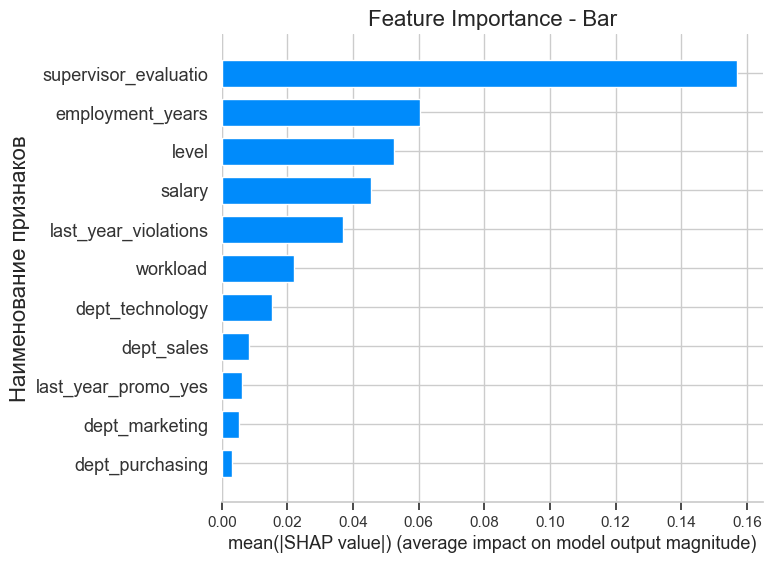

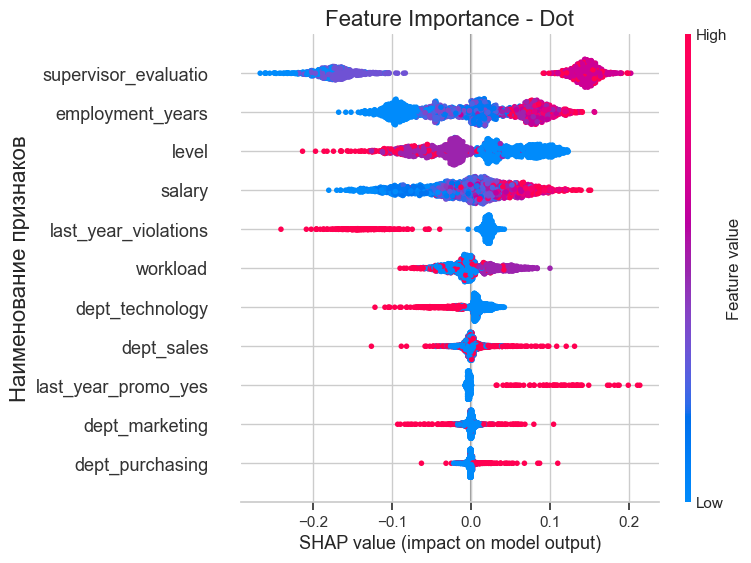

<Figure size 2000x700 with 0 Axes>

In [75]:
shap_values = explainer.shap_values(X_test_transformed)
feature_names =list(map(lambda x: x.split('__')[1][:20],grid.best_estimator_.named_steps['preprocessor'].get_feature_names_out()))
plt.title("Feature Importance - Bar", fontsize=16)
plt.ylabel("Наименование признаков", fontsize=16)
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, plot_type="bar")
plt.title("Feature Importance - Dot", fontsize=16)
plt.ylabel("Наименование признаков", fontsize=16)
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, plot_type="dot");

# Adjust layout and display the plots side by side
plt.tight_layout()
plt.show()

Наибольшее влияние на таргет оказывает признак: supervisor_evaluation. чем ниже оценка руководителя тем ниже удовлетворенность работой и наоборот.

<a id="top"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Задача №2</b></div>

### <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 1. Загрузка данных</strong></a><br>

In [76]:
try:
    df_train_quit = pd.read_csv('/datasets/train_quit.csv', delimiter = ",",decimal=".") 
    df_test_features = pd.read_csv('/datasets/test_features.csv', delimiter = ",", decimal=".") 
    df_test_target_quit = pd.read_csv('/datasets/test_target_quit.csv', delimiter = ",", decimal=".") 
except:
    df_train_quit = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv', delimiter = ",", decimal=".") 
    df_test_features = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv', delimiter = ",", decimal=".") 
    df_test_target_quit = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv', delimiter = ",", decimal=".")
    
    target_col_2 = 'quit'

In [77]:
display(df_train_quit.head())
df_train_quit.tail()
print()
df_train_quit.sample()
df_train_quit.info(memory_usage='deep')

id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
3  257132       sales  junior   medium                 2              no   
4  910140   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  
0                   no                      4   54000   no  
1                   no                      4   27600   no  
2                   no                      1   37200   no  
3                  yes                      3   24000  yes  
4                   no                      5   25200   no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 1.5 MB


Представлена таблица 4000 строк, 9 столбцов, без пропусков, тип данных соответствует. вес 1,5мб

In [78]:
display(df_test_features.head())
df_test_features.tail()
print()
df_test_features.sample()
df_test_features.info(memory_usage='deep')

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 662.0 KB


Представлена таблица 2000 строк, 8 столбцов, пропуски в 2 столбцах, тип данных соответствует. вес 662кб.

In [79]:
display(df_test_target_quit.head())
df_test_target_quit.tail()
print()
df_test_target_quit.sample()
df_test_target_quit.info(memory_usage='deep')

id quit
0  999029  yes
1  372846   no
2  726767   no
3  490105   no
4  416898  yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 131.5 KB


Таблица 2000 строк без пропусков, 2 столбца. 131,5кб

In [80]:
optimize_memory_usage(df_train_quit)

Размер использования памяти: до  0.31 Mb - после  0.22 Mb (27.5%)


id        dept   level workload  employment_years last_year_promo  \
0     723290       sales  middle     high                 2              no   
1     814010       sales  junior   medium                 2              no   
2     155091  purchasing  middle   medium                 5              no   
3     257132       sales  junior   medium                 2              no   
4     910140   marketing  junior   medium                 2              no   
...      ...         ...     ...      ...               ...             ...   
3995  588809       sales  junior   medium                 4              no   
3996  672059       sales  middle     high                 9              no   
3997  536432  purchasing  junior      low                 2              no   
3998  692133  purchasing  middle   medium                 2              no   
3999  853842       sales  junior   medium                 2              no   

     last_year_violations  supervisor_evaluation  salary quit  
0                      no                      4   54000   no  
1                      no                      4   27600   no  
2                      no                      1   37200   no  
3                     yes                      3   24000  yes  
4                      no                      5   25200   no  
...                   ...                    ...     ...  ...  
3995                   no                      3   26400   no  
3996                   no                      4   52800   no  
3997                  yes                      4   12000  yes  
3998                   no                      4   33600   no  
3999                   no                      3   27600  yes  

[4000 rows x 10 columns]

In [81]:
optimize_memory_usage(df_test_features)

Размер использования памяти: до  0.14 Mb - после  0.10 Mb (30.5%)


id        dept   level workload  employment_years last_year_promo  \
0     485046   marketing  junior   medium                 2              no   
1     686555          hr  junior   medium                 1              no   
2     467458       sales  middle      low                 5              no   
3     418655       sales  middle      low                 6              no   
4     789145          hr  middle   medium                 5              no   
...      ...         ...     ...      ...               ...             ...   
1995  393147   marketing  junior      low                 3              no   
1996  109582  technology  middle      low                 3              no   
1997  305653  technology  junior      low                 1              no   
1998  160233  technology  middle      low                 8              no   
1999  771859  purchasing  middle   medium                 1              no   

     last_year_violations  supervisor_evaluation  salary  
0                      no                      5   28800  
1                      no                      4   30000  
2                      no                      4   19200  
3                      no                      4   19200  
4                      no                      5   40800  
...                   ...                    ...     ...  
1995                   no                      3   20400  
1996                   no                      2   21600  
1997                   no                      3   14400  
1998                   no                      1   32400  
1999                   no                      4   38400  

[2000 rows x 9 columns]

In [82]:
optimize_memory_usage(df_test_target_quit)

Размер использования памяти: до  0.03 Mb - после  0.02 Mb (24.9%)


id quit
0     999029  yes
1     372846   no
2     726767   no
3     490105   no
4     416898  yes
...      ...  ...
1995  836109  yes
1996  180999  yes
1997  746018   no
1998  247658   no
1999  460332  yes

[2000 rows x 2 columns]

Оптимизировали тип данных. Вес датафреймов уменьшился в среднем на 30%.

### <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 2. Предобработка данных</strong></a><br>

разделим столбцы по категориям

In [83]:
num_cols_2 = [col for col in df_train_quit.columns if df_train_quit[col].dtype != 'object']

In [84]:
num_cols_2

['id', 'employment_years', 'supervisor_evaluation', 'salary']

In [85]:
cat_cols_2 = ['dept', 'level', 'workload']

In [86]:
bin_cols_2 = ['last_year_promo', 'last_year_violations', 'quit']

In [87]:
for col in cat_cols_2:
    print(f"{col} has {df_train_quit[col].unique()} values\n")

dept has ['sales' 'purchasing' 'marketing' 'technology' 'hr'] values

level has ['middle' 'junior' 'sinior'] values

workload has ['high' 'medium' 'low'] values



In [88]:
for col in bin_cols_2:
    print(f"{col} has {df_train_quit[col].unique()} values\n")

last_year_promo has ['no' 'yes'] values

last_year_violations has ['no' 'yes'] values

quit has ['no' 'yes'] values



In [89]:
for col in cat_cols_2:
    print(f"{col} has {df_test_features[col].unique()} values\n")

dept has ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' '] values

level has ['junior' 'middle' 'sinior' nan] values

workload has ['medium' 'low' 'high' ' '] values



Выявлены аномальные значения в столбце workload

In [90]:
df_test_features['dept'] = df_test_features['dept'].replace(' ', np.nan)
df_test_features['workload'] = df_test_features['workload'].replace(' ', np.nan)

Посмотрим статистику данных

In [91]:
check_data(df_train_quit, 'Train data')
print('-'*100)
check_data(df_test_features, 'Test data')
print('-'*100)
check_data(df_test_target_quit, 'df_test_target_quit');

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


В тренировочной выборке средний стаж работы составляет 2,5, максимальный 10 лет, наблюдается средняя оценка супервайзера чуть больше 1, максимальная зарплата 96000, средняя 15152

В тестовой выборке средний стаж работы составляет 2,5, максимальный 10 лет, наблюдается средняя оценка супервайзера чуть больше 1, максимальная зарплата 96000, средняя 15398

In [92]:
rename(df_train_quit)
rename(df_test_features)
rename(df_test_target_quit)

id quit
0     999029  yes
1     372846   no
2     726767   no
3     490105   no
4     416898  yes
...      ...  ...
1995  836109  yes
1996  180999  yes
1997  746018   no
1998  247658   no
1999  460332  yes

[2000 rows x 2 columns]

### <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong> Шаг 3. Исследовательский анализ данных</strong></a><br>

Будет произведен исследовательский анализ данных из тренировочной выборки. Анализ данных тестовой выборки был произведен в первой задаче, данные не менялись.

Посмотрим на распределение числовых признаков в тренировочной выборке

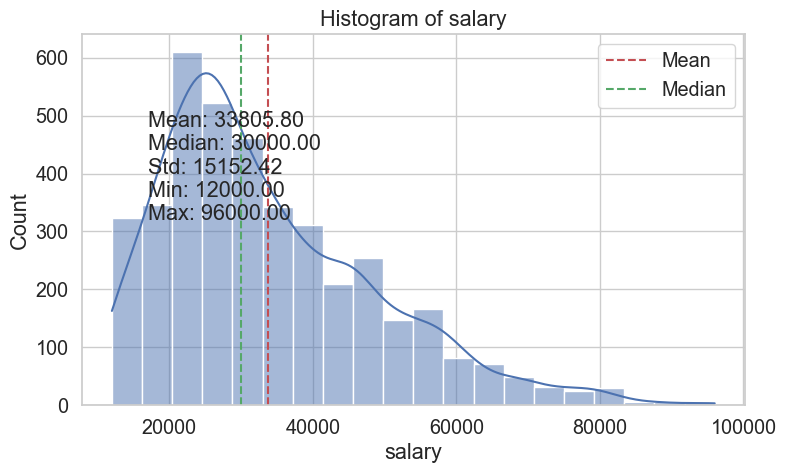

In [93]:
plot_histogram_with_stats(df_train_quit.drop(['id','employment_years', 'supervisor_evaluation'], axis=1))

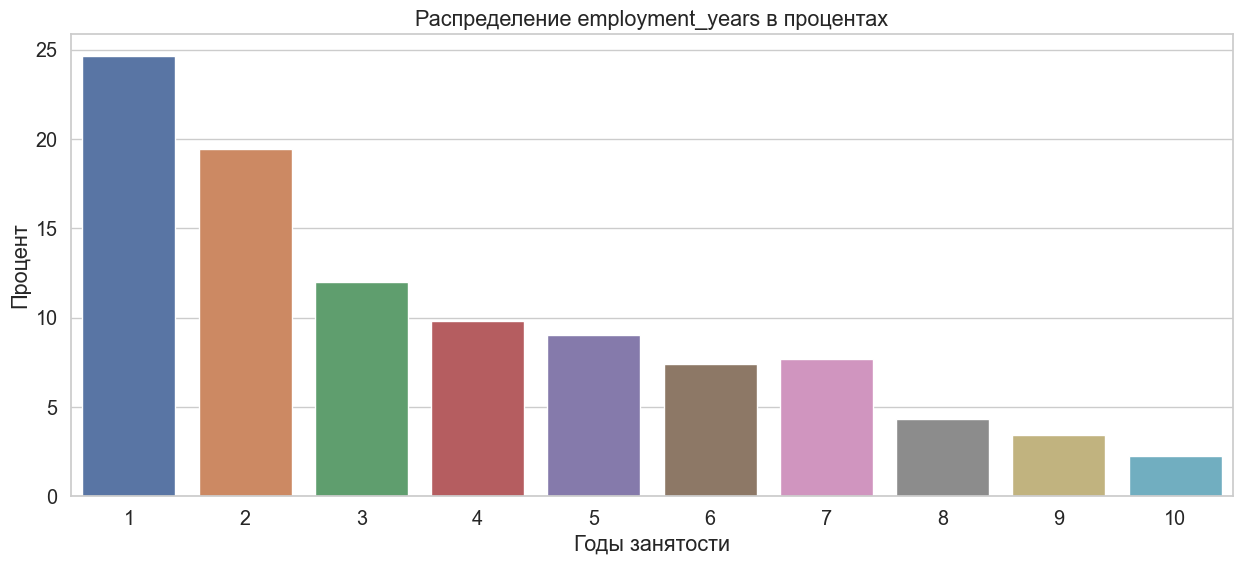

In [94]:
# Рассчитываем частоты в процентах
value_counts_normalized = df_train_quit['employment_years'].value_counts(normalize=True).reset_index()
value_counts_normalized.columns = ['employment_years', 'frequency']

# Умножаем на 100, чтобы преобразовать доли в проценты
value_counts_normalized['frequency'] *= 100

plt.figure(figsize=(15, 6))
# Построение графика абсолютных величин в процентах
sns.barplot(x='employment_years', y='frequency', data=value_counts_normalized)
plt.title('Распределение employment_years в процентах')
plt.xlabel('Годы занятости')
plt.ylabel('Процент')
plt.show()

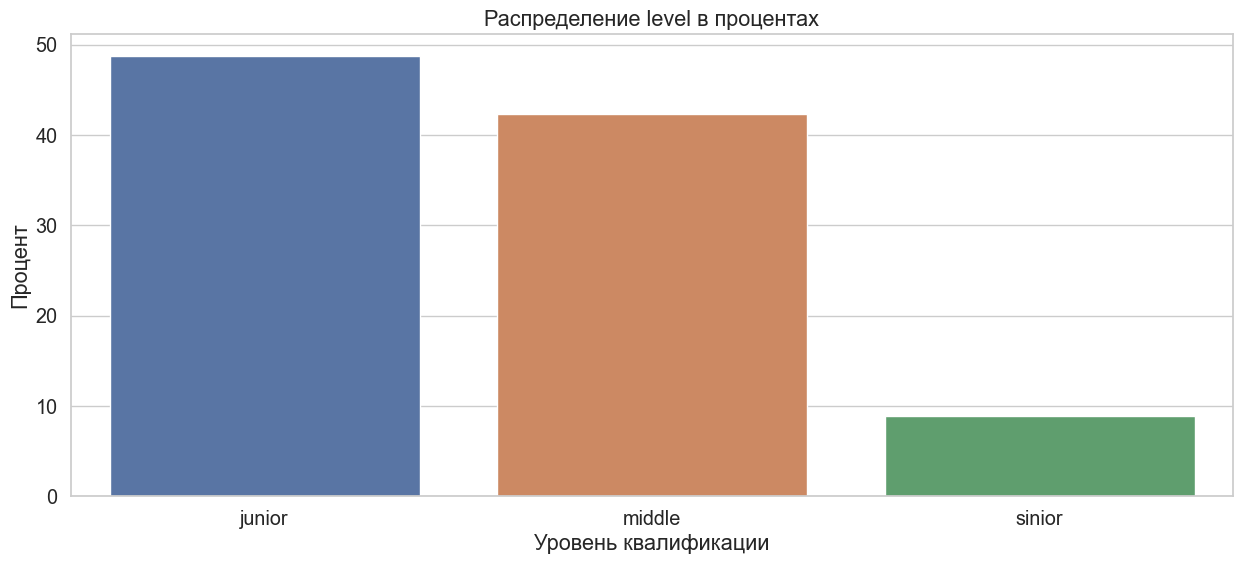

In [95]:
value_counts_normalized = df_train_quit['level'].value_counts(normalize=True).reset_index()
value_counts_normalized.columns = ['level', 'frequency']

# Умножаем на 100, чтобы преобразовать доли в проценты
value_counts_normalized['frequency'] *= 100

plt.figure(figsize=(15, 6))
# Построение графика абсолютных величин в процентах
sns.barplot(x='level', y='frequency', data=value_counts_normalized)
plt.title('Распределение level в процентах')
plt.xlabel('Уровень квалификации')
plt.ylabel('Процент')
plt.show()

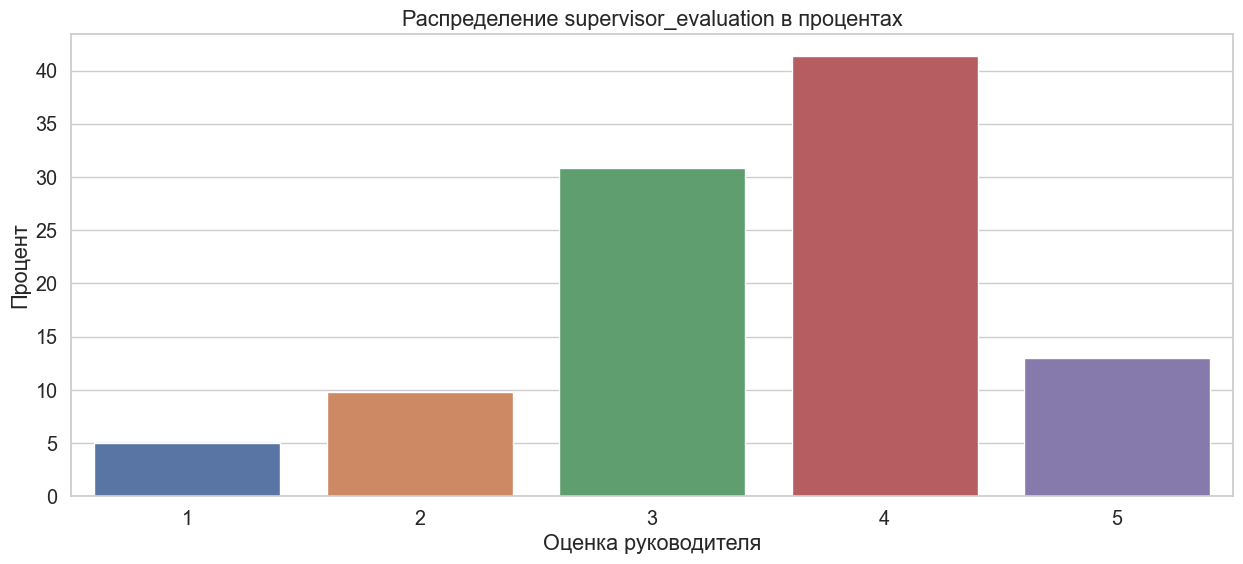

In [96]:
value_counts_normalized = df_train_quit['supervisor_evaluation'].value_counts(normalize=True).reset_index()
value_counts_normalized.columns = ['supervisor_evaluation', 'frequency']

# Умножаем на 100, чтобы преобразовать доли в проценты
value_counts_normalized['frequency'] *= 100

plt.figure(figsize=(15, 6))
# Построение графика абсолютных величин в процентах
sns.barplot(x='supervisor_evaluation', y='frequency', data=value_counts_normalized)
plt.title('Распределение supervisor_evaluation в процентах')
plt.xlabel('Оценка руководителя')
plt.ylabel('Процент')
plt.show()

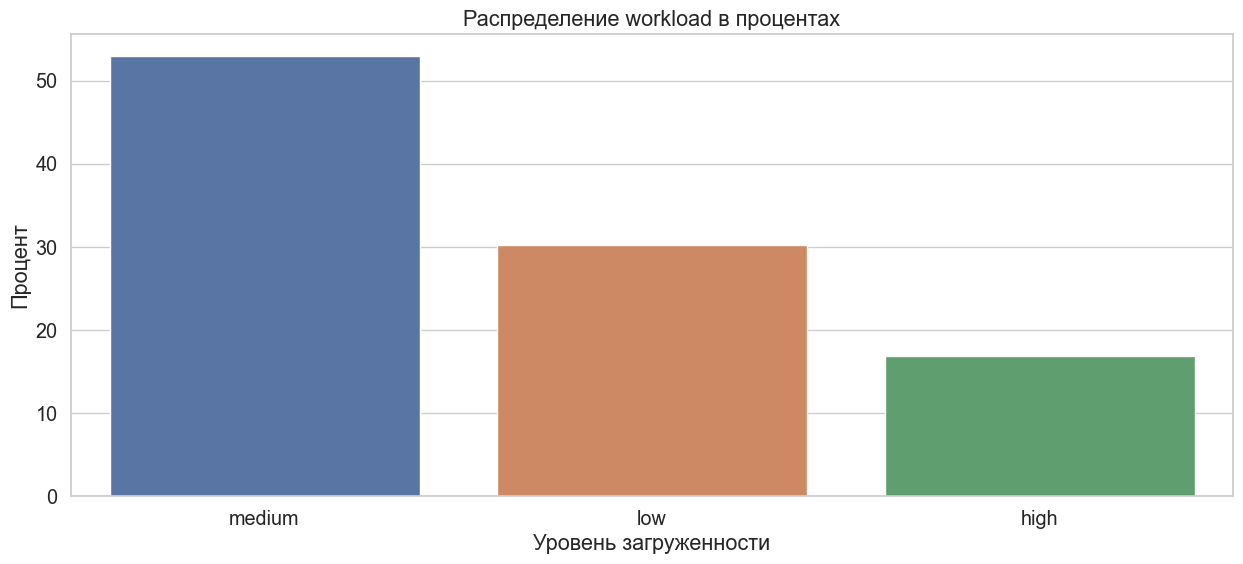

In [97]:
value_counts_normalized = df_train_quit['workload'].value_counts(normalize=True).reset_index()
value_counts_normalized.columns = ['workload', 'frequency']

# Умножаем на 100, чтобы преобразовать доли в проценты
value_counts_normalized['frequency'] *= 100

plt.figure(figsize=(15, 6))
# Построение графика абсолютных величин в процентах
sns.barplot(x='workload', y='frequency', data=value_counts_normalized)
plt.title('Распределение workload в процентах')
plt.xlabel('Уровень загруженности')
plt.ylabel('Процент')
plt.show()

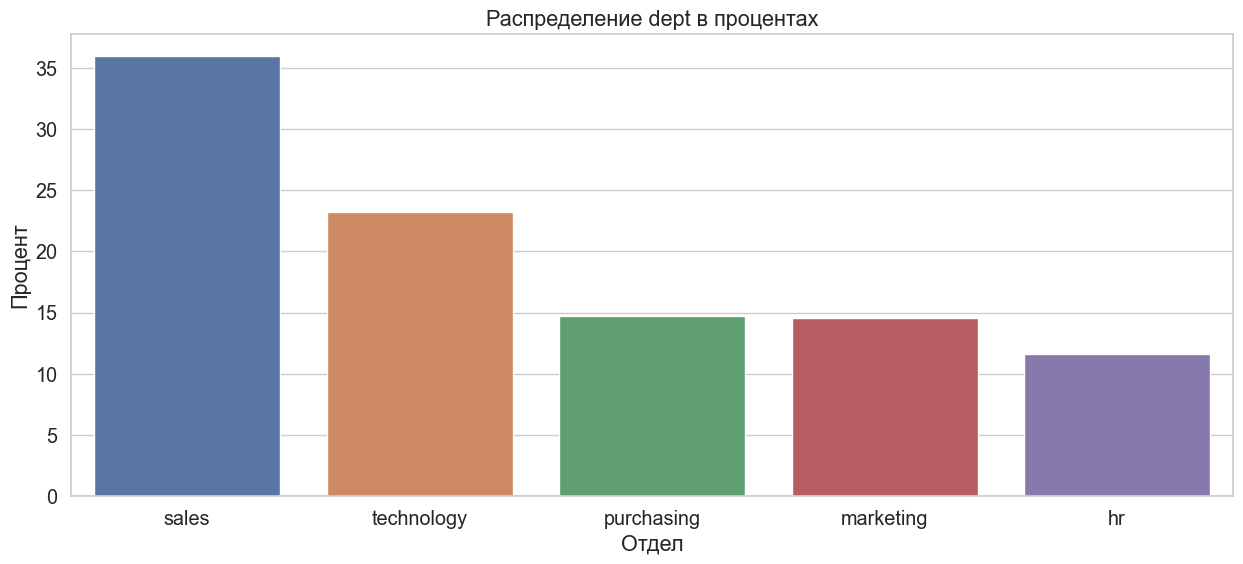

In [98]:
value_counts_normalized = df_train_quit['dept'].value_counts(normalize=True).reset_index()
value_counts_normalized.columns = ['dept', 'frequency']

# Умножаем на 100, чтобы преобразовать доли в проценты
value_counts_normalized['frequency'] *= 100

plt.figure(figsize=(15, 6))
# Построение графика абсолютных величин в процентах
sns.barplot(x='dept', y='frequency', data=value_counts_normalized)
plt.title('Распределение dept в процентах')
plt.xlabel('Отдел')
plt.ylabel('Процент')
plt.show()

In [99]:
df_train_quit.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'quit'],
      dtype='object')

In [100]:
corr_matrix_df_q = df_train_quit.drop(['id'], axis=1).phik_matrix(interval_cols=['employment_years', 'supervisor_evaluation', 'salary'])
corr_matrix_df_q.round(2)

dept  level  workload  employment_years  \
dept                   1.00   0.00      0.00              0.00   
level                  0.00   1.00      0.48              0.69   
workload               0.00   0.48      1.00              0.21   
employment_years       0.00   0.69      0.21              1.00   
last_year_promo        0.00   0.11      0.04              0.16   
last_year_violations   0.04   0.00      0.01              0.00   
supervisor_evaluation  0.04   0.01      0.00              0.00   
salary                 0.28   0.75      0.79              0.49   
quit                   0.00   0.31      0.13              0.66   

                       last_year_promo  last_year_violations  \
dept                              0.00                  0.04   
level                             0.11                  0.00   
workload                          0.04                  0.01   
employment_years                  0.16                  0.00   
last_year_promo                   1.00                  0.00   
last_year_violations              0.00                  1.00   
supervisor_evaluation             0.03                  0.18   
salary                            0.22                  0.09   
quit                              0.16                  0.19   

                       supervisor_evaluation  salary  quit  
dept                                    0.04    0.28  0.00  
level                                   0.01    0.75  0.31  
workload                                0.00    0.79  0.13  
employment_years                        0.00    0.49  0.66  
last_year_promo                         0.03    0.22  0.16  
last_year_violations                    0.18    0.09  0.19  
supervisor_evaluation                   1.00    0.06  0.25  
salary                                  0.06    1.00  0.56  
quit                                    0.25    0.56  1.00

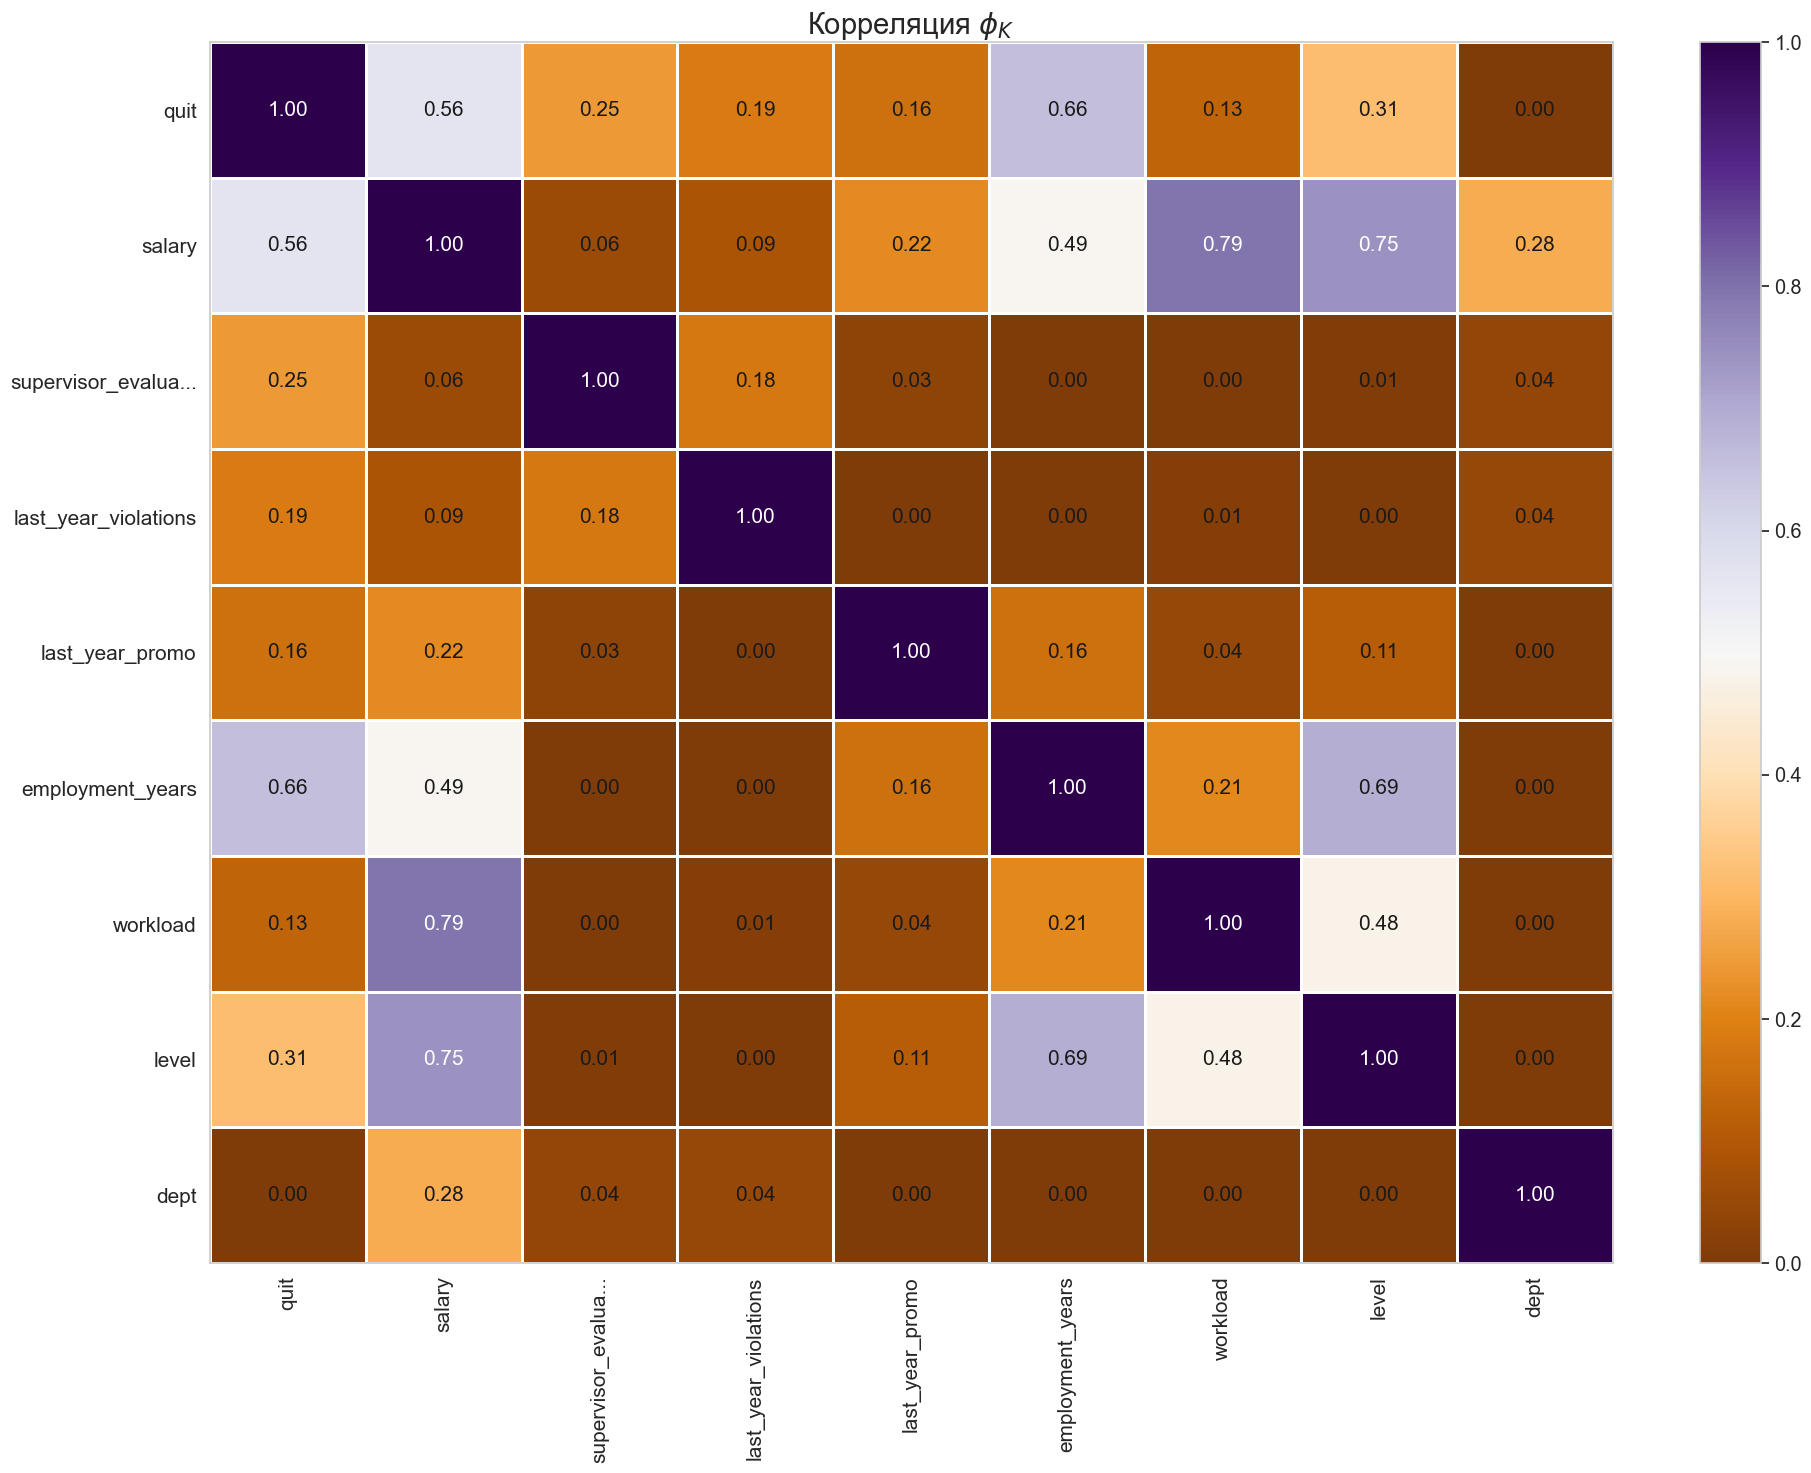

In [101]:
plot_correlation_matrix(
    corr_matrix_df_q.values,
    x_labels=corr_matrix_df_q.columns,
    y_labels=corr_matrix_df_q.index,
    vmin=0, vmax=1, color_map='PuOr', 
    title=r'Корреляция $\phi_K$',  
    fontsize_factor=1.5,  
    figsize=(20, 15)
)

Признаки из задачи №2 по зависимости распределены аналогично признакам из задачи №1: на

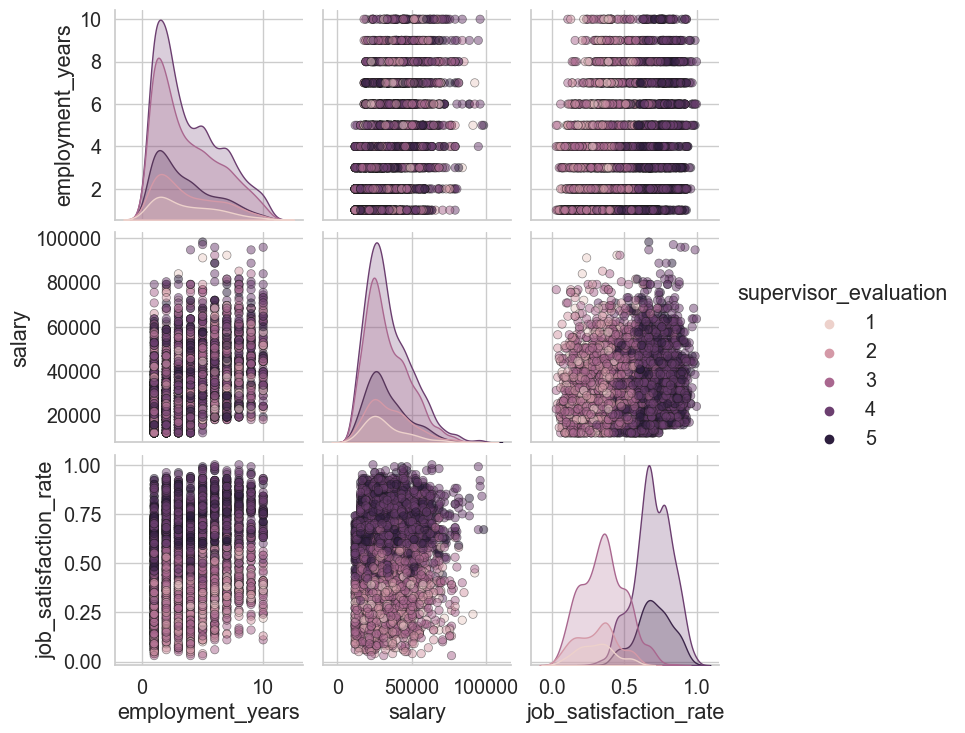

In [102]:
d_2 = df_train_quit[['employment_years','supervisor_evaluation','salary', 'quit']]
sns.pairplot(d, diag_kind = 'kde', hue = 'supervisor_evaluation', plot_kws={'alpha':0.5, 'edgecolor': 'k'})

Посмотрим распределение категориальных признаков

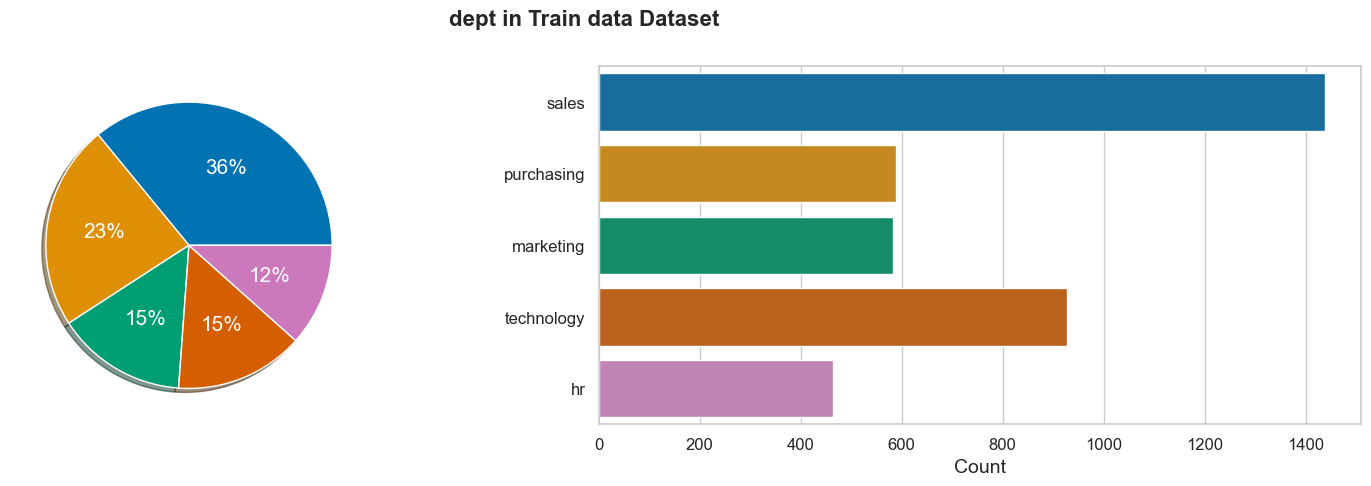

In [103]:
plot_feature(df_train_quit, 'dept', figsize=(16,5), palette='colorblind', name='Train data')


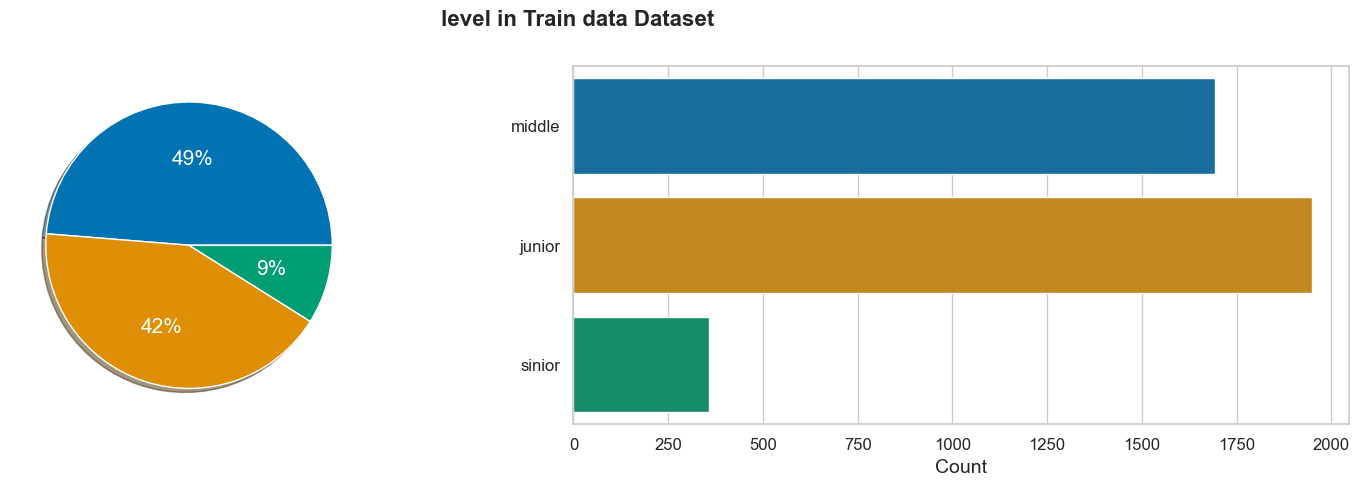

In [104]:
plot_feature(df_train_quit, 'level', figsize=(16,5), palette='colorblind', name='Train data')


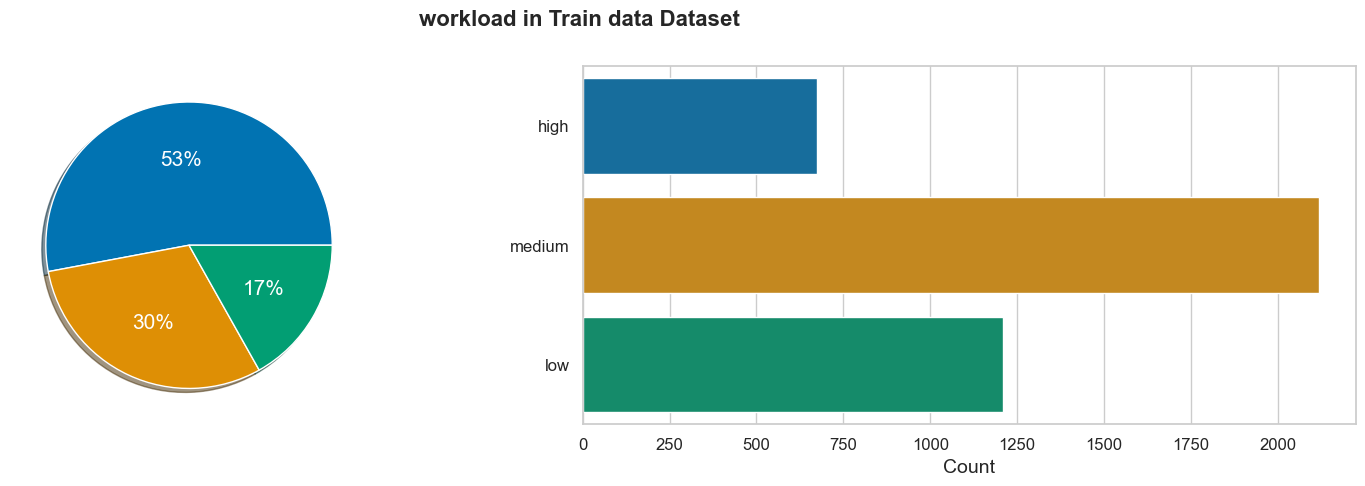

In [105]:
plot_feature(df_train_quit, 'workload', figsize=(16,5), palette='colorblind', name='Train data')


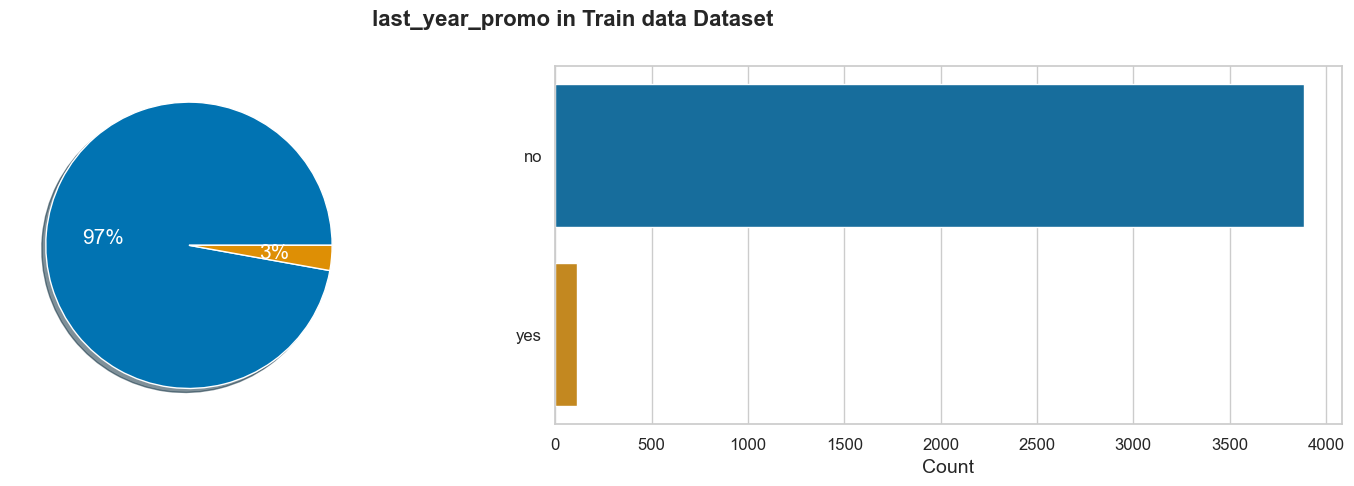

In [106]:
plot_feature(df_train_quit, 'last_year_promo', figsize=(16,5), palette='colorblind', name='Train data')


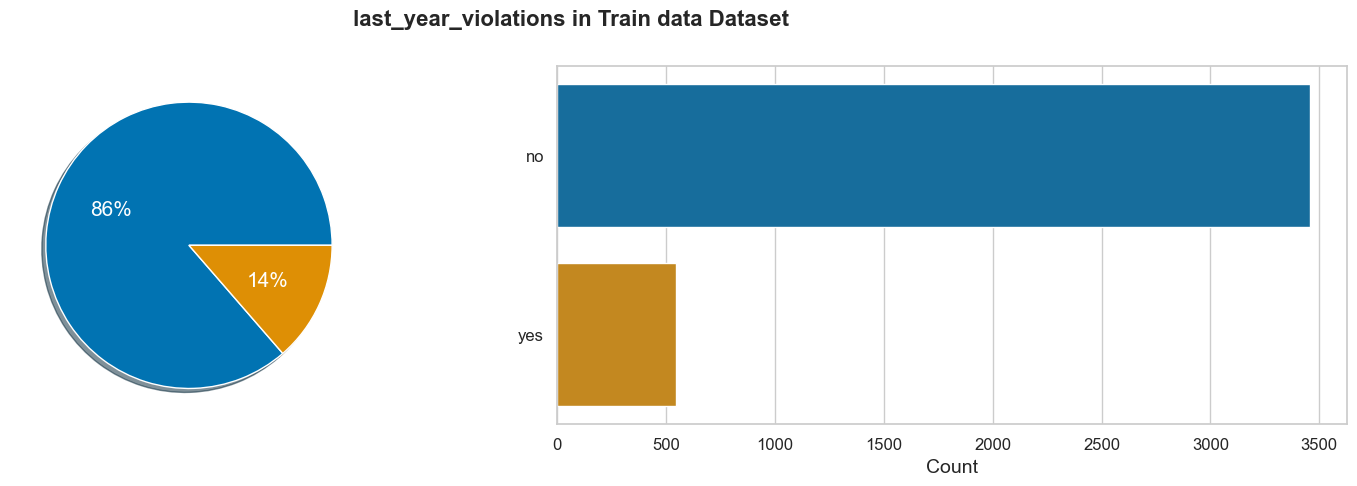

In [107]:
plot_feature(df_train_quit, 'last_year_violations', figsize=(16,5), palette='colorblind', name='Train data')


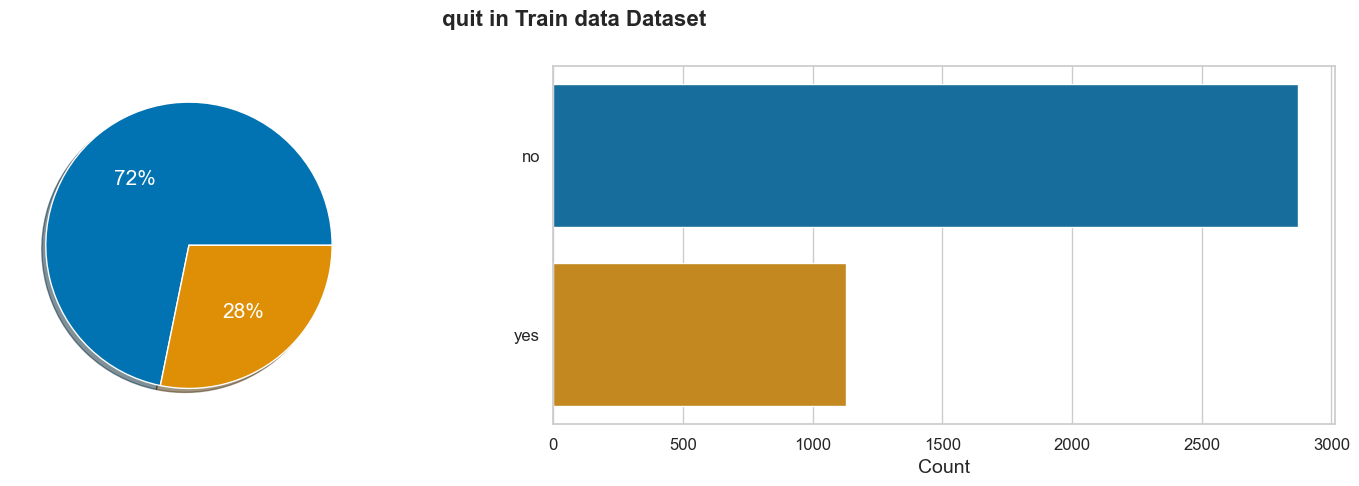

In [108]:
plot_feature(df_train_quit, 'quit', figsize=(16,5), palette='colorblind', name='Train data')

Сделаем срез сотрудников по признаку увольнения и проанализируем уволившихся сотрудников

In [109]:
df_train_quit_yes = df_train_quit[df_train_quit["quit"] == "yes"]
df_train_quit_no = df_train_quit[df_train_quit["quit"] == "no"]

На основании визуализаций распределения категориальных признаков составим портрет сотрудника по новым данным: это сотрудник отдела продаж, уровня junior, сильнозагруженного, малая доля получавших вознаграждение, иногда совершавшего нарушения. Всего количество уволившихся составило 28%.

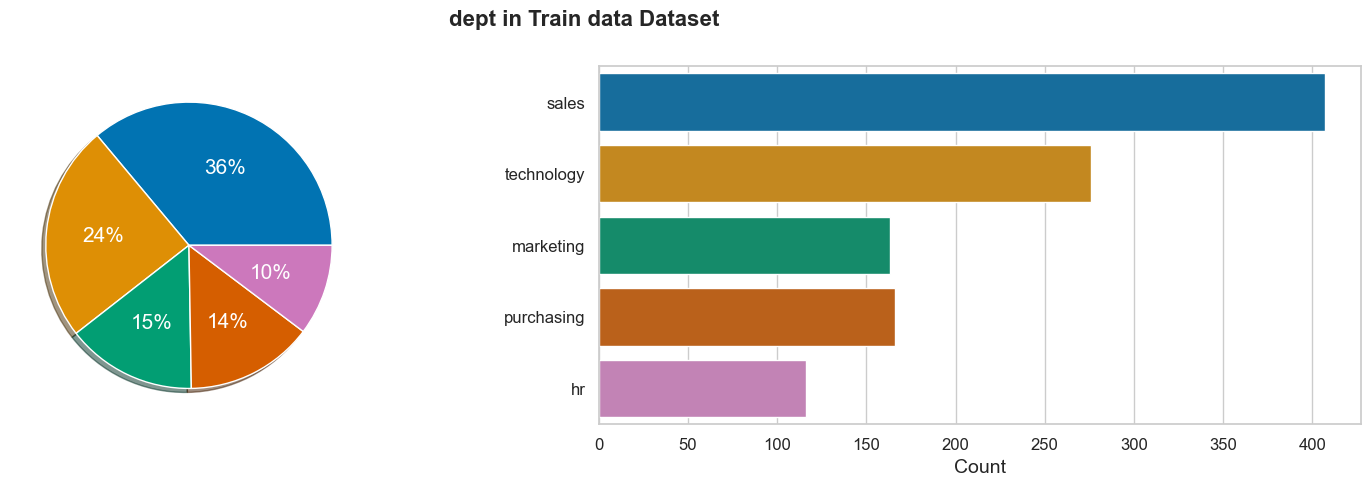

In [110]:
plot_feature(df_train_quit_yes, 'dept', figsize=(16,5), palette='colorblind', name='Train data')

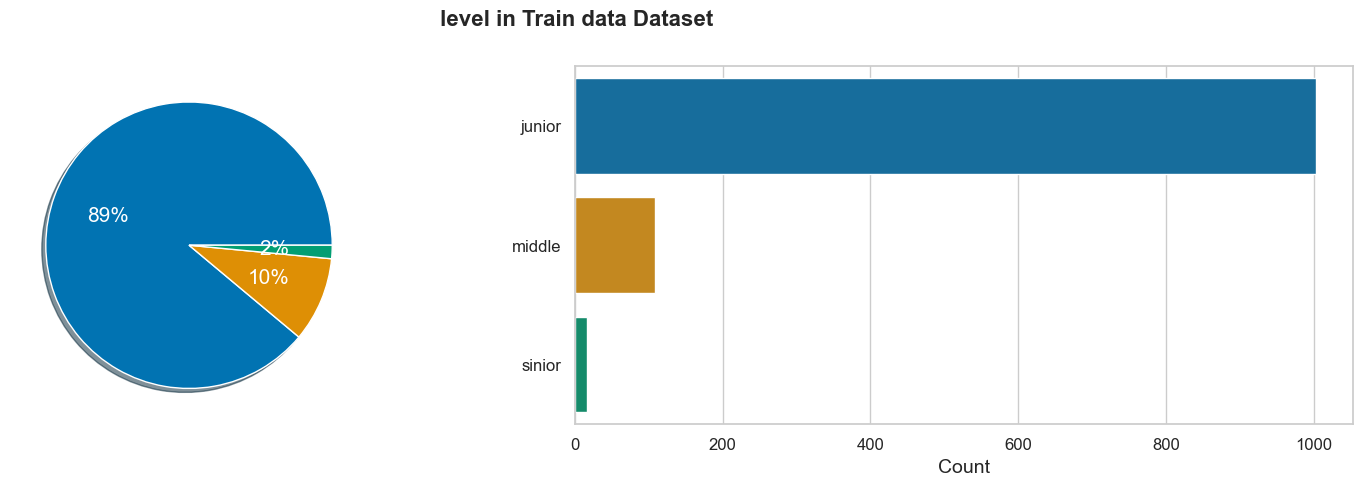

In [111]:
plot_feature(df_train_quit_yes, 'level', figsize=(16,5), palette='colorblind', name='Train data')

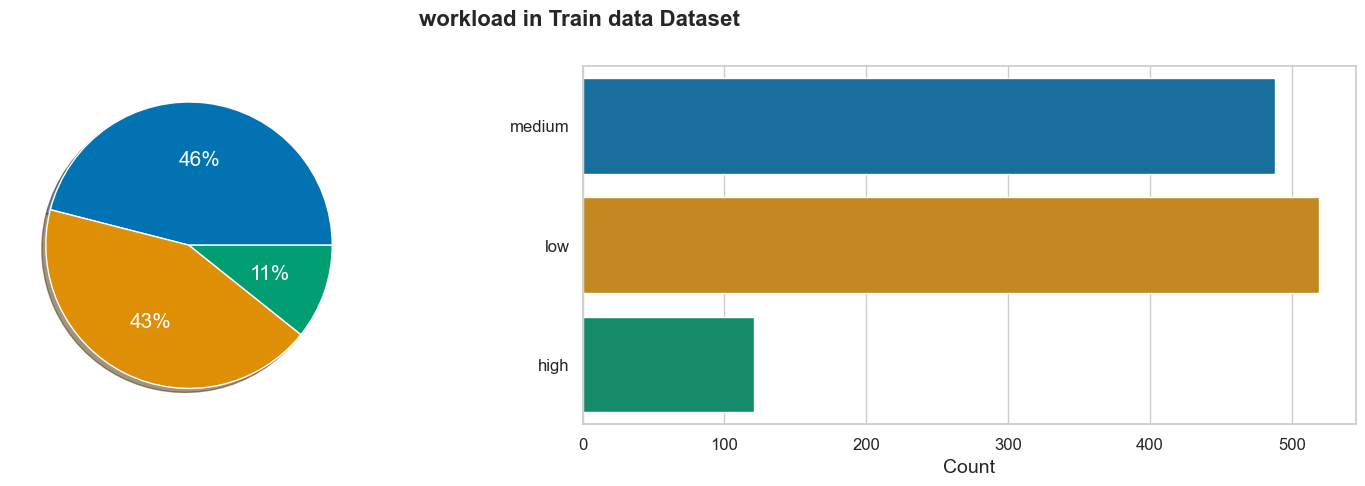

In [112]:
plot_feature(df_train_quit_yes, 'workload', figsize=(16,5), palette='colorblind', name='Train data')

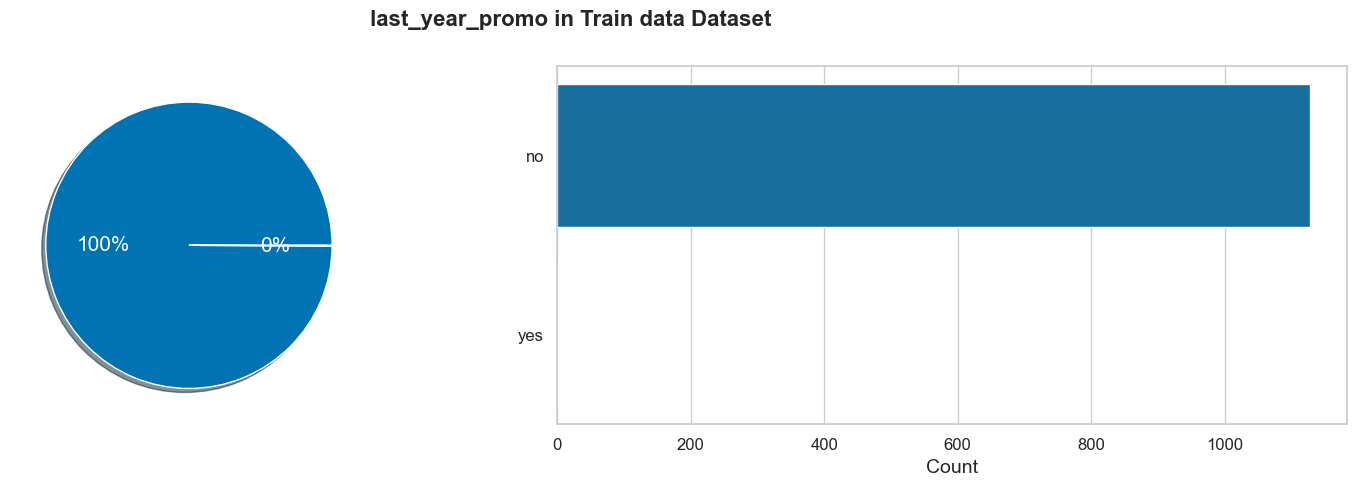

In [113]:
plot_feature(df_train_quit_yes, 'last_year_promo', figsize=(16,5), palette='colorblind', name='Train data')

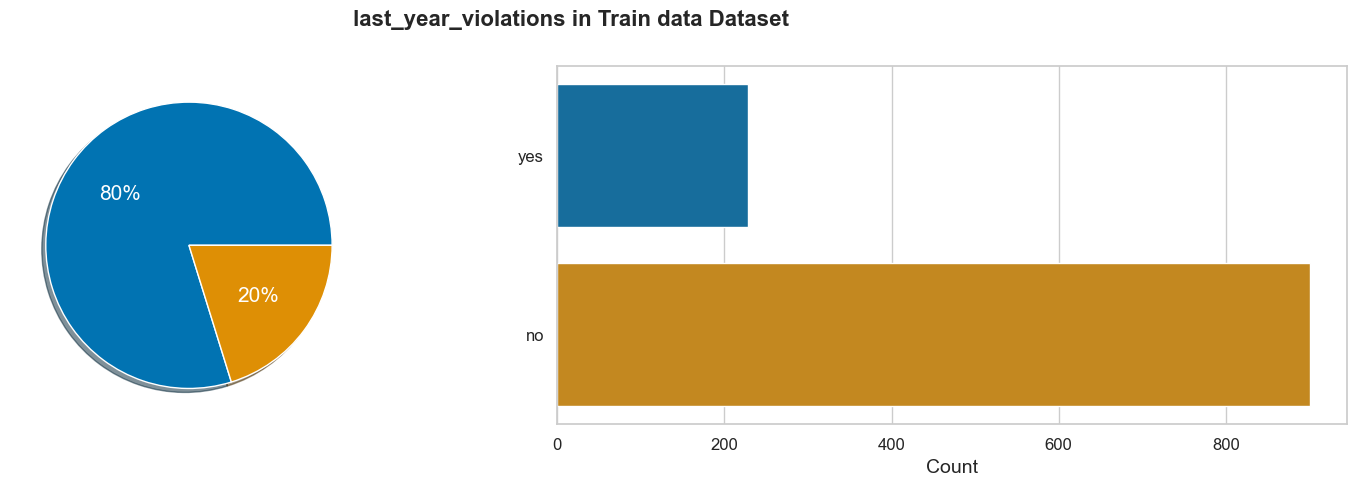

In [114]:
plot_feature(df_train_quit_yes, 'last_year_violations', figsize=(16,5), palette='colorblind', name='Train data')

На основании визуализаций распределения категориальных признаков составим портрет уволившегося сотрудника: это сотрудник отдела продаж, уровня junior, сильнозагруженного, не получавшего за последний год повышения, не совершавшего нарушений. Всего количество уволившихся составило 28%. Ниже проведем анализ по уволившимся сотрудникам по оставшимся признакам: уровень, заработной платы, оценка руководителя. 

Посмотрим имеется ли связь между двумя целевыми признаками: удовлетворенность работой и увольнением

In [115]:
df_test_target_quit = (df_test_target.merge(df_test_target_quit, on="id").reset_index(drop=True))

In [116]:
df_test_target_quit

id  job_satisfaction_rate quit
0     130604                   0.74   no
1     825977                   0.75   no
2     418490                   0.60  yes
3     555320                   0.72   no
4     826430                   0.08  yes
...      ...                    ...  ...
1995  405257                   0.28   no
1996  370925                   0.21  yes
1997  857722                   0.39   no
1998  303402                   0.26  yes
1999  648995                   0.62   no

[2000 rows x 3 columns]

Text(0.5, 1.0, 'Рапределение уволившихся сотрудников по признаку удовлетворенности работой (mean)')

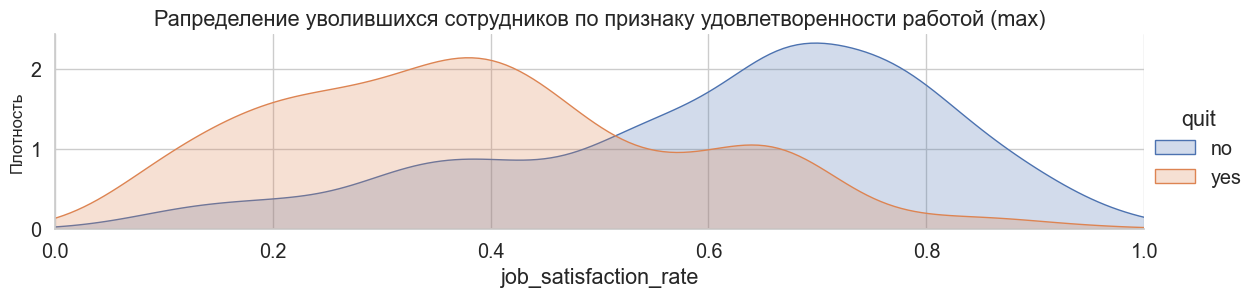

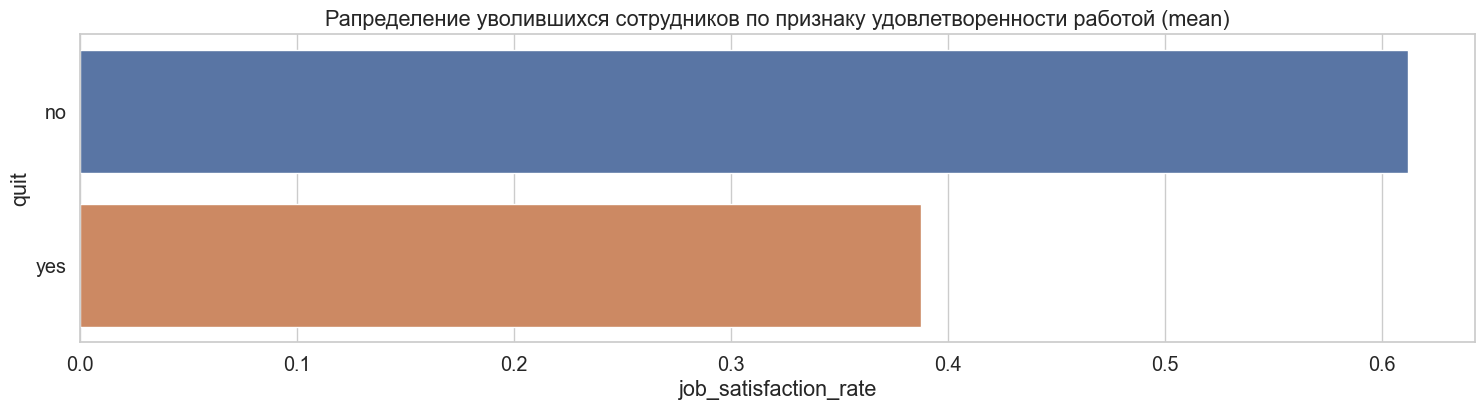

In [117]:
facet = sns.FacetGrid(df_test_target_quit, hue="quit",aspect=4)
facet.map(sns.kdeplot,'job_satisfaction_rate',shade= True)
facet.set(xlim=(0, df_test_target_quit['job_satisfaction_rate'].max()))
facet.add_legend()
plt.ylabel('Плотность', fontsize=12)
plt.title('Рапределение уволившихся сотрудников по признаку удовлетворенности работой (max)')
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = df_test_target_quit[["job_satisfaction_rate", "quit"]].groupby(['quit'],as_index=False).mean()
sns.barplot(x='job_satisfaction_rate', y='quit', data=average_age)
plt.title('Рапределение уволившихся сотрудников по признаку удовлетворенности работой (mean)')

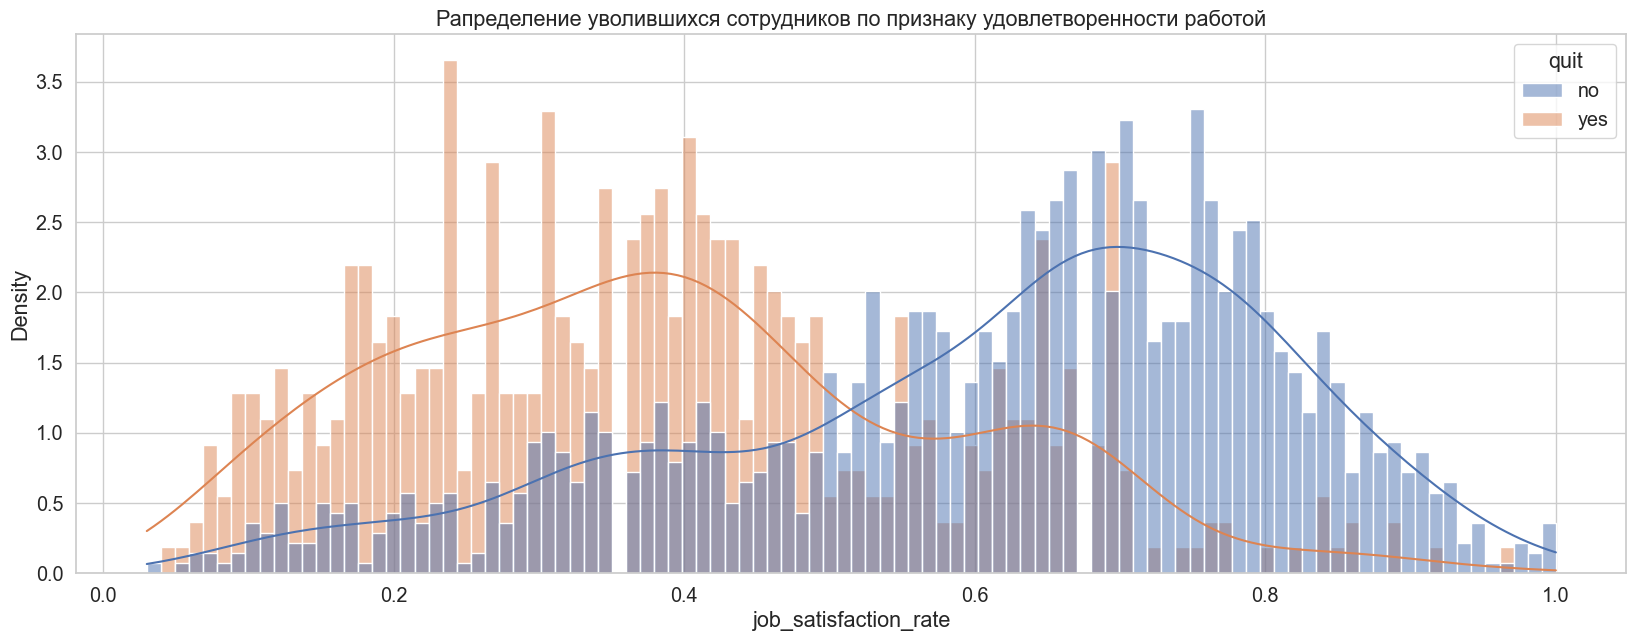

In [118]:
z = sns.histplot(x = 'job_satisfaction_rate', hue = 'quit', data = df_test_target_quit, stat='density', kde=True, common_norm=False, bins = 100);
#z.set_xlabel("job_satisfaction_rate")
plt.title('Рапределение уволившихся сотрудников по признаку удовлетворенности работой')
plt.show()


Приведенный график показывает, что между признаками удовлетворенность работой и увольнение прослеживается связь: большинство уволившихся имеют степень удовлетворенности работой <= 0.5. Прослеживается два пика, пик уволившихся приходится на уровень удовлетворенности работой 0.3-0.35, а пик неуволившихся на уровень job_satisfaction_rate 0.6-0.8. И еще один пик уволившихся сотрудников приходится на уровень удовлетворенности работой 0.68. Средний уровень удовлетворенности уволившегося сотрудника 0.38

###### Проведем статистический анализ признаков по признаку увольнения 

In [119]:
print("Количество строк  в 'df_train_quit_yes':", df_train_quit_yes['id'].count())
print("Количество строк  в 'df_train_quit_no':", df_train_quit_no['id'].count())
print()
print("Количество уникальных пользователей в 'df_train_quit_yes':", len(df_train_quit_yes['id'].unique()))
print("Количество уникальных пользователей в 'df_train_quit_yes':", len(df_train_quit_no['id'].unique()))

Количество строк  в 'df_train_quit_yes': 1128
Количество строк  в 'df_train_quit_no': 2872

Количество уникальных пользователей в 'df_train_quit_yes': 1128
Количество уникальных пользователей в 'df_train_quit_yes': 2872


Важно понять, была заработная плата уволившихся сотрудников меньше чем у оставшихся сотрудников

Проверим гипотезу:

H0: зарплата неуволившихся сотрудников = зарплата уволившихся сотрудников (нулевая гитпотеза)

H1: зарплата неуволившихся сотрудников > зарплата уволившихся сотрудников (нулевая гитпотеза)

alpha = 0.05

In [120]:
sub_good = df_train_quit_no['salary'] 

sub_bad = df_train_quit_yes['salary']

results = st.ttest_ind(sub_good, 
                       sub_bad,
                       alternative = 'greater')

alpha = 0.05

print('Средняя зарплата оставшегося сотрудника:', pd.Series(sub_good).mean())
print('Средняя зарплата уволившегося сотрудника:', pd.Series(sub_bad).mean())

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Средняя зарплата оставшегося сотрудника: 37702.22841225627
Средняя зарплата уволившегося сотрудника: 23885.106382978724
p-значение: 1.232068933994945e-162
Отвергаем нулевую гипотезу


Средняя заработная плата уволившегося сотрудника действительно меньше заработной платы оставшихся сотрудников

Важно понять, была оценка руководителя уволившихся сотрудников ниже чем у оставшихся сотрудников

Проверим гипотезу:

H0: оценка руководителя неуволившихся сотрудников = оценка руководителя уволившихся сотрудников (нулевая гитпотеза)

H1: оценка руководителя неуволившихся сотрудников > оценка руководителя уволившихся сотрудников (нулевая гитпотеза)

alpha = 0.05

In [121]:
sub_good_2 = df_train_quit_no['supervisor_evaluation'] 

sub_bad_2 = df_train_quit_yes['supervisor_evaluation']

results = st.ttest_ind(sub_good_2, 
                       sub_bad_2,
                       alternative = 'greater')

alpha = 0.05

print('Средняя оценка руководителя оставшегося сотрудника:', pd.Series(sub_good_2).mean())
print('Средняя оценка руководителя уволившегося сотрудника:', pd.Series(sub_bad_2).mean())

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Средняя оценка руководителя оставшегося сотрудника: 3.643105849582173
Средняя оценка руководителя уволившегося сотрудника: 3.0460992907801416
p-значение: 7.42906192784865e-67
Отвергаем нулевую гипотезу


Средняя оценка руководителя уволившегося сотрудника действительно меньше средней оценка руководителя оставшихся сотрудников

В дополнение к ранее сделанным выводам об уволившихся сотрудниках добавим, что статистический тест подтвердил наши выводы о том, что средняя заработная плата уволившихся сотрудников ниже чем у сотрудников оставшихся, как и оценка руководителя.

### <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong>Шаг 4. Добавление нового входного признака</strong></a><br>

Исходя из выводов о наличии связи между двумя целевыми признаками добавим признак удовлетворения работой, предсказанный по условиям первой задачи к входным признакам второй задачи.

In [122]:
df_train_quit

id        dept   level workload  employment_years last_year_promo  \
0     723290       sales  middle     high                 2              no   
1     814010       sales  junior   medium                 2              no   
2     155091  purchasing  middle   medium                 5              no   
3     257132       sales  junior   medium                 2              no   
4     910140   marketing  junior   medium                 2              no   
...      ...         ...     ...      ...               ...             ...   
3995  588809       sales  junior   medium                 4              no   
3996  672059       sales  middle     high                 9              no   
3997  536432  purchasing  junior      low                 2              no   
3998  692133  purchasing  middle   medium                 2              no   
3999  853842       sales  junior   medium                 2              no   

     last_year_violations  supervisor_evaluation  salary quit  
0                      no                      4   54000   no  
1                      no                      4   27600   no  
2                      no                      1   37200   no  
3                     yes                      3   24000  yes  
4                      no                      5   25200   no  
...                   ...                    ...     ...  ...  
3995                   no                      3   26400   no  
3996                   no                      4   52800   no  
3997                  yes                      4   12000  yes  
3998                   no                      4   33600   no  
3999                   no                      3   27600  yes  

[4000 rows x 10 columns]

In [123]:
df_train_quit_pr = df_train_quit.set_index('id')

In [124]:
df_train_quit_pr

dept   level workload  employment_years last_year_promo  \
id                                                                      
723290       sales  middle     high                 2              no   
814010       sales  junior   medium                 2              no   
155091  purchasing  middle   medium                 5              no   
257132       sales  junior   medium                 2              no   
910140   marketing  junior   medium                 2              no   
...            ...     ...      ...               ...             ...   
588809       sales  junior   medium                 4              no   
672059       sales  middle     high                 9              no   
536432  purchasing  junior      low                 2              no   
692133  purchasing  middle   medium                 2              no   
853842       sales  junior   medium                 2              no   

       last_year_violations  supervisor_evaluation  salary quit  
id                                                               
723290                   no                      4   54000   no  
814010                   no                      4   27600   no  
155091                   no                      1   37200   no  
257132                  yes                      3   24000  yes  
910140                   no                      5   25200   no  
...                     ...                    ...     ...  ...  
588809                   no                      3   26400   no  
672059                   no                      4   52800   no  
536432                  yes                      4   12000  yes  
692133                   no                      4   33600   no  
853842                   no                      3   27600  yes  

[4000 rows x 9 columns]

In [125]:
df_train_quit_pr_no = df_train_quit_pr.drop(columns=['quit'], axis=1)

In [126]:
df_train_quit_pr_no

dept   level workload  employment_years last_year_promo  \
id                                                                      
723290       sales  middle     high                 2              no   
814010       sales  junior   medium                 2              no   
155091  purchasing  middle   medium                 5              no   
257132       sales  junior   medium                 2              no   
910140   marketing  junior   medium                 2              no   
...            ...     ...      ...               ...             ...   
588809       sales  junior   medium                 4              no   
672059       sales  middle     high                 9              no   
536432  purchasing  junior      low                 2              no   
692133  purchasing  middle   medium                 2              no   
853842       sales  junior   medium                 2              no   

       last_year_violations  supervisor_evaluation  salary  
id                                                          
723290                   no                      4   54000  
814010                   no                      4   27600  
155091                   no                      1   37200  
257132                  yes                      3   24000  
910140                   no                      5   25200  
...                     ...                    ...     ...  
588809                   no                      3   26400  
672059                   no                      4   52800  
536432                  yes                      4   12000  
692133                   no                      4   33600  
853842                   no                      3   27600  

[4000 rows x 8 columns]

In [127]:
y_test_pred_2 = grid.predict(df_train_quit_pr_no)

In [128]:
df_job = pd.DataFrame({'Pred_job': y_test_pred_2}) 
df_job

Pred_job
0         0.65
1         0.88
2         0.38
3         0.38
4         0.69
...        ...
3995      0.55
3996      0.86
3997      0.55
3998      0.55
3999      0.52

[4000 rows x 1 columns]

In [129]:
df_train_quit_pr['job_satisfaction_rate'] = y_test_pred_2

In [130]:
df_train_quit_pr

dept   level workload  employment_years last_year_promo  \
id                                                                      
723290       sales  middle     high                 2              no   
814010       sales  junior   medium                 2              no   
155091  purchasing  middle   medium                 5              no   
257132       sales  junior   medium                 2              no   
910140   marketing  junior   medium                 2              no   
...            ...     ...      ...               ...             ...   
588809       sales  junior   medium                 4              no   
672059       sales  middle     high                 9              no   
536432  purchasing  junior      low                 2              no   
692133  purchasing  middle   medium                 2              no   
853842       sales  junior   medium                 2              no   

       last_year_violations  supervisor_evaluation  salary quit  \
id                                                                
723290                   no                      4   54000   no   
814010                   no                      4   27600   no   
155091                   no                      1   37200   no   
257132                  yes                      3   24000  yes   
910140                   no                      5   25200   no   
...                     ...                    ...     ...  ...   
588809                   no                      3   26400   no   
672059                   no                      4   52800   no   
536432                  yes                      4   12000  yes   
692133                   no                      4   33600   no   
853842                   no                      3   27600  yes   

        job_satisfaction_rate  
id                             
723290                   0.65  
814010                   0.88  
155091                   0.38  
257132                   0.38  
910140                   0.69  
...                       ...  
588809                   0.55  
672059                   0.86  
536432                   0.55  
692133                   0.55  
853842                   0.52  

[4000 rows x 10 columns]

In [131]:
df_test_features

id        dept   level workload  employment_years last_year_promo  \
0     485046   marketing  junior   medium                 2              no   
1     686555          hr  junior   medium                 1              no   
2     467458       sales  middle      low                 5              no   
3     418655       sales  middle      low                 6              no   
4     789145          hr  middle   medium                 5              no   
...      ...         ...     ...      ...               ...             ...   
1995  393147   marketing  junior      low                 3              no   
1996  109582  technology  middle      low                 3              no   
1997  305653  technology  junior      low                 1              no   
1998  160233  technology  middle      low                 8              no   
1999  771859  purchasing  middle   medium                 1              no   

     last_year_violations  supervisor_evaluation  salary  
0                      no                      5   28800  
1                      no                      4   30000  
2                      no                      4   19200  
3                      no                      4   19200  
4                      no                      5   40800  
...                   ...                    ...     ...  
1995                   no                      3   20400  
1996                   no                      2   21600  
1997                   no                      3   14400  
1998                   no                      1   32400  
1999                   no                      4   38400  

[2000 rows x 9 columns]

In [132]:
df_test_features_job = df_test_features.set_index('id')

In [133]:
y_test_pred_2_test = grid.predict(df_test_features_job)

In [134]:
df_test_features_job['job_satisfaction_rate'] = y_test_pred_2_test

In [135]:
df_test_features_job

dept   level workload  employment_years last_year_promo  \
id                                                                      
485046   marketing  junior   medium                 2              no   
686555          hr  junior   medium                 1              no   
467458       sales  middle      low                 5              no   
418655       sales  middle      low                 6              no   
789145          hr  middle   medium                 5              no   
...            ...     ...      ...               ...             ...   
393147   marketing  junior      low                 3              no   
109582  technology  middle      low                 3              no   
305653  technology  junior      low                 1              no   
160233  technology  middle      low                 8              no   
771859  purchasing  middle   medium                 1              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
485046                   no                      5   28800   
686555                   no                      4   30000   
467458                   no                      4   19200   
418655                   no                      4   19200   
789145                   no                      5   40800   
...                     ...                    ...     ...   
393147                   no                      3   20400   
109582                   no                      2   21600   
305653                   no                      3   14400   
160233                   no                      1   32400   
771859                   no                      4   38400   

        job_satisfaction_rate  
id                             
485046                   0.87  
686555                   0.68  
467458                   0.65  
418655                   0.66  
789145                   0.76  
...                       ...  
393147                   0.50  
109582                   0.13  
305653                   0.24  
160233                   0.55  
771859                   0.66  

[2000 rows x 9 columns]

Во входные данные добавлен новый признак: предсказанное с помощью первой модели значение удовлетворенности работой.

In [136]:
duplicateRows_train = df_train_quit_pr[df_train_quit_pr.duplicated ()]

In [137]:
df_train_quit_pr = df_train_quit_pr.drop_duplicates (keep= False)


In [138]:
df_train_quit_pr.describe(include='all')

dept   level workload  employment_years last_year_promo  \
count    1934    1934     1934           1934.00            1934   
unique      5       3        3               NaN               2   
top     sales  middle   medium               NaN              no   
freq      567    1015      872               NaN            1825   
mean      NaN     NaN      NaN              4.50             NaN   
std       NaN     NaN      NaN              2.63             NaN   
min       NaN     NaN      NaN              1.00             NaN   
25%       NaN     NaN      NaN              2.00             NaN   
50%       NaN     NaN      NaN              4.00             NaN   
75%       NaN     NaN      NaN              6.00             NaN   
max       NaN     NaN      NaN             10.00             NaN   

       last_year_violations  supervisor_evaluation   salary  quit  \
count                  1934                1934.00  1934.00  1934   
unique                    2                    NaN      NaN     2   
top                      no                    NaN      NaN    no   
freq                   1512                    NaN      NaN  1479   
mean                    NaN                   3.30 39528.65   NaN   
std                     NaN                   1.12 16835.26   NaN   
min                     NaN                   1.00 12000.00   NaN   
25%                     NaN                   3.00 25500.00   NaN   
50%                     NaN                   3.00 37200.00   NaN   
75%                     NaN                   4.00 50400.00   NaN   
max                     NaN                   5.00 96000.00   NaN   

        job_satisfaction_rate  
count                 1934.00  
unique                    NaN  
top                       NaN  
freq                      NaN  
mean                     0.50  
std                      0.23  
min                      0.03  
25%                      0.33  
50%                      0.50  
75%                      0.69  
max                      1.00

In [139]:
df_train_quit_pr['workload'].unique()

array(['medium', 'low', 'high'], dtype=object)

Для исследования датафрейма после добавления нового признака сделаем копию и переведем некоторые категориальные признаки в числовые

In [140]:
df=df_train_quit_pr.copy()

In [141]:
df['level']=df['level'].replace('junior','0')
df['level']=df['level'].replace('middle','1')
df['level']=df['level'].replace('sinior','2')
df['workload']=df['workload'].replace('medium','0')
df['workload']=df['workload'].replace('low','1')
df['workload']=df['workload'].replace('high','2')



df=df.replace('no','0')
df= df.replace('yes','1')


df

dept level workload  employment_years last_year_promo  \
id                                                                    
910140   marketing     0        0                 2               0   
699916       sales     0        1                 1               0   
417070  technology     1        0                 8               0   
165489       sales     1        1                 4               0   
613206  technology     1        0                 2               0   
...            ...   ...      ...               ...             ...   
778735  technology     0        1                 2               0   
106936   marketing     0        1                 1               0   
775320  technology     0        2                 1               0   
536432  purchasing     0        1                 2               0   
692133  purchasing     1        0                 2               0   

       last_year_violations  supervisor_evaluation  salary quit  \
id                                                                
910140                    0                      5   25200    0   
699916                    1                      3   18000    1   
417070                    0                      2   44400    0   
165489                    0                      5   19200    0   
613206                    0                      3   45600    1   
...                     ...                    ...     ...  ...   
778735                    0                      4   22800    1   
106936                    0                      5   18000    0   
775320                    0                      4   42000    1   
536432                    1                      4   12000    1   
692133                    0                      4   33600    0   

        job_satisfaction_rate  
id                             
910140                   0.69  
699916                   0.18  
417070                   0.40  
165489                   0.47  
613206                   0.31  
...                       ...  
778735                   0.84  
106936                   0.86  
775320                   0.54  
536432                   0.55  
692133                   0.55  

[1934 rows x 10 columns]

In [142]:
df.isnull().sum()

dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
job_satisfaction_rate    0
dtype: int64

In [143]:
df.dtypes

dept                      object
level                     object
workload                  object
employment_years            int8
last_year_promo           object
last_year_violations      object
supervisor_evaluation       int8
salary                     int32
quit                      object
job_satisfaction_rate    float64
dtype: object

###### После удаления пропусков из получившегося датафрейма посмотрим как влияет таргет на признаки

<Figure size 2000x700 with 0 Axes>

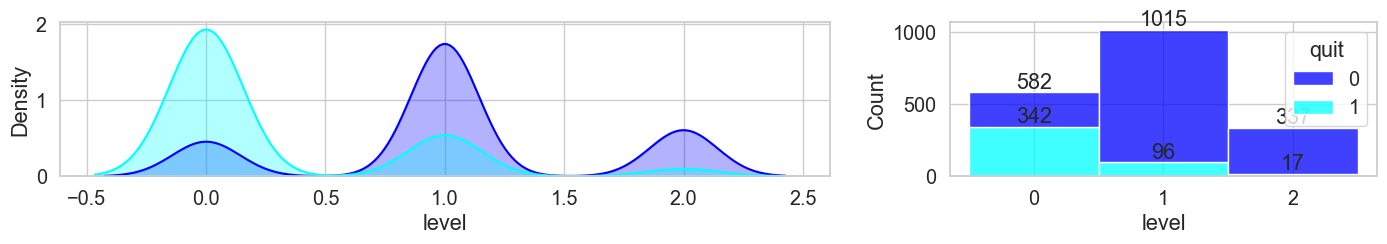

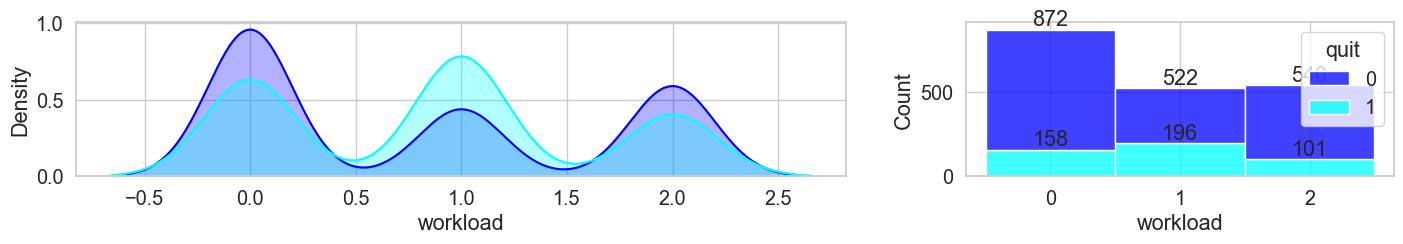

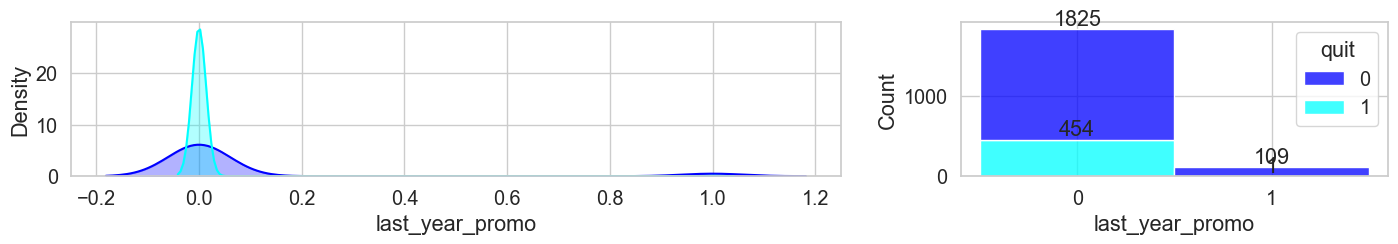

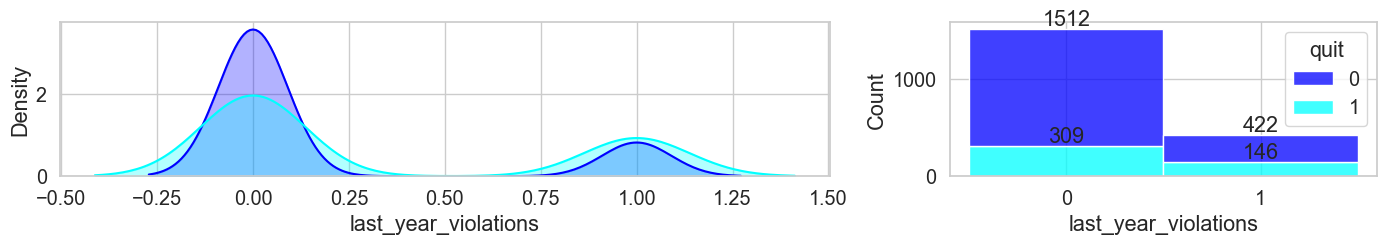

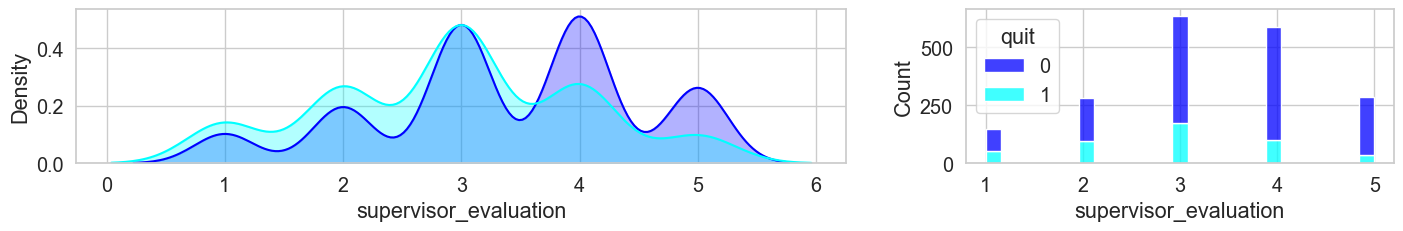

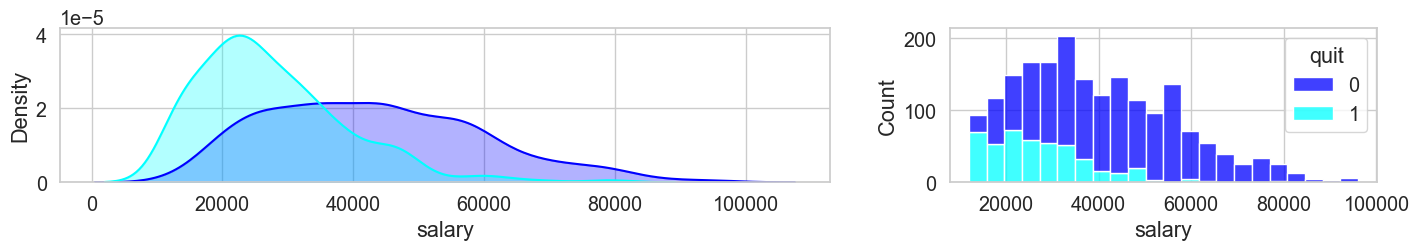

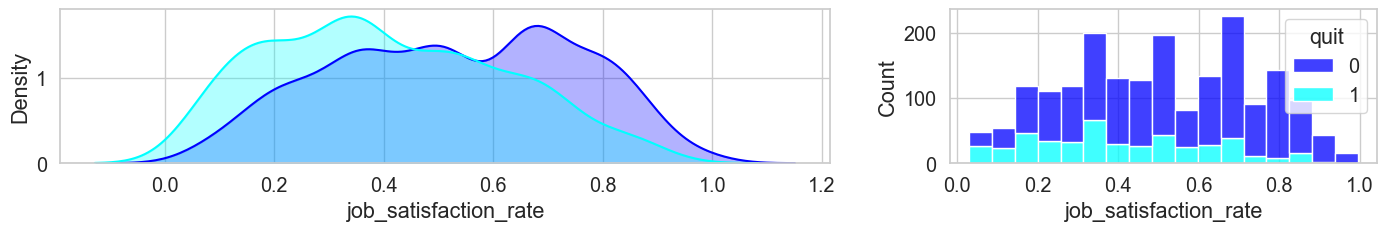

In [144]:
colors = [ 'Blue',  'Cyan',"navy",'LightCyan',]
CustomPalette = sns.set_palette(sns.color_palette(colors))

dfcolumns=[ 'dept', 'level', 'workload', 'last_year_promo',
       'last_year_violations', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

plt.subplots_adjust(left=0.3, bottom=0.1, right=0.9, top=0.7, wspace=0.2, hspace=0.3)

for i, col1 in enumerate(dfcolumns):
    if col1=="dept":
        continue
    else:
    #for j, col2 in enumerate(numericaldf):
        fig , axes= plt.subplots(1,2, figsize=(17,2),gridspec_kw={'width_ratios': [2.25, 1.25]})

        ax=plt.subplot(1,2,1 )
        ax0=sns.distplot(df[col1][df['quit']=="0"],hist=False, kde=True,label='quit = No' )
        ax1=sns.distplot(df[col1][df['quit']=="1"],hist=False, kde=True , ax=ax0, label='quit= Yes')

        # Get the two lines from the axes to generate shading
        l1 = ax.lines[0]
        l2 = ax.lines[1]

        # Get the xy data from the lines so that we can shade
        x1 = l1.get_xydata()[:,0]
        y1 = l1.get_xydata()[:,1]
        x2 = l2.get_xydata()[:,0]
        y2 = l2.get_xydata()[:,1]
        ax.fill_between(x1,y1, color="blue", alpha=0.3)
        ax.fill_between(x2,y2, color="aqua", alpha=0.3)




        #plt.legend(loc='upper right')


        ax=plt.subplot(1,2,2)
        ax2=sns.histplot(data=df, x=df[col1], hue=df['quit'], multiple="stack")
        for container in ax.containers:
            if col1=="supervisor_evaluation":
                continue
            elif col1== "salary":
                continue
            elif col1== "job_satisfaction_rate":
                continue
            else:
                ax.bar_label(container)



plt.show()

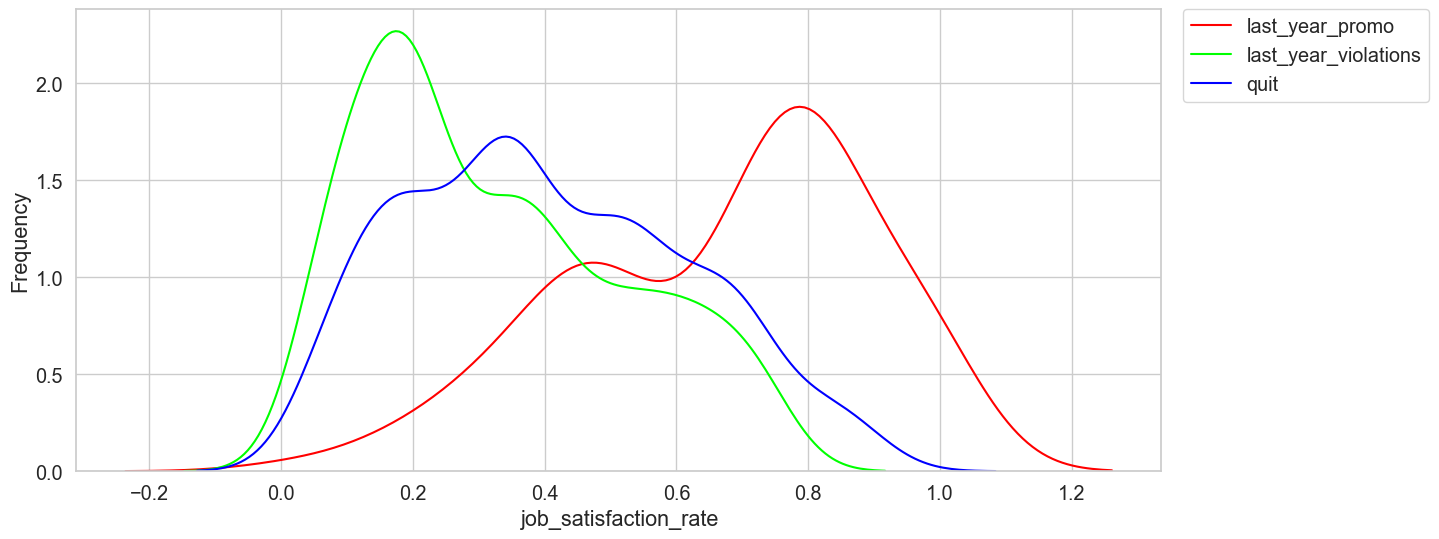

In [145]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(df[df["last_year_promo"]=='1']["job_satisfaction_rate"], alpha=1,shade = False,color="#FF0000" , label="last_year_promo", ax = ax)
sns.kdeplot(df[df["last_year_violations"]=='1']["job_satisfaction_rate"], alpha=1,shade = False,color="#00FF00" ,  label="last_year_violations", ax = ax)
sns.kdeplot(df[df["quit"]=='1']["job_satisfaction_rate"], alpha=1,shade = False,color="#0000FF" ,  label="quit", ax = ax)



ax.set_xlabel("job_satisfaction_rate")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

In [146]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)


col = list(df.columns)
categorical_features = []
numerical_features = []
for i in df1.columns:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        df1[i]=le.fit_transform(df1[i])
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : dept level workload last_year_promo last_year_violations supervisor_evaluation quit
Numerical Features : employment_years salary job_satisfaction_rate


In [147]:
df_orginal=df_train_quit_pr

In [148]:
df_train_quit_pr['dept'].unique()

array(['marketing', 'sales', 'technology', 'hr', 'purchasing'],
      dtype=object)

In [149]:
color_ye=['Blue',  'Cyan',"navy",'LightCyan','#17becf','#6495ED']
CustomPalette_ye = sns.set_palette(sns.color_palette(color_ye))

color_no=["red","LightSalmon","orange","yellow",'#8B0000','#FFA07A']
CustomPalette_ye = sns.set_palette(sns.color_palette(color_no))


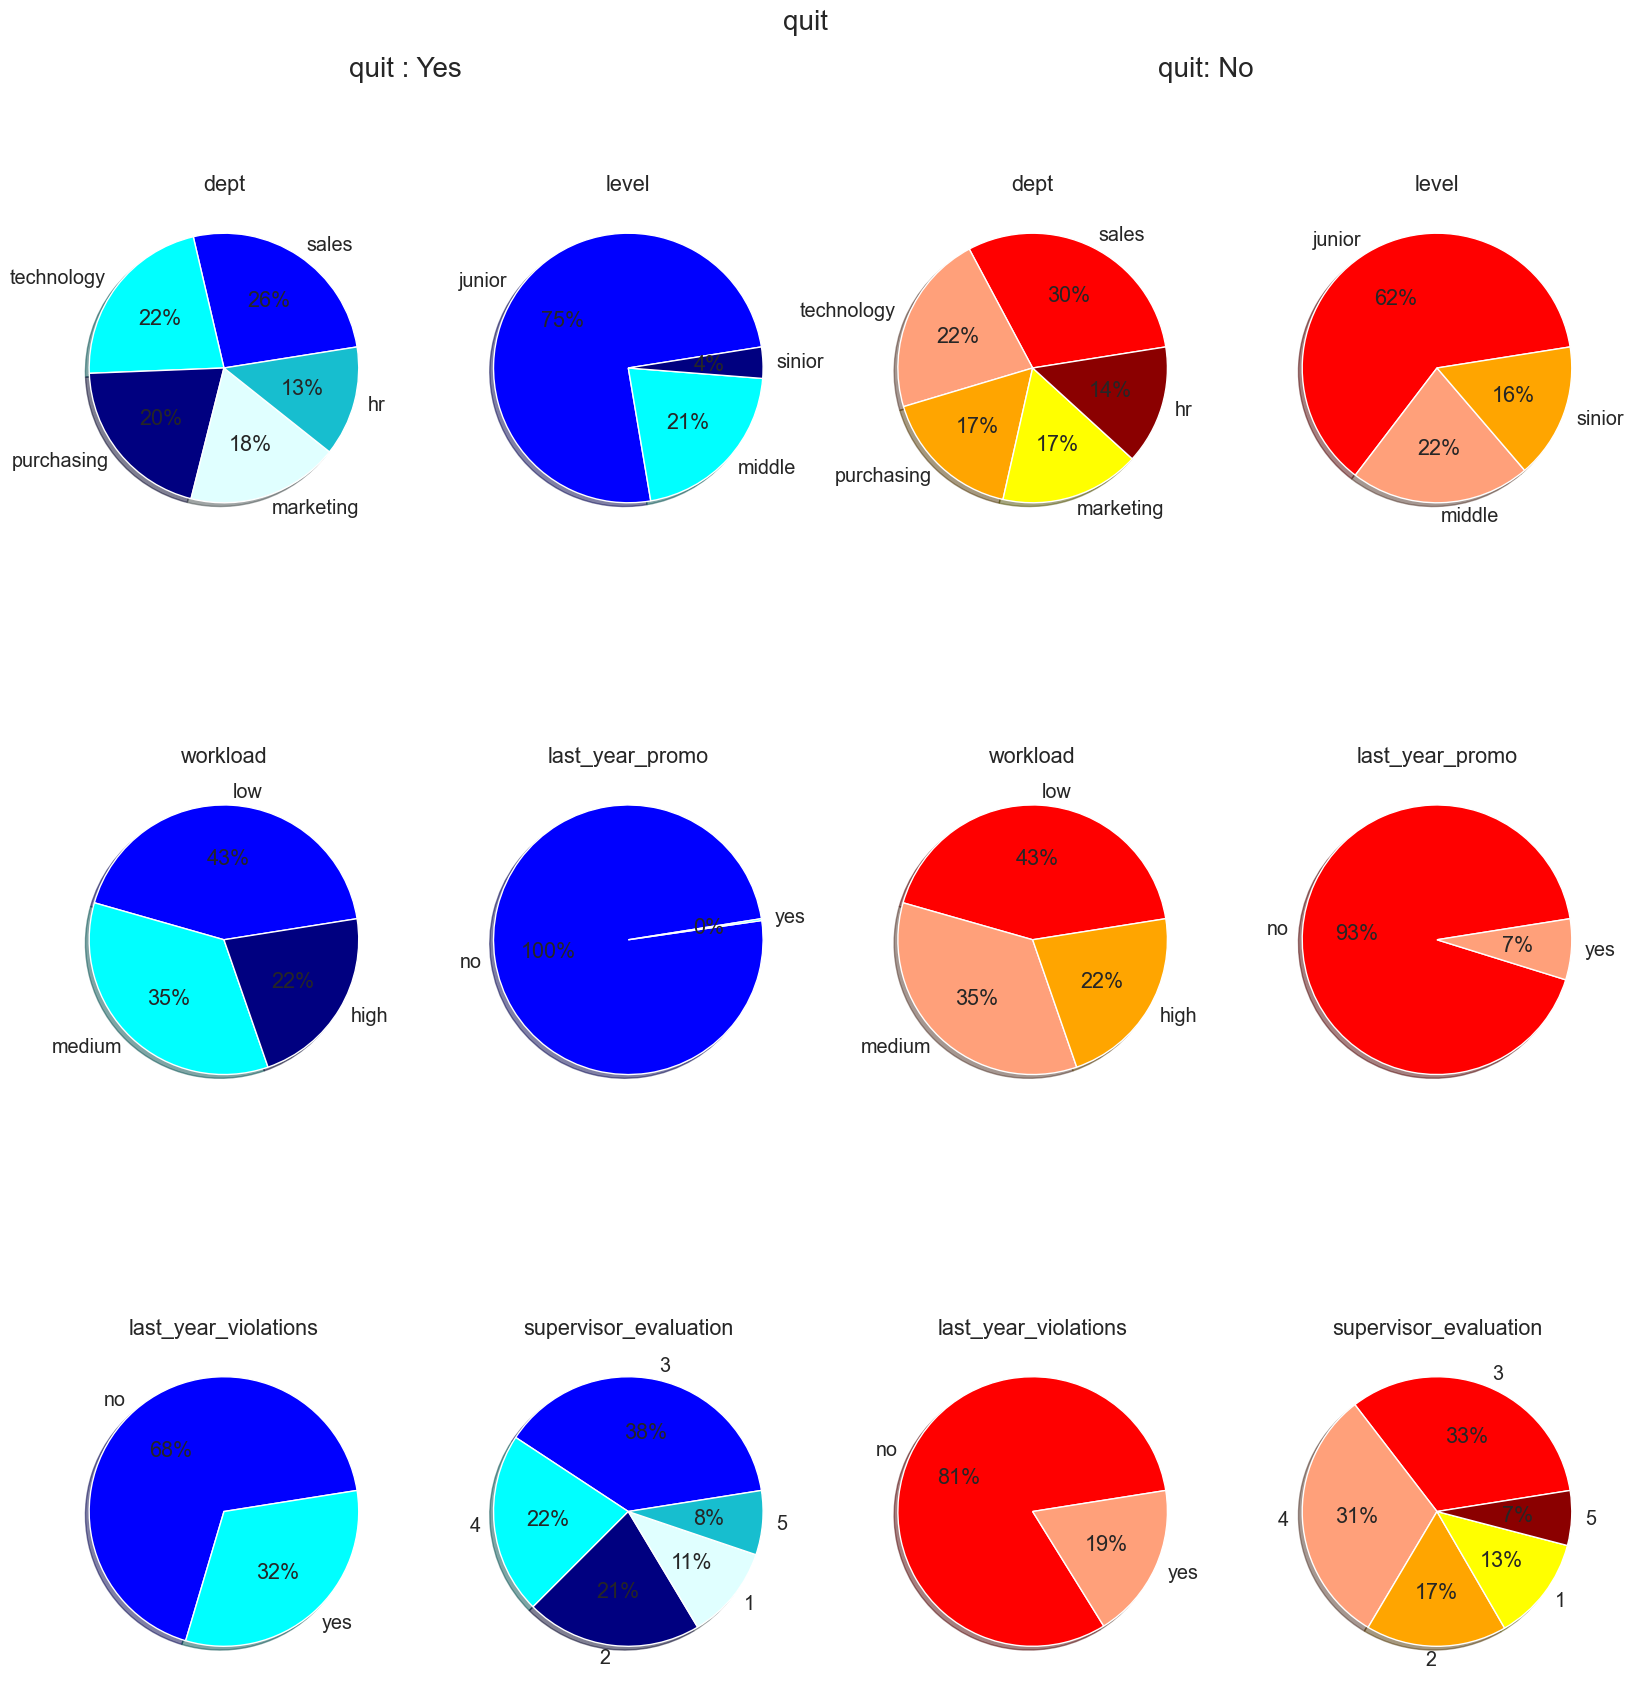

In [150]:
dept = df_orginal[df_orginal['quit'] == "yes"]['dept'].value_counts()

labels_dept = df_orginal[df_orginal['quit'] == "yes"]['dept'].value_counts().index

level = df_orginal[df_orginal['quit'] == "yes"]['level'].value_counts()

labels_level = df_orginal[df_orginal['quit'] == "yes"]['level'].value_counts().index

workload  = df_orginal[df_orginal['quit'] == "yes"]['workload'].value_counts()

labels_workload = df_orginal[df_orginal['quit'] == "yes"]['workload'].value_counts().index

last_year_promo  = df_orginal[df_orginal['quit'] == "yes"]['last_year_promo'].value_counts()

labels_last_year_promo = df_orginal[df_orginal['quit'] == "yes"]['last_year_promo'].value_counts().index

last_year_violations  = df_orginal[df_orginal['quit'] == "yes"]['last_year_violations'].value_counts()

labels_last_year_violations = df_orginal[df_orginal['quit'] == "yes"]['last_year_violations'].value_counts().index

supervisor_evaluation  =df_orginal[df_orginal['quit'] == "yes"]['supervisor_evaluation'].value_counts()

labels_supervisor_evaluation = df_orginal[df_orginal['quit'] == "yes"]['supervisor_evaluation'].value_counts().index
###########


deptn = df_orginal[df_orginal['quit'] == "no"]['dept'].value_counts()

labels_dept = df_orginal[df_orginal['quit'] == "yes"]['dept'].value_counts().index

leveln = df_orginal[df_orginal['quit'] == "no"]['level'].value_counts()

labels_level = df_orginal[df_orginal['quit'] == "yes"]['level'].value_counts().index

workloadn  = df_orginal[df_orginal['quit'] == "no"]['workload'].value_counts()

labels_workload = df_orginal[df_orginal['quit'] == "yes"]['workload'].value_counts().index

last_year_promon  = df_orginal[df_orginal['quit'] == "no"]['last_year_promo'].value_counts()

labels_last_year_promo = df_orginal[df_orginal['quit'] == "yes"]['last_year_promo'].value_counts().index

last_year_violationsn  = df_orginal[df_orginal['quit'] == "no"]['last_year_violations'].value_counts()

labels_last_year_violations = df_orginal[df_orginal['quit'] == "yes"]['last_year_violations'].value_counts().index

supervisor_evaluationn  =df_orginal[df_orginal['quit'] == "no"]['supervisor_evaluation'].value_counts()

labels_supervisor_evaluation = df_orginal[df_orginal['quit'] == "yes"]['supervisor_evaluation'].value_counts().index


#########


ax,fig = plt.subplots(nrows = 3,ncols = 4,figsize = (20,20))


plt.subplot(3,4,1)
plt.pie(dept,labels =labels_dept,colors = color_ye, rotatelabels=False, autopct='%1.f%%',shadow=True, startangle=9)
plt.title('dept');
plt.subplot(3,4,2)
plt.pie(level,labels = labels_level,colors = color_ye, rotatelabels=False, autopct='%1.f%%',shadow=True, startangle=9)
plt.title('level');

plt.subplot(3,4,3)
plt.pie(deptn,labels = labels_dept,colors = color_no,rotatelabels=False, autopct='%1.f%%',shadow=True, startangle=9)
plt.title('dept');
plt.subplot(3,4,4)
plt.pie(leveln,labels =labels_level,colors = color_no,rotatelabels=False, autopct='%1.f%%',shadow=True, startangle=9)
plt.title('level');


plt.subplot(3,4,5)
plt.pie(workload,labels =labels_workload,colors = color_ye, rotatelabels=False, autopct='%1.f%%',shadow=True, startangle=9)
plt.title('workload');
plt.subplot(3,4,6)
plt.pie(last_year_promo,labels = labels_last_year_promo,colors = color_ye, rotatelabels=False, autopct='%1.f%%',shadow=True, startangle=9)
plt.title('last_year_promo');

plt.subplot(3,4,7)
plt.pie(workload,labels =labels_workload,colors = color_no, rotatelabels=False, autopct='%1.f%%',shadow=True, startangle=9)
plt.title('workload');
plt.subplot(3,4,8)
plt.pie(last_year_promon,labels = labels_last_year_promo,colors = color_no, rotatelabels=False, autopct='%1.f%%',shadow=True, startangle=9)
plt.title('last_year_promo');


plt.subplot(3,4,9)
plt.pie(last_year_violations,labels = labels_last_year_violations,colors = color_ye,rotatelabels=False, autopct='%1.f%%',shadow=True, startangle=9)
plt.title('last_year_violations');
plt.subplot(3,4,10)
plt.pie(supervisor_evaluation,labels = labels_supervisor_evaluation,colors = color_ye,rotatelabels=False, autopct='%1.f%%',shadow=True, startangle=9)
plt.title('supervisor_evaluation');

plt.subplot(3,4,11)
plt.pie(last_year_violationsn,labels = labels_last_year_violations,colors = color_no,rotatelabels=False, autopct='%1.f%%',shadow=True, startangle=9)
plt.title('last_year_violations');
plt.subplot(3,4,12)
plt.pie(supervisor_evaluationn,labels = labels_supervisor_evaluation,colors = color_no,rotatelabels=False, autopct='%1.f%%',shadow=True, startangle=9)
plt.title('supervisor_evaluation');




plt.figtext(0.3,0.95,"quit : Yes", va="center", ha="center", size=20)
plt.figtext(0.7,0.95,"quit: No", va="center", ha="center", size=20)



plt.suptitle('quit',fontsize=20)
plt.subplots_adjust(top=0.92)

plt.show()





###### Выводы:

* По уровню квалификации среди уволившихся преобладают сотрудники уровня junior, таких сотрудников 75% среди уволившихся.
* По уровню загруженности уволившиеся сотрудники имели загруженность уровня low в 43% случаевю
* В по давляющем большинстве уволившиеся сотрудники (100%) не получали вознаграждения и в 68% случаев не нарушали трудовую дисциплину.
* Уволившиеся сотрудники в 38% имели оценку руководителя 3, и, соответственно самый низкий уровень зарплаты.
* Характерно, что при низком уровне удовлетворенности работой возрастает количество нарушений трудовой дисциплины

###### ЗАКЛЮЧЕНИЕ: 
Анализ данных позволяет сделать вывод, что факторы, такие как низкая зарплата, отсутствие карьерного роста и высокая текучесть на начальных позициях, могут способствовать увольнениям. Удовлетворенность работой варьируется в зависимости от отдела и уровня карьеры, при этом сотрудники с повышениями и без нарушений демонстрируют более высокую удовлетворенность. Для повышения удовлетворенности и уменьшения текучести кадров рекомендуется сконцентрироваться на политике вознаграждений, возможностях карьерного роста и оптимизации рабочей нагрузки.



### <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong>Шаг 5. Подготовка данных</strong></a><br>

In [151]:
df_train_quit_pr.columns = df_train_quit_pr.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df_train_quit_pr.head()

dept   level workload  employment_years last_year_promo  \
id                                                                      
910140   marketing  junior   medium                 2              no   
699916       sales  junior      low                 1              no   
417070  technology  middle   medium                 8              no   
165489       sales  middle      low                 4              no   
613206  technology  middle   medium                 2              no   

       last_year_violations  supervisor_evaluation  salary quit  \
id                                                                
910140                   no                      5   25200   no   
699916                  yes                      3   18000  yes   
417070                   no                      2   44400   no   
165489                   no                      5   19200   no   
613206                   no                      3   45600  yes   

        job_satisfaction_rate  
id                             
910140                   0.69  
699916                   0.18  
417070                   0.40  
165489                   0.47  
613206                   0.31

In [152]:
df_test_features_job.columns = df_test_features_job.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df_test_features_job.head()

dept   level workload  employment_years last_year_promo  \
id                                                                     
485046  marketing  junior   medium                 2              no   
686555         hr  junior   medium                 1              no   
467458      sales  middle      low                 5              no   
418655      sales  middle      low                 6              no   
789145         hr  middle   medium                 5              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
485046                   no                      5   28800   
686555                   no                      4   30000   
467458                   no                      4   19200   
418655                   no                      4   19200   
789145                   no                      5   40800   

        job_satisfaction_rate  
id                             
485046                   0.87  
686555                   0.68  
467458                   0.65  
418655                   0.66  
789145                   0.76

In [153]:
df_train_quit_pr[
    df_train_quit_pr.select_dtypes(["object"]).columns
] = df_train_quit_pr.select_dtypes(["object"]).apply(lambda x: x.astype("category"))

In [154]:
df_test_features_job[
    df_test_features_job.select_dtypes(["object"]).columns
] = df_test_features_job.select_dtypes(["object"]).apply(lambda x: x.astype("category"))

In [155]:
df_test_target_quit

id  job_satisfaction_rate quit
0     130604                   0.74   no
1     825977                   0.75   no
2     418490                   0.60  yes
3     555320                   0.72   no
4     826430                   0.08  yes
...      ...                    ...  ...
1995  405257                   0.28   no
1996  370925                   0.21  yes
1997  857722                   0.39   no
1998  303402                   0.26  yes
1999  648995                   0.62   no

[2000 rows x 3 columns]

In [156]:
df_test_target_quit = df_test_target_quit.set_index('id')

In [157]:
df_test_target_quit = df_test_target_quit.drop(columns=['job_satisfaction_rate'], axis=1)

In [158]:
df_test_target_quit

quit
id         
130604   no
825977   no
418490  yes
555320   no
826430  yes
...     ...
405257   no
370925  yes
857722   no
303402  yes
648995   no

[2000 rows x 1 columns]

In [159]:
df_test_features_job

dept   level workload  employment_years last_year_promo  \
id                                                                      
485046   marketing  junior   medium                 2              no   
686555          hr  junior   medium                 1              no   
467458       sales  middle      low                 5              no   
418655       sales  middle      low                 6              no   
789145          hr  middle   medium                 5              no   
...            ...     ...      ...               ...             ...   
393147   marketing  junior      low                 3              no   
109582  technology  middle      low                 3              no   
305653  technology  junior      low                 1              no   
160233  technology  middle      low                 8              no   
771859  purchasing  middle   medium                 1              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
485046                   no                      5   28800   
686555                   no                      4   30000   
467458                   no                      4   19200   
418655                   no                      4   19200   
789145                   no                      5   40800   
...                     ...                    ...     ...   
393147                   no                      3   20400   
109582                   no                      2   21600   
305653                   no                      3   14400   
160233                   no                      1   32400   
771859                   no                      4   38400   

        job_satisfaction_rate  
id                             
485046                   0.87  
686555                   0.68  
467458                   0.65  
418655                   0.66  
789145                   0.76  
...                       ...  
393147                   0.50  
109582                   0.13  
305653                   0.24  
160233                   0.55  
771859                   0.66  

[2000 rows x 9 columns]

In [160]:
df_test_features_job_pr = (df_test_features_job.merge(df_test_target_quit, on="id").reset_index(drop=False))

In [161]:
df_test_features_job_pr

id        dept   level workload  employment_years last_year_promo  \
0     485046   marketing  junior   medium                 2              no   
1     686555          hr  junior   medium                 1              no   
2     467458       sales  middle      low                 5              no   
3     418655       sales  middle      low                 6              no   
4     789145          hr  middle   medium                 5              no   
...      ...         ...     ...      ...               ...             ...   
1995  393147   marketing  junior      low                 3              no   
1996  109582  technology  middle      low                 3              no   
1997  305653  technology  junior      low                 1              no   
1998  160233  technology  middle      low                 8              no   
1999  771859  purchasing  middle   medium                 1              no   

     last_year_violations  supervisor_evaluation  salary  \
0                      no                      5   28800   
1                      no                      4   30000   
2                      no                      4   19200   
3                      no                      4   19200   
4                      no                      5   40800   
...                   ...                    ...     ...   
1995                   no                      3   20400   
1996                   no                      2   21600   
1997                   no                      3   14400   
1998                   no                      1   32400   
1999                   no                      4   38400   

      job_satisfaction_rate quit  
0                      0.87   no  
1                      0.68   no  
2                      0.65   no  
3                      0.66   no  
4                      0.76   no  
...                     ...  ...  
1995                   0.50  yes  
1996                   0.13  yes  
1997                   0.24  yes  
1998                   0.55   no  
1999                   0.66   no  

[2000 rows x 11 columns]

In [162]:
df_test_features_job_pr = df_test_features_job_pr.set_index('id')

In [163]:
df_test_features_job_pr

dept   level workload  employment_years last_year_promo  \
id                                                                      
485046   marketing  junior   medium                 2              no   
686555          hr  junior   medium                 1              no   
467458       sales  middle      low                 5              no   
418655       sales  middle      low                 6              no   
789145          hr  middle   medium                 5              no   
...            ...     ...      ...               ...             ...   
393147   marketing  junior      low                 3              no   
109582  technology  middle      low                 3              no   
305653  technology  junior      low                 1              no   
160233  technology  middle      low                 8              no   
771859  purchasing  middle   medium                 1              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
485046                   no                      5   28800   
686555                   no                      4   30000   
467458                   no                      4   19200   
418655                   no                      4   19200   
789145                   no                      5   40800   
...                     ...                    ...     ...   
393147                   no                      3   20400   
109582                   no                      2   21600   
305653                   no                      3   14400   
160233                   no                      1   32400   
771859                   no                      4   38400   

        job_satisfaction_rate quit  
id                                  
485046                   0.87   no  
686555                   0.68   no  
467458                   0.65   no  
418655                   0.66   no  
789145                   0.76   no  
...                       ...  ...  
393147                   0.50  yes  
109582                   0.13  yes  
305653                   0.24  yes  
160233                   0.55   no  
771859                   0.66   no  

[2000 rows x 10 columns]

Закодируем целевой признак для дальнейшей работы: сотрудник не уволился:0, уволился: 1.

In [164]:
le = preprocessing.LabelEncoder()
trained_le = le.fit(df_train_quit_pr['quit'])
df_train_quit_pr['quit'] = trained_le.transform(df_train_quit_pr['quit'])
df_test_features_job_pr['quit'] = trained_le.transform(df_test_features_job_pr['quit'])

In [165]:
print(df_train_quit_pr['quit'].head())
print(df_test_features_job_pr['quit'].head())

id
910140    0
699916    1
417070    0
165489    0
613206    1
Name: quit, dtype: int32
id
485046    0
686555    0
467458    0
418655    0
789145    0
Name: quit, dtype: int32


In [166]:
RANDOM_STATE = 42

# загружаем данные
X_train_2 = df_train_quit_pr.drop(columns=['quit', 'last_year_violations'], axis=1)
y_train_2 = df_train_quit_pr['quit']
X_test_2 = df_test_features_job_pr.drop(columns=['quit', 'last_year_violations'], axis=1)
y_test_2 = df_test_features_job_pr['quit']

X_train_2.shape, X_test_2.shape

((1934, 8), (2000, 8))

In [167]:


# создаём списки с названиями признаков
ohe_columns_2 = ['dept', 'last_year_promo']
ord_columns_2 = ['level', 'workload']
num_columns_2 = ['employment_years','supervisor_evaluation','salary', 'job_satisfaction_rate']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe_2 = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe_2 = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'], 
                    ['medium', 'low', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor_2 = ColumnTransformer(
    [
        ('ohe', ohe_pipe_2, ohe_columns_2),
        ('ord', ord_pipe_2, ord_columns_2),
        ('num', MinMaxScaler(), num_columns_2)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final_2 = Pipeline(
    [
        ('preprocessor', data_preprocessor_2),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

param_grid_2 = [
    
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),'passthrough']   
    },
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(probability=True,random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),'passthrough']  

    },
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(penalty='elasticnet' ,class_weight='balanced',solver='saga', random_state=RANDOM_STATE)],
        'models__C': range(1,3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(),'passthrough']  
    }
    ]


### <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong>Шаг 6. Обучение модели</strong></a><br>

In [168]:
grid_2 = GridSearchCV(
    pipe_final_2, 
    param_grid=param_grid_2, 
    cv=5,
    # задайте метрику ROC-AUC
    scoring='roc_auc', 
    n_jobs=-1
)
grid_2.fit(X_train_2, y_train_2)

print('Лучшая модель и её параметры:\n\n', grid_2.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
        

In [169]:
# Выведем результаты в виде датафрейм
pd.DataFrame(grid_2.cv_results_)[
    ['std_test_score', 'rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score').head(10)

std_test_score  rank_test_score                             param_models  \
20            0.02                1   SVC(probability=True, random_state=42)   
22            0.02                2   SVC(probability=True, random_state=42)   
21            0.02                3   SVC(probability=True, random_state=42)   
18            0.01                4  DecisionTreeClassifier(random_state=42)   
16            0.01                4  DecisionTreeClassifier(random_state=42)   
19            0.01                4  DecisionTreeClassifier(random_state=42)   
17            0.01                4  DecisionTreeClassifier(random_state=42)   
9             0.02                8                   KNeighborsClassifier()   
8             0.02                9                   KNeighborsClassifier()   
10            0.02               10                   KNeighborsClassifier()   

    mean_test_score  \
20             0.89   
22             0.89   
21             0.88   
18             0.87   
16             0.87   
19             0.87   
17             0.87   
9              0.86   
8              0.86   
10             0.86   

                                                                                                                params  
20                           {'models': SVC(probability=True, random_state=42), 'preprocessor__num': StandardScaler()}  
22                             {'models': SVC(probability=True, random_state=42), 'preprocessor__num': RobustScaler()}  
21                             {'models': SVC(probability=True, random_state=42), 'preprocessor__num': MinMaxScaler()}  
18    {'models': DecisionTreeClassifier(random_state=42), 'models__max_depth': 3, 'preprocessor__num': RobustScaler()}  
16  {'models': DecisionTreeClassifier(random_state=42), 'models__max_depth': 3, 'preprocessor__num': StandardScaler()}  
19     {'models': DecisionTreeClassifier(random_state=42), 'models__max_depth': 3, 'preprocessor__num': 'passthrough'}  
17    {'models': DecisionTreeClassifier(random_state=42), 'models__max_depth': 3, 'preprocessor__num': MinMaxScaler()}  
9                    {'models': KNeighborsClassifier(), 'models__n_neighbors': 4, 'preprocessor__num': MinMaxScaler()}  
8                  {'models': KNeighborsClassifier(), 'models__n_neighbors': 4, 'preprocessor__num': StandardScaler()}  
10                   {'models': KNeighborsClassifier(), 'models__n_neighbors': 4, 'preprocessor__num': RobustScaler()}

In [170]:
print('Лучшая модель и её параметры:\n\n', grid_2.best_estimator_)
print(line_1)
print('Параметры лучшей модели:', grid_2.best_params_)
print(line_1)
print('Метрика лучшей модели по кросс-валидации на обучающих данных:', grid_2.best_score_)
print(line_1)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
        

In [171]:
#проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred_2 = grid_2.predict(X_test_2)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_2, y_test_pred_2)}')

Метрика ROC-AUC на тестовой выборке: 0.8708291353049251


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1436
           1       0.83      0.81      0.82       564

    accuracy                           0.90      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.90      0.90      0.90      2000

Model aniqligi:, ac_lr=0.898


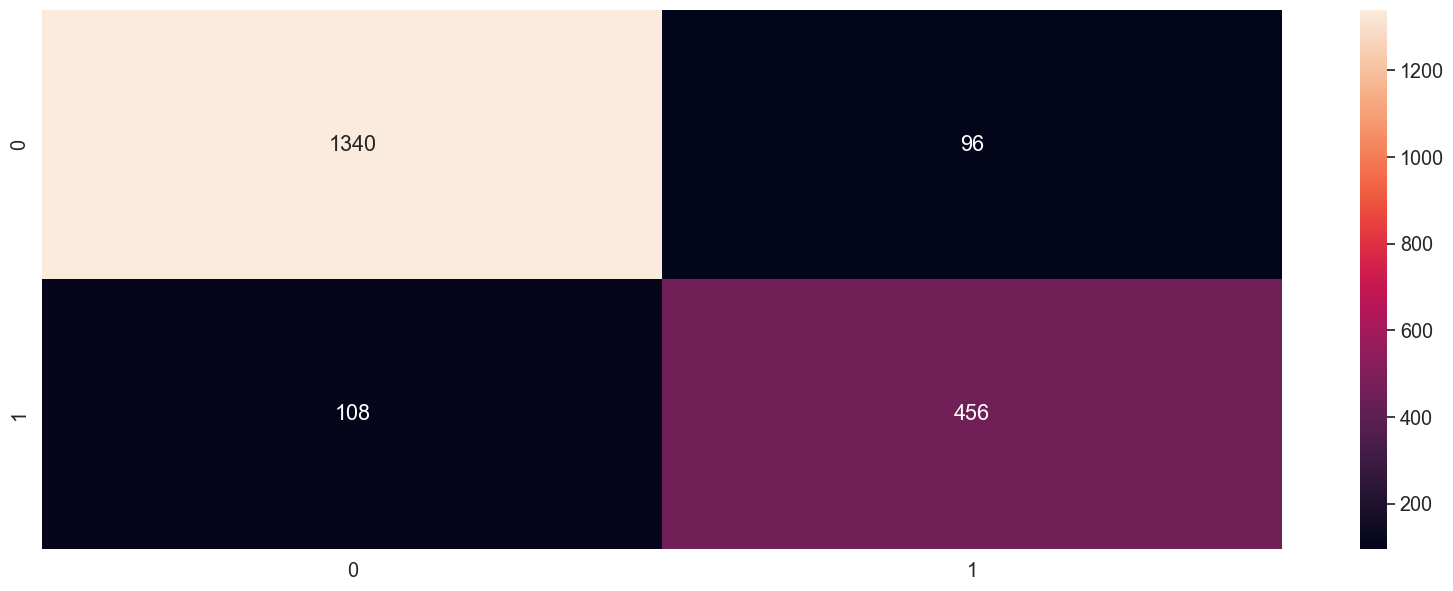

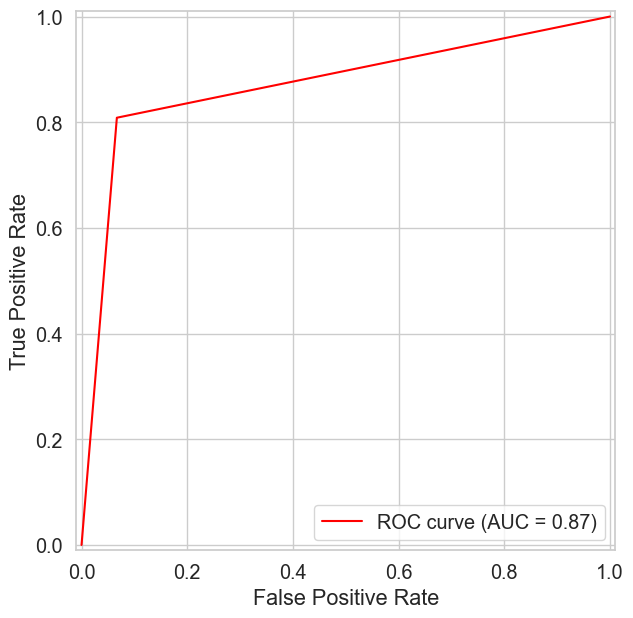

In [172]:
y_test_pred_2 = grid_2.predict(X_test_2)
print(metrics.classification_report(y_test_2, y_test_pred_2))
ac_lr=metrics.accuracy_score(y_test_2, y_test_pred_2)
print(f"Model aniqligi:, ac_lr={metrics.accuracy_score(y_test_2, y_test_pred_2)}")

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test_2, y_test_pred_2)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_2, y_test_pred_2)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Приведенные графики показывают, что наша модель лучше предсказывает неуволившихся сотрудников (класс 0). Это можно увидеть по метрикам, которые распечатаны перед графиками: все метрики класса 0 выше чем метрики класса 1. Количество TN составляет 1340 из 2000 чел. Но посмотрим на распределение ошибок: Количество FN(ошибочнооставшихся) больше чем FP(ошибочноуволившихся). Вспомним условие задачи: нам необходимо уменьшить финансовые потери бизнеса всвязи с увольнением сотрудников, т.е в нашей ситуации считаю необходимым уменьшить FN, т.е модель должна точнее предсказывать сотрудников, которые хотят увольняться. Accuracy - это метрика, которая характеризует качество модели, агрегированное по всем классам. в случае ассиметрии классов (похоже на наш случай), можно использовать метрики, которые не учитывают TN и ориентируются на TP.
Если мы рассмотрим долю правильно предсказанных положительных объектов среди всех объектов, предсказанных положительным классом, то мы получим метрику, которая называется точностью (precision). Чем меньше ложноположительных срабатываний будет допускать модель, тем больше будет её Precision. Если же мы рассмотрим долю правильно найденных положительных объектов среди всех объектов положительного класса, то мы получим метрику, которая называется полнотой (recall). модели очень удобно сравнивать, когда их качество выражено одним числом. В случае пары Precision-Recall существует популярный способ скомпоновать их в одну метрику - взять их среднее гармоническое. Данный показатель эффективности исторически носит название F1-меры. мы хотим учитывать ошибки на объектах обоих классов. При уменьшении порога отсечения мы будем находить (правильно предсказывать) всё большее число положительных объектов, но также и неправильно предсказывать положительную метку на всё большем числе отрицательных объектов. Естественным кажется ввести две метрики TPR и FPR: Обе эти величины растут при уменьшении порога. Кривая в осях TPR/FPR, которая получается при варьировании порога, исторически называется ROC-кривой (receiver operating characteristics curve, сокращённо ROC curve).Сейчас наша модель имеет метрику 0,86. Улучшить метрику можно изменяя пороговые значения: т.е изменяя порог принятия решения. Разные пороговые значения принятия решения создают разные TPR и FPR. Они представляют те самые точки, что образуют кривую ROC.Хорошая метрика модели машинного обучения должна отображать истинную и постоянную способность модели к прогнозированию. Это означает, что, если мы изменим тестовый набор данных, он не должен давать другой результат.ROC-кривая учитывает не только результаты классификации, но и вероятность предсказания всех классов. рассчитаем Площадь ROC-кривой для нашей логистической модели (используется метод predict_proba) и получим метрику AUC-ROC

In [173]:
probabilities = grid_2.predict_proba(X_test_2)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test_2, probabilities_one))

Площадь ROC-кривой: 0.9254053566842491


Таким образом площадь ROC-кривой (AUC-ROC) для нашей модели равна 0.93, что свидетельствует о хорошем качестве модели. Проверим качество нашей модели с помощью DummyClassifier

In [174]:
def judge_model(model, name, plot=False):
    print(name)
    print('-'*20)
    
    print('Training Performance')
    print('-> Acc:', accuracy_score(y_train_2, model.predict(X_train_2)) )
    print('-> AUC:', roc_auc_score(y_train_2, model.predict_proba(X_train_2)[:, 1] ))
    
    print('Testing Performance')
    print('-> Acc:', accuracy_score(y_train_2, model.predict(X_train_2)) )
    print('-> AUC:', roc_auc_score(y_test_2, model.predict_proba(X_test_2)[:, 1] ))
    print()
    
    if plot:
        fpr, tpr, thres = roc_curve(y_test_2, model.predict_proba(X_test_2)[:, 1])
        graph.figure(figsize=(4, 4))
        graph.plot(fpr, tpr, label='Test')
        graph.xlabel('FPR')
        graph.ylabel('TPR')
        graph.show()

Dummy stratified
--------------------
Training Performance
-> Acc: 0.6447776628748707
-> AUC: 0.5133747928879775
Testing Performance
-> Acc: 0.655635987590486
-> AUC: 0.51152235326656



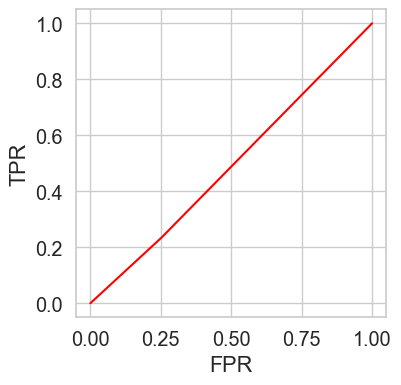

Dummy most_frequent
--------------------
Training Performance
-> Acc: 0.7647362978283351
-> AUC: 0.5
Testing Performance
-> Acc: 0.7647362978283351
-> AUC: 0.5



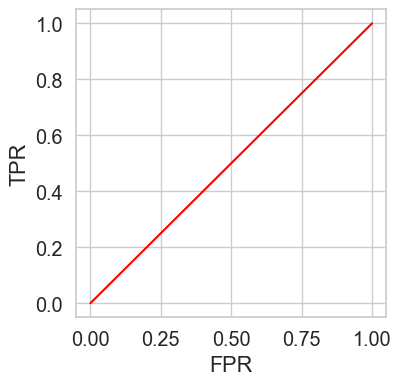

Dummy prior
--------------------
Training Performance
-> Acc: 0.7647362978283351
-> AUC: 0.5
Testing Performance
-> Acc: 0.7647362978283351
-> AUC: 0.5



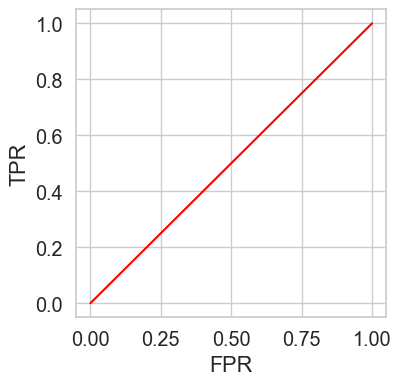

Dummy uniform
--------------------
Training Performance
-> Acc: 0.4937952430196484
-> AUC: 0.5
Testing Performance
-> Acc: 0.49120992761116855
-> AUC: 0.5



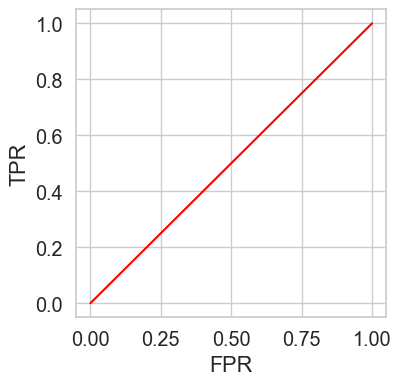

In [175]:
for strategy in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy = DummyClassifier(strategy=strategy)
    dummy.fit(X_train_2, y_train_2)
    judge_model(dummy, 'Dummy {}'.format(strategy), plot=True)

Лучшая модель и ее метрики: 
--------------------
Training Performance
-> Acc: 0.8872802481902792
-> AUC: 0.9102044000624121
Testing Performance
-> Acc: 0.8872802481902792
-> AUC: 0.9254053566842491



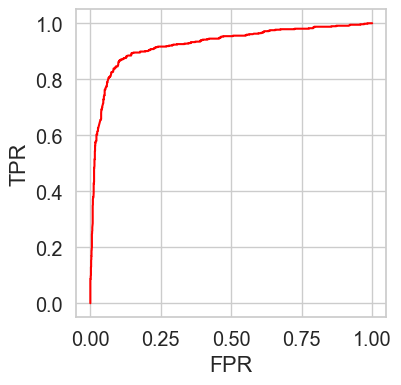

In [176]:
judge_model(grid_2.best_estimator_, 'Лучшая модель и ее метрики: ', plot=True)

Проведена проверка работоспособности модели с помощью  DummyClassifier. Использованы разные стратегии, Метрика AUC-ROC составила в среднем 0,5, что ниже метрики нашей модели на тестовой выборке, а значит мы действительно получили хорошую модель.

Посмотрим как распределены признаки в нашей модели:

In [177]:
shap.initjs() 
X_test_transformed_2 = grid_2.best_estimator_.named_steps['preprocessor'].transform(X_test_2)
model_2 = grid_2.best_estimator_.named_steps['models'].predict
X_train_transformed_2 = grid_2.best_estimator_.named_steps['preprocessor'].transform(X_train_2)
explainer_2 = shap.Explainer(model_2, X_train_transformed_2)

PermutationExplainer explainer: 2001it [21:48,  1.52it/s]                                                              


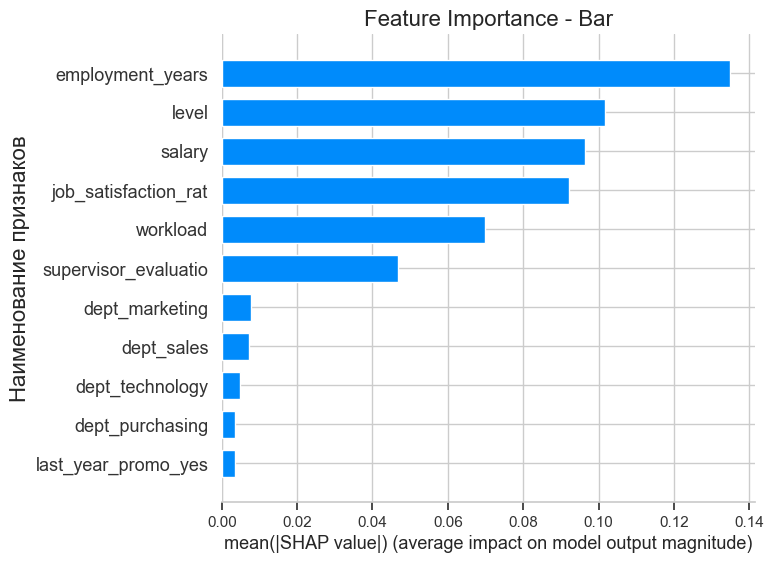

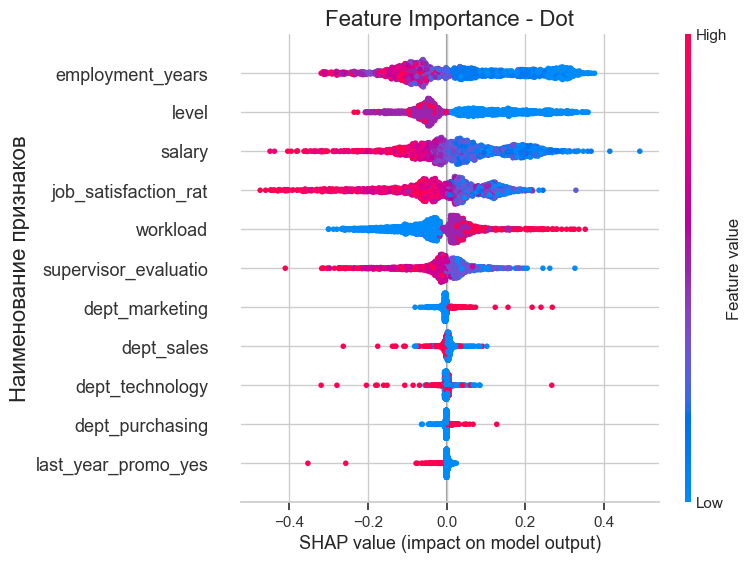

<Figure size 2000x700 with 0 Axes>

In [178]:
shap_values_2 = explainer_2.shap_values(X_test_transformed_2)
feature_names_2 =list(map(lambda x: x.split('__')[1][:20],grid_2.best_estimator_.named_steps['preprocessor'].get_feature_names_out()))
plt.ylabel("Наименование признаков", fontsize=16)
plt.title("Feature Importance - Bar", fontsize=16)
shap.summary_plot(shap_values_2, X_test_transformed_2, feature_names=feature_names_2, plot_type="bar")
plt.ylabel("Наименование признаков", fontsize=16)
plt.title("Feature Importance - Dot", fontsize=16)
shap.summary_plot(shap_values_2, X_test_transformed_2, feature_names=feature_names_2, plot_type="dot");

# Adjust layout and display the plots side by side
plt.tight_layout()
plt.show()

График shap показывает, Что самое большое влияние на целевой признак оказывет признак стаж работы (чем меньше стаж, тем вероятнее сотрудник уволится). Также на решение об увольнении влияет уровень зарплаты (при уменьшении уровня зарплаты возрастает вероятность увольнения), уровень занимаемой должности (чем он ниже, тем вероятнее увольнение сотрудника),  и нагрузка на работе( при увеличении нагрузки сотрудник может принять решение об увольнении). Удовлетворение от работы стоит на четвертом месте по влиянию на целевой признак, чем ниже удовлетворенность, тем больше вероятность того, что сотрудник уволится. Различные поощрения и отдел  оказывают минимальное влияние на вероятность увольнения. 

### <br><a style="background-color: #28838a; color: #ffffff; padding: 10px 50px; text-decoration: none; border-radius: 50px;"> <strong>Шаг 7. Выводы</strong></a><br>

Модель классификации позволила нам с достаточно большой точностью составить портрет сотрудника, который может принять решение об увольнении: это сотрудник из технического отдела уровня junior, недавноработающий, получающий небольшую зарплату, но сильнозагруженный.

<a id="top"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Выводы:</b></div>

Перед нами была поставлена задача:  разработать решение, которое позволит избежать финансовых потерь и оттока сотрудников.

Исходные данные: три датафрейма, которые были выгружены, произведена предобработка данных, позволившая снизить вес датафреймов в среднем на 30%. устранены дубликаты, изменен тип данных столбцов. Проведен исследовательский анализ данных: построены графики. Разработан pipline, для подготовки к обучению модели. Для решения задачи №1 (предсказания удовлетворенностью работой) лучшая модель для решения задачи регрессии это DecisionTreeRegressor(random_state=42), метрика SMAPE =14,2. Именно данная модель позволила нам сделать прогноз и ввести прогнозные значения в качестве нового признака для задачи№2. После выгрузки новых данных и добавления нового признака, данные были предобработаны, и подготовлены в pipline. Лучшей моделью классификации была выбрана модель SVC(probability=True, random_state=42)

1. С помощью инструмента поиска гиперпараметров GridSearchCV получили лучшую модель SVC(probability=True, random_state=42), метрика лучшей модели на тренировочной выборке: 0.93, ROC-AUC на тестовой выборке: 0.88, что само по себе неплохо. Обучили модель на тренировочных данных, рассчитали прогноз на тестовых данных. Рассчитали метрику с учетом вероятностных показателей, площадь кривой составила 0,93.
2. Приведенные графики показывают, что наша модель лучше предсказывает неуволившихся сотрудников (класс 0). Это можно увидеть по метрикам, которые распечатаны перед графиками: все метрики класса 0 выше чем метрики класса 1. Количество TN составляет 1349 из 2000 чел. Но посмотрим на распределение ошибок: Количество FN(ошибочнооставшихся) больше чем FP(ошибочноуволившихся). Вспомним условие задачи: нам необходимо уменьшить финансовые потери бизнеса всвязи с увольнением сотрудников, т.е в нашей ситуации считаю необходимым уменьшить FN, т.е модель должна точнее предсказывать сотрудников, которые хотят увольняться. Accuracy - это метрика, которая характеризует качество модели, агрегированное по всем классам. в случае ассиметрии классов (похоже на наш случай), можно использовать метрики, которые не учитывают TN и ориентируются на TP.Если мы рассмотрим долю правильно предсказанных положительных объектов среди всех объектов, предсказанных положительным классом, то мы получим метрику, которая называется точностью (precision). Чем меньше ложноположительных срабатываний будет допускать модель, тем больше будет её Precision. Если же мы рассмотрим долю правильно найденных положительных объектов среди всех объектов положительного класса, то мы получим метрику, которая называется полнотой (recall). модели очень удобно сравнивать, когда их качество выражено одним числом. В случае пары Precision-Recall существует популярный способ скомпоновать их в одну метрику - взять их среднее гармоническое. Данный показатель эффективности исторически носит название F1-меры. мы хотим учитывать ошибки на объектах обоих классов. При уменьшении порога отсечения мы будем находить (правильно предсказывать) всё большее число положительных объектов, но также и неправильно предсказывать положительную метку на всё большем числе отрицательных объектов. Естественным кажется ввести две метрики TPR и FPR: Обе эти величины растут при уменьшении порога. Кривая в осях TPR/FPR, которая получается при варьировании порога, исторически называется ROC-кривой (receiver operating characteristics curve, сокращённо ROC curve).Сейчас наша модель имеет метрику 0,86. Улучшить метрику можно изменяя пороговые значения: т.е изменяя порог принятия решения. Разные пороговые значения принятия решения создают разные TPR и FPR. Они представляют те самые точки, что образуют кривую ROC.Хорошая метрика модели машинного обучения должна отображать истинную и постоянную способность модели к прогнозированию. Это означает, что, если мы изменим тестовый набор данных, он не должен давать другой результат.ROC-кривая учитывает не только результаты классификации, но и вероятность предсказания всех классов. рассчитаем Площадь ROC-кривой для нашей логистической модели (используется метод predict_proba) и получим метрику AUC-ROC
3. График shap показывает, Что самое большое влияние на целевой признак оказывет признак стаж работы (чем меньше стаж, тем вероятнее сотрудник уволится). Также на решение об увольнении влияет уровень зарплаты (при уменьшении уровня зарплаты возрастает вероятность увольнения), уровень занимаемой должности (чем он ниже, тем вероятнее увольнение сотрудника),  и нагрузка на работе( при увеличении нагрузки сотрудник может принять решение об увольнении). Различные поощрения оказывают минимальное влияние на вероятность увольнения. 
4. В качестве решения задачи для бизнеса считаю необходимым принять дополнительные меры для мотивации новых сотрудников, ввести дополнительные премиальные выплаты за высокие показатели в работе, для этих сотрудников. Данные меры позволят повысить уровень заработной платы и тем самым повлиять на показатели удовлетворенности от работы, что в свою очередь может уменьшить отток новых сотрудников. Также считаю нужным пересмотреть нагрузку между сотрудниками, распределив равномерно между более старыми и новыми сотрудниками.
